## Descriptive Analysis on Human vs AI Generated Articles

Global Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tiktoken
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
import textstat
from transformers import pipeline
from tqdm import tqdm
from textblob import TextBlob
import re
import seaborn as sns
from scipy.stats import wilcoxon, shapiro
from nltk import word_tokenize, pos_tag

[nltk_data] Downloading package punkt to C:\Users\Nancy
[nltk_data]     Lonoff\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Tokenization Summary Statistics Functions

In [4]:
def token_encode_gpt(df):
    encoding = tiktoken.encoding_for_model("gpt-4")
    df["token_count_ai"] = df["gpt_text"].apply(lambda x: len(encoding.encode(str(x))))

    return df.describe()


def token_encode(df):
    encoding = tiktoken.encoding_for_model("gpt-4")
    df["token_count"] = df["content"].apply(lambda x: len(encoding.encode(str(x))))

    return df.describe()

### Creating the full dataset

#### Reading in the combined AI and Human content for AI Articles

In [7]:
ai = pd.read_csv("ai_gpt_text_final.csv")

ai.head()

title  \
0  Sussex : Artificial intelligence  spotted  my ...   
1  TSMC reportedly halts advanced chip shipments ...   
2  The Wall Street Journal is testing AI article ...   
3  a16z VC Martin Casado explains why so many AI ...   
4  Top House committee subpoenas Biden admin for ...   

                                                 url  \
0     https://www.bbc.com/news/articles/cd9ndpdy0q3o   
1  https://techcrunch.com/2024/11/10/tsmc-reporte...   
2  https://www.theverge.com/2024/11/13/24295838/t...   
3  https://techcrunch.com/2024/11/10/a16z-vc-mart...   
4  https://www.foxnews.com/politics/top-house-com...   

                                             content                    topic  \
0  Artificial intelligence 'spotted' my breast ca...  artificial intelligence   
1  After a chip manufactured by Taiwan Semiconduc...  artificial intelligence   
2  The Wall Street Journal is experimenting with ...  artificial intelligence   
3  The problem with most attempts at regulating A...            AI regulation   
4  FIRST ON FOX: The House Homeland Security Comm...         machine learning   

                                            gpt_text  
0  In a groundbreaking development that underscor...  
1  In a move that could significantly impact the ...  
2  The Wall Street Journal, a leading name in glo...  
3  In a compelling discussion at a recent tech co...  
4  In a significant move reflecting ongoing tensi...

Adding a column for the overarching category

In [8]:
ai["category"] = "Artificial Intelligence"

In [9]:
# Run this if needed
# ai.drop(columns=["token_count_ai"], inplace=True)
ai.head()

title  \
0  Sussex : Artificial intelligence  spotted  my ...   
1  TSMC reportedly halts advanced chip shipments ...   
2  The Wall Street Journal is testing AI article ...   
3  a16z VC Martin Casado explains why so many AI ...   
4  Top House committee subpoenas Biden admin for ...   

                                                 url  \
0     https://www.bbc.com/news/articles/cd9ndpdy0q3o   
1  https://techcrunch.com/2024/11/10/tsmc-reporte...   
2  https://www.theverge.com/2024/11/13/24295838/t...   
3  https://techcrunch.com/2024/11/10/a16z-vc-mart...   
4  https://www.foxnews.com/politics/top-house-com...   

                                             content                    topic  \
0  Artificial intelligence 'spotted' my breast ca...  artificial intelligence   
1  After a chip manufactured by Taiwan Semiconduc...  artificial intelligence   
2  The Wall Street Journal is experimenting with ...  artificial intelligence   
3  The problem with most attempts at regulating A...            AI regulation   
4  FIRST ON FOX: The House Homeland Security Comm...         machine learning   

                                            gpt_text                 category  
0  In a groundbreaking development that underscor...  Artificial Intelligence  
1  In a move that could significantly impact the ...  Artificial Intelligence  
2  The Wall Street Journal, a leading name in glo...  Artificial Intelligence  
3  In a compelling discussion at a recent tech co...  Artificial Intelligence  
4  In a significant move reflecting ongoing tensi...  Artificial Intelligence

Applying the token enconding gpt function 

In [10]:
token_encode_gpt(ai)

token_count_ai
count      437.000000
mean       554.560641
std         60.697431
min        390.000000
25%        519.000000
50%        552.000000
75%        588.000000
max        863.000000

#### Reading in the combined AI and Human content for law articles. Then adding the Law category.

In [11]:
law = pd.read_csv("law_gpt_text_final.csv")

law["category"] = "Law"

Dropping columns

In [12]:
law.drop(columns=["token_count"], inplace=True)

law.head()

title  \
0  Mississippi justices reject latest appeal from...   
1  California sues Catholic hospital for denying ...   
2  Trump argues against disclosure of certain det...   
3  Texas man executed for 1989 fatal stabbing of ...   
4  Walz repeats Georgia abortion death falsehood ...   

                                                 url  \
0  https://apnews.com/article/mississippi-death-p...   
1  https://www.theguardian.com/us-news/2024/oct/0...   
2  https://www.cnn.com/2024/10/01/politics/trump-...   
3  https://www.npr.org/2024/10/02/nx-s1-5136517/t...   
4  https://www.foxnews.com/politics/walz-repeats-...   

                                             content                 topic  \
0  Mississippi asks court to set execution for ma...  Supreme Court ruling   
1  California’s attorney general on Monday sued a...  Supreme Court ruling   
2  Former President Donald Trump is again claimin...  Supreme Court ruling   
3  A Texas man is executed for fatally stabbing t...  Supreme Court ruling   
4  Minnesota Gov. Tim Walz claimed during the CBS...  Supreme Court ruling   

                                            gpt_text category  
0  In a landmark decision, the Mississippi Suprem...      Law  
1  In a landmark legal battle that could have sig...      Law  
2  In a significant development in the ongoing le...      Law  
3  In a case that has spanned over three decades,...      Law  
4  In a recent public address, Governor Tim Walz ...      Law

Applying the token encoding gpt function

In [ ]:
token_encode_gpt(law)

Concatinating the ai and law combined dataframes

In [16]:
df = pd.concat([ai, law])

df.head()

title  \
0  Sussex : Artificial intelligence  spotted  my ...   
1  TSMC reportedly halts advanced chip shipments ...   
2  The Wall Street Journal is testing AI article ...   
3  a16z VC Martin Casado explains why so many AI ...   
4  Top House committee subpoenas Biden admin for ...   

                                                 url  \
0     https://www.bbc.com/news/articles/cd9ndpdy0q3o   
1  https://techcrunch.com/2024/11/10/tsmc-reporte...   
2  https://www.theverge.com/2024/11/13/24295838/t...   
3  https://techcrunch.com/2024/11/10/a16z-vc-mart...   
4  https://www.foxnews.com/politics/top-house-com...   

                                             content                    topic  \
0  Artificial intelligence 'spotted' my breast ca...  artificial intelligence   
1  After a chip manufactured by Taiwan Semiconduc...  artificial intelligence   
2  The Wall Street Journal is experimenting with ...  artificial intelligence   
3  The problem with most attempts at regulating A...            AI regulation   
4  FIRST ON FOX: The House Homeland Security Comm...         machine learning   

                                            gpt_text                 category  \
0  In a groundbreaking development that underscor...  Artificial Intelligence   
1  In a move that could significantly impact the ...  Artificial Intelligence   
2  The Wall Street Journal, a leading name in glo...  Artificial Intelligence   
3  In a compelling discussion at a recent tech co...  Artificial Intelligence   
4  In a significant move reflecting ongoing tensi...  Artificial Intelligence   

   token_count_ai  
0           569.0  
1           492.0  
2           549.0  
3           563.0  
4           565.0

#### Reading in the combined AI and Human content Political articles

In [13]:
pol = pd.read_csv("pol_gpt_text_final.csv")

pol.head()

title  \
0  TikTok fined $10 million in Venezuela as court...   
1  Robinhood , already a  comeback  stock , has e...   
2  New leader promises will be tricky to keep in ...   
3  Top Venezuelan pianist urges music world to sn...   
4  Nick Clegg , former united kingdom deputy prim...   

                                                 url  \
0  https://www.cnn.com/2024/12/31/americas/tiktok...   
1  https://techcrunch.com/2025/01/01/robinhood-al...   
2     https://www.bbc.com/news/articles/cevgl3gdnrjo   
3  https://www.theguardian.com/world/2025/jan/01/...   
4  https://www.theguardian.com/technology/2025/ja...   

                                             content                  topic  \
0  Venezuela’s Supreme Court has fined TikTok $10...  presidential election   
1  Robinhood CEO Vlad Tenev has a lot to celebrat...  presidential election   
2  New leader's promises will be tricky to keep i...  presidential election   
3  One of Venezuela’s most celebrated musicians, ...  presidential election   
4  Nick Clegg, Britain’s former deputy prime mini...  presidential election   

   token_count  token_count_ai  \
0          389             516   
1         1496             585   
2         1180             482   
3         1507             510   
4          599             528   

                                            gpt_text  
0  In a landmark ruling that underscores the grow...  
1  Robinhood, the financial technology company kn...  
2  In a significant development for Sri Lanka, th...  
3  In a dramatic turn of events within the global...  
4  In a surprising turn of events, Nick Clegg, th...

Assigning the "Politics" label to the category column

In [14]:
pol["category"] = "Politics"

Dropping columns

In [15]:
pol.drop(columns=["token_count", "token_count_ai"], inplace= True)

pol.head()

title  \
0  TikTok fined $10 million in Venezuela as court...   
1  Robinhood , already a  comeback  stock , has e...   
2  New leader promises will be tricky to keep in ...   
3  Top Venezuelan pianist urges music world to sn...   
4  Nick Clegg , former united kingdom deputy prim...   

                                                 url  \
0  https://www.cnn.com/2024/12/31/americas/tiktok...   
1  https://techcrunch.com/2025/01/01/robinhood-al...   
2     https://www.bbc.com/news/articles/cevgl3gdnrjo   
3  https://www.theguardian.com/world/2025/jan/01/...   
4  https://www.theguardian.com/technology/2025/ja...   

                                             content                  topic  \
0  Venezuela’s Supreme Court has fined TikTok $10...  presidential election   
1  Robinhood CEO Vlad Tenev has a lot to celebrat...  presidential election   
2  New leader's promises will be tricky to keep i...  presidential election   
3  One of Venezuela’s most celebrated musicians, ...  presidential election   
4  Nick Clegg, Britain’s former deputy prime mini...  presidential election   

                                            gpt_text  category  
0  In a landmark ruling that underscores the grow...  Politics  
1  Robinhood, the financial technology company kn...  Politics  
2  In a significant development for Sri Lanka, th...  Politics  
3  In a dramatic turn of events within the global...  Politics  
4  In a surprising turn of events, Nick Clegg, th...  Politics

Concatenating the larger dataframe and politics dataframe

In [17]:
df = pd.concat([df, pol])

df.head()

title  \
0  Sussex : Artificial intelligence  spotted  my ...   
1  TSMC reportedly halts advanced chip shipments ...   
2  The Wall Street Journal is testing AI article ...   
3  a16z VC Martin Casado explains why so many AI ...   
4  Top House committee subpoenas Biden admin for ...   

                                                 url  \
0     https://www.bbc.com/news/articles/cd9ndpdy0q3o   
1  https://techcrunch.com/2024/11/10/tsmc-reporte...   
2  https://www.theverge.com/2024/11/13/24295838/t...   
3  https://techcrunch.com/2024/11/10/a16z-vc-mart...   
4  https://www.foxnews.com/politics/top-house-com...   

                                             content                    topic  \
0  Artificial intelligence 'spotted' my breast ca...  artificial intelligence   
1  After a chip manufactured by Taiwan Semiconduc...  artificial intelligence   
2  The Wall Street Journal is experimenting with ...  artificial intelligence   
3  The problem with most attempts at regulating A...            AI regulation   
4  FIRST ON FOX: The House Homeland Security Comm...         machine learning   

                                            gpt_text                 category  \
0  In a groundbreaking development that underscor...  Artificial Intelligence   
1  In a move that could significantly impact the ...  Artificial Intelligence   
2  The Wall Street Journal, a leading name in glo...  Artificial Intelligence   
3  In a compelling discussion at a recent tech co...  Artificial Intelligence   
4  In a significant move reflecting ongoing tensi...  Artificial Intelligence   

   token_count_ai  
0           569.0  
1           492.0  
2           549.0  
3           563.0  
4           565.0

Applying the token encoding gpt function

In [ ]:
token_encode_gpt(pol)

#### Reading in the combined AI and Human content Economic articles

In [18]:
econ = pd.read_csv("econ_gpt_text_final.csv")

econ.head()

title  \
0  A year after October 7 , Houthi Red Sea attack...   
1  Blockbuster jobs report paves way for US econo...   
2  Jobs report is likely to show another month of...   
3  Texas residents express frustration with the e...   
4  IMF backs RBA not cutting interest rates and s...   

                                                 url  \
0  https://www.aljazeera.com/economy/2024/10/5/a-...   
1  https://abcnews.go.com/Business/blockbuster-jo...   
2  https://apnews.com/article/jobs-hiring-federal...   
3  https://www.foxnews.com/media/texas-residents-...   
4  https://www.theguardian.com/business/2024/oct/...   

                                             content            topic  \
0  Houthi Red Sea attacks still torment global tr...  economic policy   
1  Blockbuster jobs report paves way for US econo...          economy   
2  US adds a robust 254,000 jobs and unemployment...          economy   
3  Fox News Digital spoke with residents just sou...          economy   
4  Extra government spending could inject “additi...        inflation   

   token_count                                           gpt_text  
0         1287  A year has passed since the events of October ...  
1          759  In a surprising turn of events, the latest job...  
2         1546  In a continuation of the economic recovery obs...  
3          762  In recent months, a wave of economic dissatisf...  
4          743  In a significant development for the Australia...

Assigning the "Economics" label to the category column

In [19]:
econ["category"] = "Economics"

Dropping columms

In [20]:
econ.drop(columns=["token_count"], inplace=True)

econ.head()

title  \
0  A year after October 7 , Houthi Red Sea attack...   
1  Blockbuster jobs report paves way for US econo...   
2  Jobs report is likely to show another month of...   
3  Texas residents express frustration with the e...   
4  IMF backs RBA not cutting interest rates and s...   

                                                 url  \
0  https://www.aljazeera.com/economy/2024/10/5/a-...   
1  https://abcnews.go.com/Business/blockbuster-jo...   
2  https://apnews.com/article/jobs-hiring-federal...   
3  https://www.foxnews.com/media/texas-residents-...   
4  https://www.theguardian.com/business/2024/oct/...   

                                             content            topic  \
0  Houthi Red Sea attacks still torment global tr...  economic policy   
1  Blockbuster jobs report paves way for US econo...          economy   
2  US adds a robust 254,000 jobs and unemployment...          economy   
3  Fox News Digital spoke with residents just sou...          economy   
4  Extra government spending could inject “additi...        inflation   

                                            gpt_text   category  
0  A year has passed since the events of October ...  Economics  
1  In a surprising turn of events, the latest job...  Economics  
2  In a continuation of the economic recovery obs...  Economics  
3  In recent months, a wave of economic dissatisf...  Economics  
4  In a significant development for the Australia...  Economics

Applying the token encoding gpt function

In [ ]:
token_encode_gpt(econ)

Concatenating the larger dataframe and Economics dataframe

In [21]:
df = pd.concat([df, econ])

df.head()

title  \
0  Sussex : Artificial intelligence  spotted  my ...   
1  TSMC reportedly halts advanced chip shipments ...   
2  The Wall Street Journal is testing AI article ...   
3  a16z VC Martin Casado explains why so many AI ...   
4  Top House committee subpoenas Biden admin for ...   

                                                 url  \
0     https://www.bbc.com/news/articles/cd9ndpdy0q3o   
1  https://techcrunch.com/2024/11/10/tsmc-reporte...   
2  https://www.theverge.com/2024/11/13/24295838/t...   
3  https://techcrunch.com/2024/11/10/a16z-vc-mart...   
4  https://www.foxnews.com/politics/top-house-com...   

                                             content                    topic  \
0  Artificial intelligence 'spotted' my breast ca...  artificial intelligence   
1  After a chip manufactured by Taiwan Semiconduc...  artificial intelligence   
2  The Wall Street Journal is experimenting with ...  artificial intelligence   
3  The problem with most attempts at regulating A...            AI regulation   
4  FIRST ON FOX: The House Homeland Security Comm...         machine learning   

                                            gpt_text                 category  \
0  In a groundbreaking development that underscor...  Artificial Intelligence   
1  In a move that could significantly impact the ...  Artificial Intelligence   
2  The Wall Street Journal, a leading name in glo...  Artificial Intelligence   
3  In a compelling discussion at a recent tech co...  Artificial Intelligence   
4  In a significant move reflecting ongoing tensi...  Artificial Intelligence   

   token_count_ai  
0           569.0  
1           492.0  
2           549.0  
3           563.0  
4           565.0

#### Reading in the combined AI and Human content Health articles

In [22]:
health = pd.read_csv("health_gpt_text_final.csv")

health.head()

title  \
0  Volleyball player finds home on high school te...   
1  Accrington :  Cancer research saved my life , ...   
2  If you dont have a will , now is the time to g...   
3    The teapot rattled – there were dentures ins...   
4  Braintree woman to walk the runway for breast ...   

                                                 url  \
0  https://www.cbsnews.com/boston/news/volleyball...   
1     https://www.bbc.com/news/articles/c7v64een901o   
2  https://www.theguardian.com/money/2024/oct/21/...   
3  https://www.theguardian.com/travel/2024/oct/21...   
4  https://www.cbsnews.com/boston/news/braintree-...   

                                             content            topic  \
0  Volleyball player finds home on high school te...  Cancer research   
1  'Cancer research saved my life,' says mum-of-t...  Cancer research   
2  People have been urged to overcome their fear ...  Cancer research   
3  ‘The worst was a donation of ashes in a teapot...  Cancer research   
4  Braintree woman to walk the runway for breast ...  Cancer research   

   token_count                                           gpt_text  
0          652  After a whirlwind journey across borders and c...  
1          663  In a heartwarming tale of resilience and hope,...  
2         1209  In an unprecedented move aimed at promoting fi...  
3         1368  In a world where charity shops hold the allure...  
4         1314  In an inspiring turn of events, a woman from B...

Assigning the "Health" label to the category column

In [23]:
health["category"] = "Health"

Dropping columns

In [24]:
health.drop(columns=["token_count"], inplace=True)

health.head()

title  \
0  Volleyball player finds home on high school te...   
1  Accrington :  Cancer research saved my life , ...   
2  If you dont have a will , now is the time to g...   
3    The teapot rattled – there were dentures ins...   
4  Braintree woman to walk the runway for breast ...   

                                                 url  \
0  https://www.cbsnews.com/boston/news/volleyball...   
1     https://www.bbc.com/news/articles/c7v64een901o   
2  https://www.theguardian.com/money/2024/oct/21/...   
3  https://www.theguardian.com/travel/2024/oct/21...   
4  https://www.cbsnews.com/boston/news/braintree-...   

                                             content            topic  \
0  Volleyball player finds home on high school te...  Cancer research   
1  'Cancer research saved my life,' says mum-of-t...  Cancer research   
2  People have been urged to overcome their fear ...  Cancer research   
3  ‘The worst was a donation of ashes in a teapot...  Cancer research   
4  Braintree woman to walk the runway for breast ...  Cancer research   

                                            gpt_text category  
0  After a whirlwind journey across borders and c...   Health  
1  In a heartwarming tale of resilience and hope,...   Health  
2  In an unprecedented move aimed at promoting fi...   Health  
3  In a world where charity shops hold the allure...   Health  
4  In an inspiring turn of events, a woman from B...   Health

Concatenating the larger dataframe and Health dataframe

In [25]:
df = pd.concat([df, health])
df.head()

title  \
0  Sussex : Artificial intelligence  spotted  my ...   
1  TSMC reportedly halts advanced chip shipments ...   
2  The Wall Street Journal is testing AI article ...   
3  a16z VC Martin Casado explains why so many AI ...   
4  Top House committee subpoenas Biden admin for ...   

                                                 url  \
0     https://www.bbc.com/news/articles/cd9ndpdy0q3o   
1  https://techcrunch.com/2024/11/10/tsmc-reporte...   
2  https://www.theverge.com/2024/11/13/24295838/t...   
3  https://techcrunch.com/2024/11/10/a16z-vc-mart...   
4  https://www.foxnews.com/politics/top-house-com...   

                                             content                    topic  \
0  Artificial intelligence 'spotted' my breast ca...  artificial intelligence   
1  After a chip manufactured by Taiwan Semiconduc...  artificial intelligence   
2  The Wall Street Journal is experimenting with ...  artificial intelligence   
3  The problem with most attempts at regulating A...            AI regulation   
4  FIRST ON FOX: The House Homeland Security Comm...         machine learning   

                                            gpt_text                 category  \
0  In a groundbreaking development that underscor...  Artificial Intelligence   
1  In a move that could significantly impact the ...  Artificial Intelligence   
2  The Wall Street Journal, a leading name in glo...  Artificial Intelligence   
3  In a compelling discussion at a recent tech co...  Artificial Intelligence   
4  In a significant move reflecting ongoing tensi...  Artificial Intelligence   

   token_count_ai  
0           569.0  
1           492.0  
2           549.0  
3           563.0  
4           565.0

Applying the token encoding gpt function

In [ ]:
token_encode_gpt(health)

#### Reading in the combined AI and Human content Climate articles

In [26]:
climate = pd.read_csv("climate_gpt_text_final.csv")

climate.head()

title  \
0    Treat us like human : Fishing wars trap Indi...   
1  Generation Beta starts in 2025 : 5 things to know   
2  US Chamber , oil industry sue Vermont over law...   
3    A look into the future : TV drama about Dani...   
4    A place for kids to play and a place to stor...   

                                                 url  \
0  https://www.aljazeera.com/features/2025/1/1/tr...   
1  https://abcnews.go.com/GMA/Living/generation-b...   
2  https://apnews.com/article/vermont-climate-cha...   
3  https://www.theguardian.com/world/2025/jan/03/...   
4  https://www.theguardian.com/environment/2025/j...   

                                             content           topic  \
0  ‘Treat us like humans’: Fishing wars trap Indi...  climate change   
1  Generation Beta starts in 2025: 5 things to kn...  climate change   
2  US Chamber, oil industry sue Vermont over law ...  climate change   
3  Featuring scenes of huge crowds boarding ferri...  climate change   
4  For a city that is almost small enough to fit ...  climate change   

   token_count                                           gpt_text  
0         2011  In a dramatic escalation of maritime tensions,...  
1          660  As the world moves into the second quarter of ...  
2          791  In a groundbreaking legal confrontation, the U...  
3         1077  A new Danish television drama, "A World Apart,...  
4         2321  In an innovative approach to urban planning an...

Assigning the "Health" label to the category column

In [27]:
climate["category"] = "Climate"

Dropping Columns

In [28]:
climate.drop(columns=["token_count"], inplace=True)

climate.head()

title  \
0    Treat us like human : Fishing wars trap Indi...   
1  Generation Beta starts in 2025 : 5 things to know   
2  US Chamber , oil industry sue Vermont over law...   
3    A look into the future : TV drama about Dani...   
4    A place for kids to play and a place to stor...   

                                                 url  \
0  https://www.aljazeera.com/features/2025/1/1/tr...   
1  https://abcnews.go.com/GMA/Living/generation-b...   
2  https://apnews.com/article/vermont-climate-cha...   
3  https://www.theguardian.com/world/2025/jan/03/...   
4  https://www.theguardian.com/environment/2025/j...   

                                             content           topic  \
0  ‘Treat us like humans’: Fishing wars trap Indi...  climate change   
1  Generation Beta starts in 2025: 5 things to kn...  climate change   
2  US Chamber, oil industry sue Vermont over law ...  climate change   
3  Featuring scenes of huge crowds boarding ferri...  climate change   
4  For a city that is almost small enough to fit ...  climate change   

                                            gpt_text category  
0  In a dramatic escalation of maritime tensions,...  Climate  
1  As the world moves into the second quarter of ...  Climate  
2  In a groundbreaking legal confrontation, the U...  Climate  
3  A new Danish television drama, "A World Apart,...  Climate  
4  In an innovative approach to urban planning an...  Climate

Concatenating the larger dataframe and Health dataframe

In [29]:
df = pd.concat([df, climate])

df.head()

title  \
0  Sussex : Artificial intelligence  spotted  my ...   
1  TSMC reportedly halts advanced chip shipments ...   
2  The Wall Street Journal is testing AI article ...   
3  a16z VC Martin Casado explains why so many AI ...   
4  Top House committee subpoenas Biden admin for ...   

                                                 url  \
0     https://www.bbc.com/news/articles/cd9ndpdy0q3o   
1  https://techcrunch.com/2024/11/10/tsmc-reporte...   
2  https://www.theverge.com/2024/11/13/24295838/t...   
3  https://techcrunch.com/2024/11/10/a16z-vc-mart...   
4  https://www.foxnews.com/politics/top-house-com...   

                                             content                    topic  \
0  Artificial intelligence 'spotted' my breast ca...  artificial intelligence   
1  After a chip manufactured by Taiwan Semiconduc...  artificial intelligence   
2  The Wall Street Journal is experimenting with ...  artificial intelligence   
3  The problem with most attempts at regulating A...            AI regulation   
4  FIRST ON FOX: The House Homeland Security Comm...         machine learning   

                                            gpt_text                 category  \
0  In a groundbreaking development that underscor...  Artificial Intelligence   
1  In a move that could significantly impact the ...  Artificial Intelligence   
2  The Wall Street Journal, a leading name in glo...  Artificial Intelligence   
3  In a compelling discussion at a recent tech co...  Artificial Intelligence   
4  In a significant move reflecting ongoing tensi...  Artificial Intelligence   

   token_count_ai  
0           569.0  
1           492.0  
2           549.0  
3           563.0  
4           565.0

Applying the token encoding gpt function

In [ ]:
token_encode_gpt(climate)

#### Reading in the combined AI and Human content Conflicts articles

In [30]:
conflicts = pd.read_csv("conflicts_gpt_text_final.csv")

conflicts.head()

title  \
0  Russia - Ukraine war : List of key events , da...   
1  Future fizzles : the promises and predictions ...   
2  Russia - Ukraine war : List of key events , da...   
3  Ukraine launches counterattack in Russian bord...   
4  Macron declares Trump has  solid ally  in Fran...   

                                                 url  \
0  https://www.aljazeera.com/news/2025/1/1/russia...   
1  https://www.theguardian.com/australia-news/202...   
2  https://www.aljazeera.com/news/2025/1/4/russia...   
3  https://www.cbsnews.com/news/ukraine-counterat...   
4  https://apnews.com/article/macron-diplomacy-sp...   

                                             content        topic  \
0  Russia-Ukraine war: List of key events, day 1,...  Ukraine war   
1  An Australian republic, renewable-powered supe...  Ukraine war   
2  Russia-Ukraine war: List of key events, day 1,...  Ukraine war   
3  Ukraine launches counterattack in Russian bord...  Ukraine war   
4  Macron affirms Trump has ‘solid ally’ in Franc...  Ukraine war   

   token_count                                           gpt_text  
0          340  The conflict between Russia and Ukraine has re...  
1         1185  As the world hurtles toward an increasingly un...  
2          728  The ongoing conflict between Russia and Ukrain...  
3          784  In a significant development in the ongoing co...  
4          936  In a surprising move that has sent ripples thr...

Assigning the "Conflicts" label to the category column

In [31]:
conflicts["category"] = "Conflicts"

Dropping columns and nulls

In [32]:
conflicts.drop(columns=["token_count"], inplace=True)

In [33]:
conflicts = conflicts.dropna()

conflicts.head()

title  \
0  Russia - Ukraine war : List of key events , da...   
1  Future fizzles : the promises and predictions ...   
2  Russia - Ukraine war : List of key events , da...   
3  Ukraine launches counterattack in Russian bord...   
4  Macron declares Trump has  solid ally  in Fran...   

                                                 url  \
0  https://www.aljazeera.com/news/2025/1/1/russia...   
1  https://www.theguardian.com/australia-news/202...   
2  https://www.aljazeera.com/news/2025/1/4/russia...   
3  https://www.cbsnews.com/news/ukraine-counterat...   
4  https://apnews.com/article/macron-diplomacy-sp...   

                                             content        topic  \
0  Russia-Ukraine war: List of key events, day 1,...  Ukraine war   
1  An Australian republic, renewable-powered supe...  Ukraine war   
2  Russia-Ukraine war: List of key events, day 1,...  Ukraine war   
3  Ukraine launches counterattack in Russian bord...  Ukraine war   
4  Macron affirms Trump has ‘solid ally’ in Franc...  Ukraine war   

                                            gpt_text   category  
0  The conflict between Russia and Ukraine has re...  Conflicts  
1  As the world hurtles toward an increasingly un...  Conflicts  
2  The ongoing conflict between Russia and Ukrain...  Conflicts  
3  In a significant development in the ongoing co...  Conflicts  
4  In a surprising move that has sent ripples thr...  Conflicts

Concatenating the larger dataframe and Conflicts dataframe

In [34]:
df = pd.concat([df, conflicts])
df.head()

title  \
0  Sussex : Artificial intelligence  spotted  my ...   
1  TSMC reportedly halts advanced chip shipments ...   
2  The Wall Street Journal is testing AI article ...   
3  a16z VC Martin Casado explains why so many AI ...   
4  Top House committee subpoenas Biden admin for ...   

                                                 url  \
0     https://www.bbc.com/news/articles/cd9ndpdy0q3o   
1  https://techcrunch.com/2024/11/10/tsmc-reporte...   
2  https://www.theverge.com/2024/11/13/24295838/t...   
3  https://techcrunch.com/2024/11/10/a16z-vc-mart...   
4  https://www.foxnews.com/politics/top-house-com...   

                                             content                    topic  \
0  Artificial intelligence 'spotted' my breast ca...  artificial intelligence   
1  After a chip manufactured by Taiwan Semiconduc...  artificial intelligence   
2  The Wall Street Journal is experimenting with ...  artificial intelligence   
3  The problem with most attempts at regulating A...            AI regulation   
4  FIRST ON FOX: The House Homeland Security Comm...         machine learning   

                                            gpt_text                 category  \
0  In a groundbreaking development that underscor...  Artificial Intelligence   
1  In a move that could significantly impact the ...  Artificial Intelligence   
2  The Wall Street Journal, a leading name in glo...  Artificial Intelligence   
3  In a compelling discussion at a recent tech co...  Artificial Intelligence   
4  In a significant move reflecting ongoing tensi...  Artificial Intelligence   

   token_count_ai  
0           569.0  
1           492.0  
2           549.0  
3           563.0  
4           565.0

Resaving the resulting complete df to a csv file for further analysis

In [ ]:
df.to_csv("full_gpt_text.csv", index = False)

### Analyzing the dataset 

In [2]:
# df = pd.read_csv("full_gpt_text.csv")
# df.head()

title  \
0  Sussex : Artificial intelligence  spotted  my ...   
1  TSMC reportedly halts advanced chip shipments ...   
2  The Wall Street Journal is testing AI article ...   
3  a16z VC Martin Casado explains why so many AI ...   
4  Top House committee subpoenas Biden admin for ...   

                                                 url  \
0     https://www.bbc.com/news/articles/cd9ndpdy0q3o   
1  https://techcrunch.com/2024/11/10/tsmc-reporte...   
2  https://www.theverge.com/2024/11/13/24295838/t...   
3  https://techcrunch.com/2024/11/10/a16z-vc-mart...   
4  https://www.foxnews.com/politics/top-house-com...   

                                             content                    topic  \
0  Artificial intelligence 'spotted' my breast ca...  artificial intelligence   
1  After a chip manufactured by Taiwan Semiconduc...  artificial intelligence   
2  The Wall Street Journal is experimenting with ...  artificial intelligence   
3  The problem with most attempts at regulating A...            AI regulation   
4  FIRST ON FOX: The House Homeland Security Comm...         machine learning   

                                            gpt_text                 category  \
0  In a groundbreaking development that underscor...  Artificial Intelligence   
1  In a move that could significantly impact the ...  Artificial Intelligence   
2  The Wall Street Journal, a leading name in glo...  Artificial Intelligence   
3  In a compelling discussion at a recent tech co...  Artificial Intelligence   
4  In a significant move reflecting ongoing tensi...  Artificial Intelligence   

   token_count_ai  token_count  
0             NaN          NaN  
1             NaN          NaN  
2             NaN          NaN  
3             NaN          NaN  
4             NaN          NaN

In [ ]:
# This is the full dataset in case you want to view it before going through the analysis
df = pd.read_csv("phase_3_df.csv")

Dropping columns

In [3]:
df.drop(columns=["token_count_ai", "token_count"], inplace=True)

In [117]:
df.head()

title  \
0  Sussex : Artificial intelligence  spotted  my ...   
1  TSMC reportedly halts advanced chip shipments ...   
2  The Wall Street Journal is testing AI article ...   
3  a16z VC Martin Casado explains why so many AI ...   
4  Top House committee subpoenas Biden admin for ...   

                                                 url  \
0     https://www.bbc.com/news/articles/cd9ndpdy0q3o   
1  https://techcrunch.com/2024/11/10/tsmc-reporte...   
2  https://www.theverge.com/2024/11/13/24295838/t...   
3  https://techcrunch.com/2024/11/10/a16z-vc-mart...   
4  https://www.foxnews.com/politics/top-house-com...   

                                             content                    topic  \
0  Artificial intelligence 'spotted' my breast ca...  artificial intelligence   
1  After a chip manufactured by Taiwan Semiconduc...  artificial intelligence   
2  The Wall Street Journal is experimenting with ...  artificial intelligence   
3  The problem with most attempts at regulating A...            AI regulation   
4  FIRST ON FOX: The House Homeland Security Comm...         machine learning   

                                            gpt_text                 category  \
0  In a groundbreaking development that underscor...  Artificial Intelligence   
1  In a move that could significantly impact the ...  Artificial Intelligence   
2  The Wall Street Journal, a leading name in glo...  Artificial Intelligence   
3  In a compelling discussion at a recent tech co...  Artificial Intelligence   
4  In a significant move reflecting ongoing tensi...  Artificial Intelligence   

   token_count_ai  token_count  sent_count  sent_count_ai  ...  adv_pct_gpt  \
0             569          477          18             24  ...     0.028419   
1             492          163           5             18  ...     0.028261   
2             549          309          12             19  ...     0.020913   
3             563          912          35             23  ...     0.038745   
4             565         1064          27             20  ...     0.021544   

   title_length  sentiment_human  subjectivity_human  sentiment_gpt  \
0             8         0.091488            0.469964       0.086796   
1             9         0.040625            0.490625       0.059704   
2             9         0.049026            0.650325       0.077776   
3            13         0.078333            0.407553       0.106364   
4            16         0.121371            0.407907       0.016414   

   subjectivity_gpt  bias_terms_human  bias_terms_gpt  token_deficit  \
0          0.472062          0.000000        0.000000            431   
1          0.458034          6.134969        2.032520            508   
2          0.506301          0.000000        0.000000            451   
3          0.505510          0.000000        0.000000            437   
4          0.495202          3.759398        1.769912            435   

   token_diff  
0         -92  
1        -329  
2        -240  
3         349  
4         499  

[5 rows x 49 columns]

Removing extra spaces

In [ ]:
df["title"] = df["title"].astype(str).str.strip()

Calculating the token and sentence based analysis

In [ ]:
# Token counts
encoding = tiktoken.encoding_for_model("gpt-4")
df["token_count"] = df["content"].apply(lambda x: len(encoding.encode(str(x))))
df["token_count_ai"] = df["gpt_text"].apply(lambda x: len(encoding.encode(str(x))) if pd.notna(x) else None)

# Sentence counts
df["sent_count"] = df["content"].apply(lambda x: len(sent_tokenize(str(x))))
df["sent_count_ai"] = df["gpt_text"].apply(lambda x: len(sent_tokenize(str(x))) if pd.notna(x) else None)

# Tokens per sentence
df["tokens_per_sentence"] = df["token_count"] / df["sent_count"]
df["tokens_per_sentence_ai"] = df["token_count_ai"] / df["sent_count_ai"]

In [ ]:
df.head()

Removing nulls and duplicates and then examining the category counts 

In [5]:
df = df.dropna(subset=["title", "content"])
df = df.drop_duplicates(subset=["title", "content", "topic"])
df.category.value_counts()

category
Conflicts                  573
Politics                   502
Economics                  478
Law                        452
Artificial Intelligence    437
Climate                    429
Health                     424
Name: count, dtype: int64

Comparing the gpt tokenization function results (AI generated only)

I concatenate all the separate results into one df at the end

In [ ]:
df.info()

In [41]:
tokens = token_encode_gpt(ai)
tokens["tokens_ai"] = tokens["token_count_ai"]
tokens

token_count_ai   tokens_ai
count      437.000000  437.000000
mean       554.560641  554.560641
std         60.697431   60.697431
min        390.000000  390.000000
25%        519.000000  519.000000
50%        552.000000  552.000000
75%        588.000000  588.000000
max        863.000000  863.000000

In [42]:
tokens_pol = token_encode_gpt(pol)
tokens_pol["tokens_pol"] = tokens_pol["token_count_ai"]
tokens_pol

token_count_ai  tokens_pol
count      502.000000  502.000000
mean       543.932271  543.932271
std         55.822067   55.822067
min        373.000000  373.000000
25%        509.000000  509.000000
50%        544.000000  544.000000
75%        578.750000  578.750000
max        787.000000  787.000000

In [43]:
tokens = pd.concat([tokens, tokens_pol], axis =1)
tokens.drop(columns=["token_count_ai"], inplace=True)
display(tokens)

tokens_ai  tokens_pol
count  437.000000  502.000000
mean   554.560641  543.932271
std     60.697431   55.822067
min    390.000000  373.000000
25%    519.000000  509.000000
50%    552.000000  544.000000
75%    588.000000  578.750000
max    863.000000  787.000000

In [44]:
tokens_conflicts = token_encode_gpt(conflicts)
tokens_conflicts["token_con"] = tokens_conflicts["token_count_ai"]
tokens_conflicts.drop(columns=["token_count_ai"], inplace=True)
tokens_conflicts

token_con
count  573.000000
mean   542.937173
std     55.816347
min    377.000000
25%    509.000000
50%    541.000000
75%    577.000000
max    775.000000

In [45]:
tokens = pd.concat([tokens, tokens_conflicts], axis = 1)
tokens

tokens_ai  tokens_pol   token_con
count  437.000000  502.000000  573.000000
mean   554.560641  543.932271  542.937173
std     60.697431   55.822067   55.816347
min    390.000000  373.000000  377.000000
25%    519.000000  509.000000  509.000000
50%    552.000000  544.000000  541.000000
75%    588.000000  578.750000  577.000000
max    863.000000  787.000000  775.000000

In [46]:
tokens_econ = token_encode_gpt(econ)
tokens_econ["token_econ"] = tokens_econ["token_count_ai"]
tokens_econ.drop(columns=["token_count_ai"], inplace=True)
tokens_econ

token_econ
count  478.000000
mean   535.723849
std     55.139646
min    363.000000
25%    498.250000
50%    533.000000
75%    570.750000
max    705.000000

In [47]:
tokens = pd.concat([tokens, tokens_econ], axis = 1)
tokens

tokens_ai  tokens_pol   token_con  token_econ
count  437.000000  502.000000  573.000000  478.000000
mean   554.560641  543.932271  542.937173  535.723849
std     60.697431   55.822067   55.816347   55.139646
min    390.000000  373.000000  377.000000  363.000000
25%    519.000000  509.000000  509.000000  498.250000
50%    552.000000  544.000000  541.000000  533.000000
75%    588.000000  578.750000  577.000000  570.750000
max    863.000000  787.000000  775.000000  705.000000

In [48]:
tokens_law = token_encode_gpt(law)
tokens_law["token_law"] = tokens_law["token_count_ai"]
tokens_law.drop(columns=["token_count_ai"], inplace=True)
tokens_law

token_law
count  452.000000
mean   551.721239
std     49.456758
min    425.000000
25%    515.750000
50%    551.000000
75%    582.000000
max    738.000000

In [49]:
tokens = pd.concat([tokens, tokens_law], axis = 1)
tokens

tokens_ai  tokens_pol   token_con  token_econ   token_law
count  437.000000  502.000000  573.000000  478.000000  452.000000
mean   554.560641  543.932271  542.937173  535.723849  551.721239
std     60.697431   55.822067   55.816347   55.139646   49.456758
min    390.000000  373.000000  377.000000  363.000000  425.000000
25%    519.000000  509.000000  509.000000  498.250000  515.750000
50%    552.000000  544.000000  541.000000  533.000000  551.000000
75%    588.000000  578.750000  577.000000  570.750000  582.000000
max    863.000000  787.000000  775.000000  705.000000  738.000000

In [50]:
tokens_climate = token_encode_gpt(climate)
tokens_climate["token_climate"] = tokens_climate["token_count_ai"]
tokens_climate.drop(columns=["token_count_ai"], inplace=True)
tokens_climate

token_climate
count     429.000000
mean      551.848485
std        56.345213
min       385.000000
25%       517.000000
50%       551.000000
75%       588.000000
max       770.000000

In [51]:
tokens = pd.concat([tokens, tokens_climate], axis = 1)
tokens

tokens_ai  tokens_pol   token_con  token_econ   token_law  \
count  437.000000  502.000000  573.000000  478.000000  452.000000   
mean   554.560641  543.932271  542.937173  535.723849  551.721239   
std     60.697431   55.822067   55.816347   55.139646   49.456758   
min    390.000000  373.000000  377.000000  363.000000  425.000000   
25%    519.000000  509.000000  509.000000  498.250000  515.750000   
50%    552.000000  544.000000  541.000000  533.000000  551.000000   
75%    588.000000  578.750000  577.000000  570.750000  582.000000   
max    863.000000  787.000000  775.000000  705.000000  738.000000   

       token_climate  
count     429.000000  
mean      551.848485  
std        56.345213  
min       385.000000  
25%       517.000000  
50%       551.000000  
75%       588.000000  
max       770.000000

In [53]:
tokens_health = token_encode_gpt(health)
tokens_health["token_health"] = tokens_health["token_count_ai"]
tokens_health.drop(columns=["token_count_ai"], inplace=True)
tokens_health

token_health
count    424.000000
mean     551.087264
std       52.575461
min      383.000000
25%      513.000000
50%      551.000000
75%      587.000000
max      697.000000

In [54]:
tokens = pd.concat([tokens, tokens_health], axis = 1)
tokens

tokens_ai  tokens_pol   token_con  token_econ   token_law  \
count  437.000000  502.000000  573.000000  478.000000  452.000000   
mean   554.560641  543.932271  542.937173  535.723849  551.721239   
std     60.697431   55.822067   55.816347   55.139646   49.456758   
min    390.000000  373.000000  377.000000  363.000000  425.000000   
25%    519.000000  509.000000  509.000000  498.250000  515.750000   
50%    552.000000  544.000000  541.000000  533.000000  551.000000   
75%    588.000000  578.750000  577.000000  570.750000  582.000000   
max    863.000000  787.000000  775.000000  705.000000  738.000000   

       token_climate  token_health  
count     429.000000    424.000000  
mean      551.848485    551.087264  
std        56.345213     52.575461  
min       385.000000    383.000000  
25%       517.000000    513.000000  
50%       551.000000    551.000000  
75%       588.000000    587.000000  
max       770.000000    697.000000

Max token usage was far less than the maximum threshold set during article generation. All of the categories have a very similar to eachother. The law category had the smallest token usage deviation while the artificial intelligence category had the largest spread.

#### Conducting Different stylistic metrics

Readability Scores

In [ ]:
def compute_readability_scores(df):
    def get_scores(text):
        try:
            return {
                "flesch_kincaid": textstat.flesch_kincaid_grade(text),
                "gunning_fog": textstat.gunning_fog(text),
            }
        except:
            return {
                "flesch_kincaid": None,
                "gunning_fog": None,
            }

    # Human article scores
    human_scores = df["content"].apply(get_scores)
    df["fk_grade"] = human_scores.apply(lambda x: x["flesch_kincaid"])
    df["gunning_fog"] = human_scores.apply(lambda x: x["gunning_fog"])

    # GPT article scores
    gpt_scores = df["gpt_text"].apply(get_scores)
    df["fk_grade_ai"] = gpt_scores.apply(lambda x: x["flesch_kincaid"])
    df["gunning_fog_ai"] = gpt_scores.apply(lambda x: x["gunning_fog"])

    return df


TTR Ratio

In [ ]:
def compute_ttr(df):
    # TTR = number of unique words / total number of words
    df["ttr_human"] = df["content"].apply(lambda x: len(set(str(x).split())) / len(str(x).split()) if len(str(x).split()) > 0 else 0)
    df["ttr_gpt"] = df["gpt_text"].apply(lambda x: len(set(str(x).split())) / len(str(x).split()) if len(str(x).split()) > 0 else 0)
    return df


compute_ttr(df)

Named Entity Recognition for Organizations, Locations, and People

In [61]:
pipeline("ner")


No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


In [ ]:
ner = pipeline("ner", model="dslim/bert-base-NER", grouped_entities=True)

def extract_entities_transformer(text, chunk_size=512):
    orgs = locs = persons = 0
    for i in range(0, len(text), chunk_size):
        chunk = text[i:i + chunk_size]
        entities = ner(chunk)
        for ent in entities:
            label = ent['entity_group']
            if label == "ORG":
                orgs += 1
            elif label in ["LOC", "GPE"]:
                locs += 1
            elif label == "PER":
                persons += 1
    return orgs, locs, persons


tqdm.pandas()
df[["orgs_gpt", "locs_gpt", "persons_gpt"]] = df["gpt_text"].progress_apply(
    lambda x: pd.Series(extract_entities_transformer(str(x)))
)
df[["orgs_human", "locs_human", "persons_human"]] = df["content"].progress_apply(
    lambda x: pd.Series(extract_entities_transformer(str(x)))
)


Normalizing the counts for counts

In [ ]:
# Normalize named entity counts per 1000 tokens
df["orgs_human"] = df.apply(lambda x: (x["orgs_human"] / x["token_count"]) * 1000 if x["token_count"] > 0 else 0, axis=1)
df["locs_human"] = df.apply(lambda x: (x["locs_human"] / x["token_count"]) * 1000 if x["token_count"] > 0 else 0, axis=1)
df["persons_human"] = df.apply(lambda x: (x["persons_human"] / x["token_count"]) * 1000 if x["token_count"] > 0 else 0, axis=1)

df["orgs_gpt"] = df.apply(lambda x: (x["orgs_gpt"] / x["token_count_ai"]) * 1000 if x["token_count_ai"] > 0 else 0, axis=1)
df["locs_gpt"] = df.apply(lambda x: (x["locs_gpt"] / x["token_count_ai"]) * 1000 if x["token_count_ai"] > 0 else 0, axis=1)
df["persons_gpt"] = df.apply(lambda x: (x["persons_gpt"] / x["token_count_ai"]) * 1000 if x["token_count_ai"] > 0 else 0, axis=1)

Checking for Contraction Usage and Normalizing

In [ ]:
def count_contractions(text, tokens):
    contraction_pattern = re.compile(r"\b(?:[A-Za-z]+\'[a-z]{1,2})\b")
    count = len(contraction_pattern.findall(str(text)))
    return (count / tokens) * 1000 if tokens > 0 else 0


df["contractions_human"] = df.apply(lambda x: count_contractions(x["content"], x["token_count"]), axis=1)
df["contractions_gpt"] = df.apply(lambda x: count_contractions(x["gpt_text"], x["token_count_ai"]), axis=1)

Checking for 1st and 3rd Person Pronoun Usage and Normalizing

In [ ]:
first_person = {"i", "we", "me", "us", "my", "our", "mine", "ours"}
third_person = {"he", "she", "they", "him", "her", "them", "his", "hers", "their", "theirs"}

def count_pronouns(text, tokens):
    tokens_list = str(text).lower().split()
    first = sum(t in first_person for t in tokens_list)
    third = sum(t in third_person for t in tokens_list)
    return (
        (first / tokens) * 1000 if tokens > 0 else 0,
        (third / tokens) * 1000 if tokens > 0 else 0
    )

df[["first_pronouns_human", "third_pronouns_human"]] =  df.apply(
    lambda x: pd.Series(count_pronouns(x["content"], x["token_count"])), axis=1
)
df[["first_pronouns_gpt", "third_pronouns_gpt"]] = df.apply(
    lambda x: pd.Series(count_pronouns(x["gpt_text"], x["token_count_ai"])), axis=1
)


Checking for Passive Language Usage and Normalizing

In [ ]:
passive_pattern = re.compile(r'\b(?:was|were|is|are|be|been|being|had been|has been|have been)\s+\w+ed\b', flags=re.IGNORECASE)

def count_passive_voice(text, tokens):
    count = len(passive_pattern.findall(str(text)))
    return (count / tokens) * 1000 if tokens > 0 else 0

df["passive_human"] = df.apply(lambda x: count_passive_voice(x["content"], x["token_count"]), axis=1)
df["passive_gpt"] = df.apply(lambda x: count_passive_voice(x["gpt_text"], x["token_count_ai"]), axis=1)


In [278]:
pd.set_option('display.max_columns', None)

Adding parts of speech

In [ ]:
tqdm.pandas()

def pos_distribution_nltk(text):
    tokens = word_tokenize(str(text))
    tags = pos_tag(tokens)
    total = len(tags)
    if total == 0:
        return 0, 0, 0, 0
    noun = sum(1 for word, tag in tags if tag.startswith("NN"))
    verb = sum(1 for word, tag in tags if tag.startswith("VB"))
    adj = sum(1 for word, tag in tags if tag.startswith("JJ"))
    adv = sum(1 for word, tag in tags if tag.startswith("RB"))
    return noun / total, verb / total, adj / total, adv / total

df[["noun_pct_human", "verb_pct_human", "adj_pct_human", "adv_pct_human"]] = df["content"].progress_apply(lambda x: pd.Series(pos_distribution_nltk(x)))
df[["noun_pct_gpt", "verb_pct_gpt", "adj_pct_gpt", "adv_pct_gpt"]] = df["gpt_text"].progress_apply(lambda x: pd.Series(pos_distribution_nltk(x)))

Calculating the Sentiment and Subjectivity of the human and gpt generated content

In [ ]:
df['sentiment_human'] = df['content'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df['subjectivity_human'] = df['content'].apply(lambda x: TextBlob(str(x)).sentiment.subjectivity)

df['sentiment_gpt'] = df['gpt_text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df['subjectivity_gpt'] = df['gpt_text'].apply(lambda x: TextBlob(str(x)).sentiment.subjectivity)

Seeing how biased word usage differs while normalizing data

In [ ]:
# Define list of biased words
bias_words = [
    "corrupt", "biased", "heroic", "radical", "brutal", "outrageous", "legendary",
    "incompetent", "dishonest", "reckless", "unethical", "glorious", "alarming", 
    "evil", "dangerous", "toxic", "desperate", "crisis", "disaster", "catastrophe", 
    "scandal", "agenda", "threat", "lie", "fraud", "coverup", "conspiracy", "chaos", 
    "manipulation", "invasion", "clearly", "obviously", "undeniably", "allegedly", 
    "supposedly", "certainly", "seemingly", "reportedly", "evidently", "apparently", 
    "attack", "defend", "blame", "condemn", "praise", "warn", "accuse", "expose", 
    "mock", "exploit"
]

bias_pattern = re.compile(r'\b(?:' + '|'.join(map(re.escape, bias_words)) + r')\b', re.IGNORECASE)

def count_bias_words(text, token_count):
    count = len(bias_pattern.findall(str(text)))
    return (count / token_count) * 1000 if token_count > 0 else 0

df['bias_terms_human'] = df.apply(lambda x: count_bias_words(x["content"], x["token_count"]), axis=1)
df['bias_terms_gpt'] = df.apply(lambda x: count_bias_words(x["gpt_text"], x["token_count_ai"]), axis=1)

Saving progress

In [ ]:
df.to_csv("phase_2_df.csv")

#### Comparative Analysis

##### Examining how titles affect tokens

Histograms of token counts by human and ai generated articles

<Axes: xlabel='token_count_ai', ylabel='Count'>

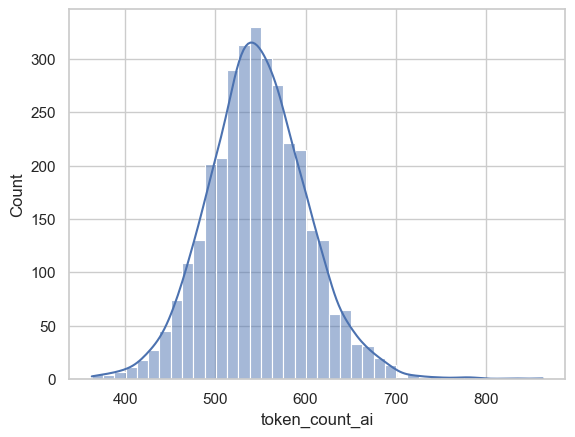

In [70]:
sns.histplot(data=df, x="token_count_ai", bins=40, kde=True)

<Axes: xlabel='token_count', ylabel='Count'>

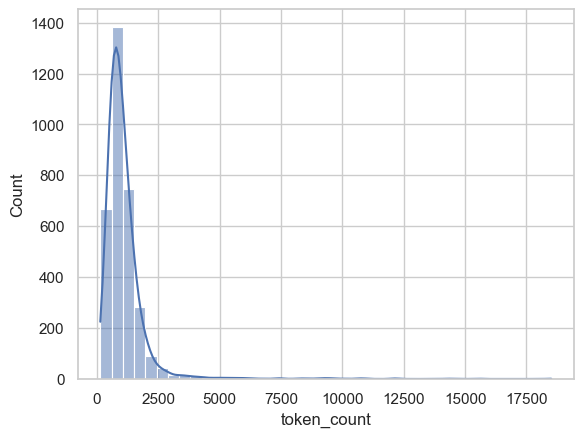

In [71]:
sns.histplot(data=df, x="token_count", bins=40, kde=True)

Examining the relationship between title length and the token counts for AI articles

Text(0.5, 1.0, 'Title Length vs GPT Token Count')

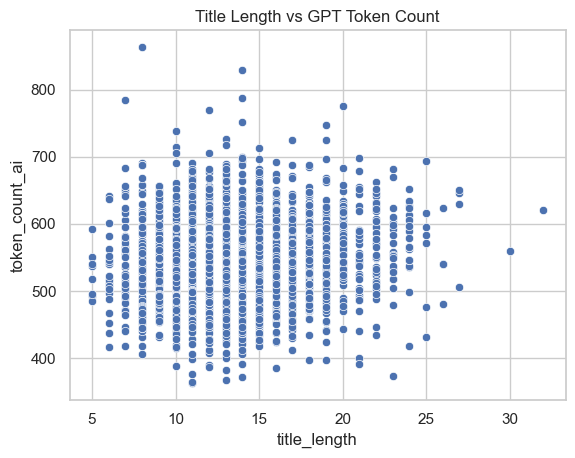

In [78]:
df["title_length"] = df["title"].apply(lambda x: len(str(x).split()))

# GPT
sns.scatterplot(data=df, x="title_length", y="token_count_ai")
plt.title("Title Length vs GPT Token Count")

Same comparison but compares the title length and sentence counts for AI articles

Text(0.5, 1.0, 'Title Length vs GPT Sentence Count')

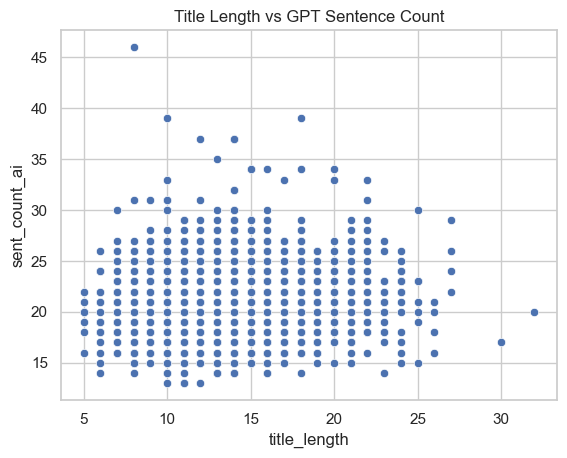

In [79]:
sns.scatterplot(data=df, x="title_length", y="sent_count_ai")
plt.title("Title Length vs GPT Sentence Count")

Title length doesn't correlate to token counts and sentence counts

In [74]:
df[["title_length", "token_count_ai", "sent_count_ai"]].corr()

title_length  token_count_ai  sent_count_ai
title_length        1.000000        0.082384       0.042315
token_count_ai      0.082384        1.000000       0.722387
sent_count_ai       0.042315        0.722387       1.000000

##### Analyzing token counts

In [80]:
df.describe()

Unnamed: 0  token_count_ai   token_count   sent_count  sent_count_ai  \
count  3295.000000     3295.000000   3295.000000  3295.000000    3295.000000   
mean   1647.000000      546.997876   1089.027011    36.741123      20.602731   
std     951.328895       55.532278    998.855347    38.506137       3.025342   
min       0.000000      363.000000    130.000000     3.000000      13.000000   
25%     823.500000      511.500000    642.000000    20.000000      19.000000   
50%    1647.000000      545.000000    904.000000    29.000000      20.000000   
75%    2470.500000      581.000000   1258.000000    43.000000      22.000000   
max    3294.000000      863.000000  18511.000000   794.000000      46.000000   

       tokens_per_sentence  tokens_per_sentence_ai     fk_grade  gunning_fog  \
count          3295.000000             3295.000000  3295.000000  3295.000000   
mean             31.331927               26.810055    12.388649    13.164085   
std               7.309145                2.588362     2.236850     2.161948   
min              13.823529               16.027027     4.400000     6.300000   
25%              27.030048               25.052632    10.900000    11.810000   
50%              30.727273               26.750000    12.300000    13.090000   
75%              35.020833               28.500000    13.800000    14.540000   
max             226.810811               37.062500    27.600000    28.450000   

       fk_grade_ai  ...  adj_pct_gpt  adv_pct_gpt  title_length  \
count  3295.000000  ...  3295.000000  3295.000000   3295.000000   
mean     15.469226  ...     0.102529     0.028029     13.525645   
std       1.350486  ...     0.016786     0.008565      3.604692   
min       8.700000  ...     0.047297     0.005976      5.000000   
25%      14.600000  ...     0.091393     0.022079     11.000000   
50%      15.500000  ...     0.102515     0.027597     13.000000   
75%      16.400000  ...     0.114045     0.033525     16.000000   
max      20.100000  ...     0.161504     0.063395     32.000000   

       sentiment_human  subjectivity_human  sentiment_gpt  subjectivity_gpt  \
count      3295.000000         3295.000000    3295.000000       3295.000000   
mean          0.077956            0.407238       0.093461          0.431350   
std           0.060622            0.069145       0.050760          0.071963   
min          -0.180556            0.140000      -0.120595          0.166667   
25%           0.038982            0.363575       0.060308          0.382172   
50%           0.078433            0.409629       0.091909          0.426282   
75%           0.115802            0.451558       0.124022          0.479033   
max           0.416927            0.713542       0.361508          0.717619   

       bias_terms_human  bias_terms_gpt  token_deficit  
count       3295.000000     3295.000000    3295.000000  
mean           1.846682        1.857303     453.002124  
std            2.129711        2.588135      55.532278  
min            0.000000        0.000000     137.000000  
25%            0.000000        0.000000     419.000000  
50%            1.301236        1.628664     455.000000  
75%            2.747253        2.249722     488.500000  
max           18.248175       25.896414     637.000000  

[8 rows x 43 columns]

Determine if the data is normally distributed

In [85]:
token_diff = df["token_count"] - df["token_count_ai"]
stat, p = shapiro(token_diff)
print(f"Shapiro-Wilk p = {p}")

Shapiro-Wilk p = 2.5868971775586135e-70


Examine if the token counts between GPT and human articles are statistically significant with an effect size. I use a wilcoxon test since the data isn't normally distributed

In [87]:
for cat in df['category'].unique():
    cat_df = df[df['category'] == cat].copy()

    # Drop pairs where the values are equal
    diffs = cat_df['token_count'] - cat_df['token_count_ai']
    non_zero_diffs = diffs[diffs != 0]

    if len(non_zero_diffs) < 10:
        print(f"{cat}: skipped (not enough non-zero differences)")
        continue

    x = cat_df.loc[non_zero_diffs.index, 'token_count']
    y = cat_df.loc[non_zero_diffs.index, 'token_count_ai']

    stat, p_val = wilcoxon(x, y)

    # Calculate the effect size
    n = len(non_zero_diffs)
    mean_rank_sum = n * (n + 1) / 4
    std_rank_sum = np.sqrt(n * (n + 1) * (2 * n + 1) / 24)
    z = (stat - mean_rank_sum) / std_rank_sum
    r = abs(z) / np.sqrt(n)

    print(f"{cat:<15} | p = {p_val} | effect size r = {r:.3f}")


Artificial Intelligence | p = 2.676206335408569e-43 | effect size r = 0.660
Law             | p = 8.520637332988821e-66 | effect size r = 0.806
Politics        | p = 3.1867602675167657e-61 | effect size r = 0.737
Economics       | p = 3.8828481189516146e-56 | effect size r = 0.723
Health          | p = 1.37110691006424e-64 | effect size r = 0.824
Climate         | p = 5.876057586416991e-57 | effect size r = 0.769
Conflicts       | p = 6.254109030894268e-67 | effect size r = 0.722


Examining how each category differs in token counts

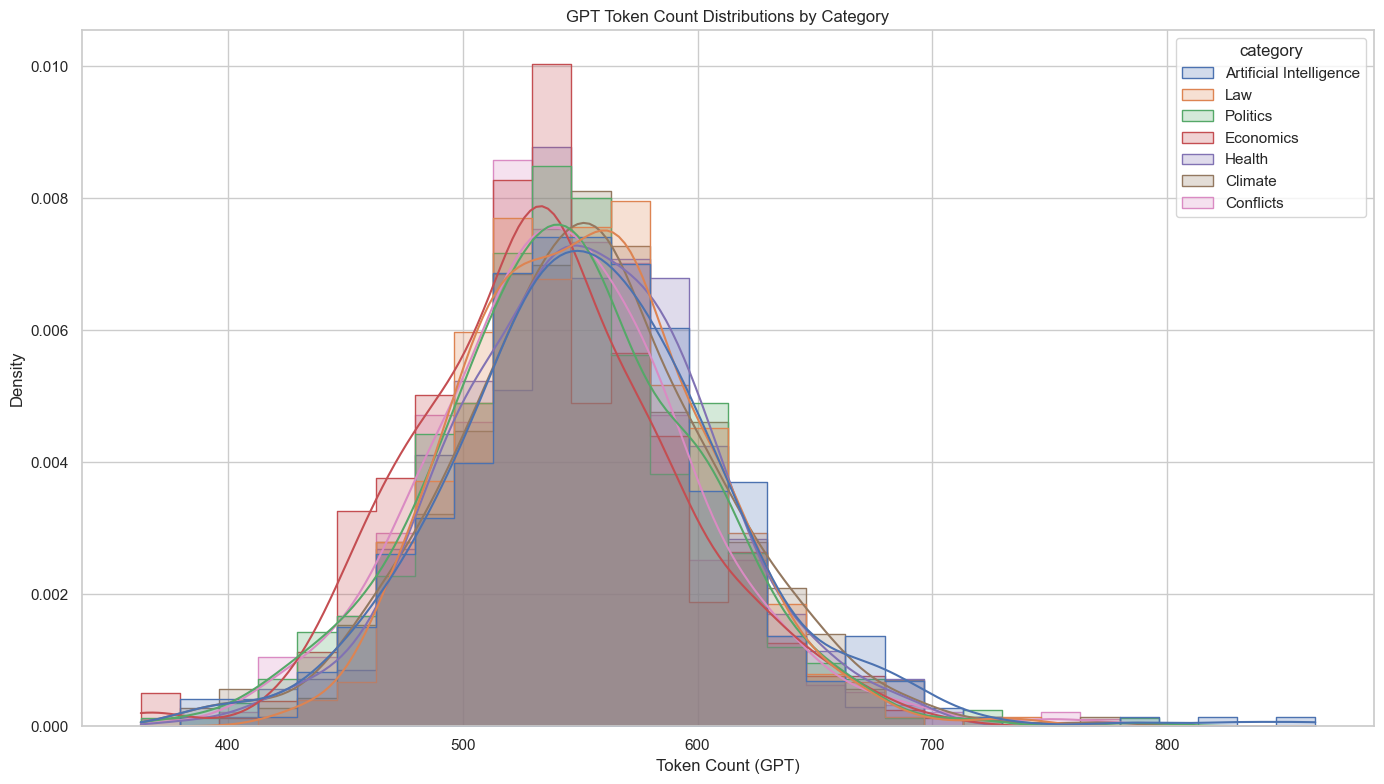

In [ ]:
gpt_df = df.copy()

plt.figure(figsize=(14, 8))
sns.histplot(data=gpt_df, x="token_count_ai", hue="category", bins=30, kde=True, element="step", stat="density", common_norm=False)
plt.title("GPT Token Count Distributions by Category")
plt.xlabel("Token Count (GPT)")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

Breaks down the differences in human and gpt generated token counts

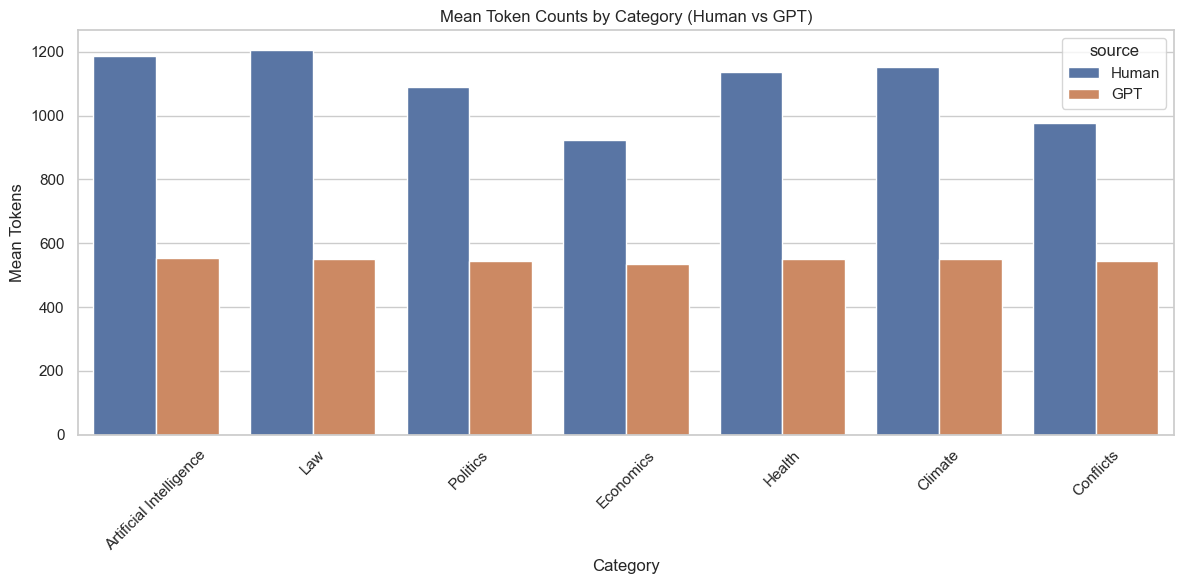

In [288]:
# Melt the DataFrame into long form for analysis
token_melt = df.melt(id_vars="category", 
                     value_vars=["token_count", "token_count_ai"], 
                     var_name="source", 
                     value_name="tokens")

# For clarity
token_melt["source"] = token_melt["source"].map({
    "token_count": "Human",
    "token_count_ai": "GPT"
})

plt.figure(figsize=(12, 6))
sns.barplot(data=token_melt, x="category", y="tokens", hue="source", errorbar = ('ci', False))
plt.title("Mean Token Counts by Category (Human vs GPT)")
plt.ylabel("Mean Tokens")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Examine if there's a correlation with title length

In [92]:
df[["title_length", "token_count", "token_count_ai"]].corr()

title_length  token_count  token_count_ai
title_length        1.000000     0.057562        0.082384
token_count         0.057562     1.000000        0.120755
token_count_ai      0.082384     0.120755        1.000000

##### Analyzing sentence counts

Comparing histograms of sentence counts for human and gpt generated content

<Axes: xlabel='sent_count', ylabel='Count'>

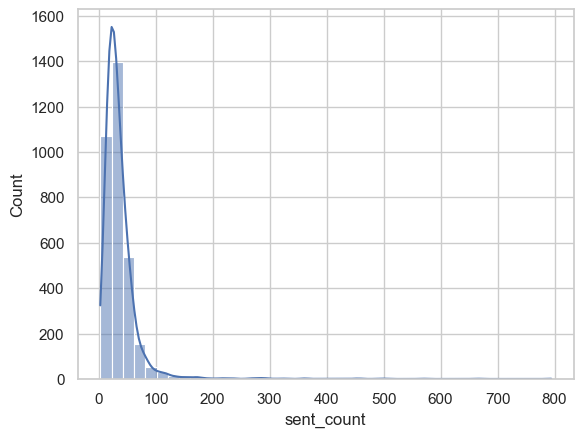

In [97]:
sns.histplot(data=df, x="sent_count", bins=40, kde=True)

<Axes: xlabel='sent_count_ai', ylabel='Count'>

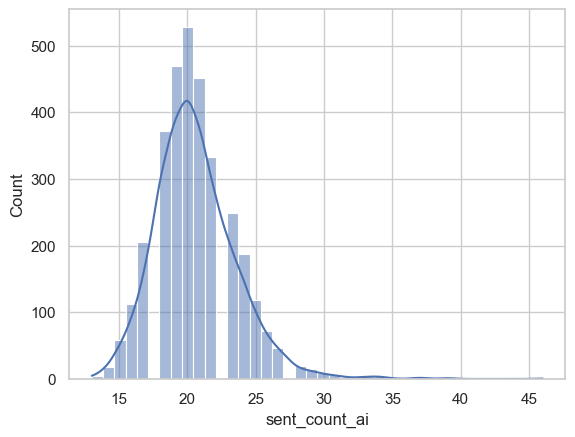

In [101]:
sns.histplot(data=df, x="sent_count_ai", bins=40, kde=True)

Sentence counts by category for gpt generated content

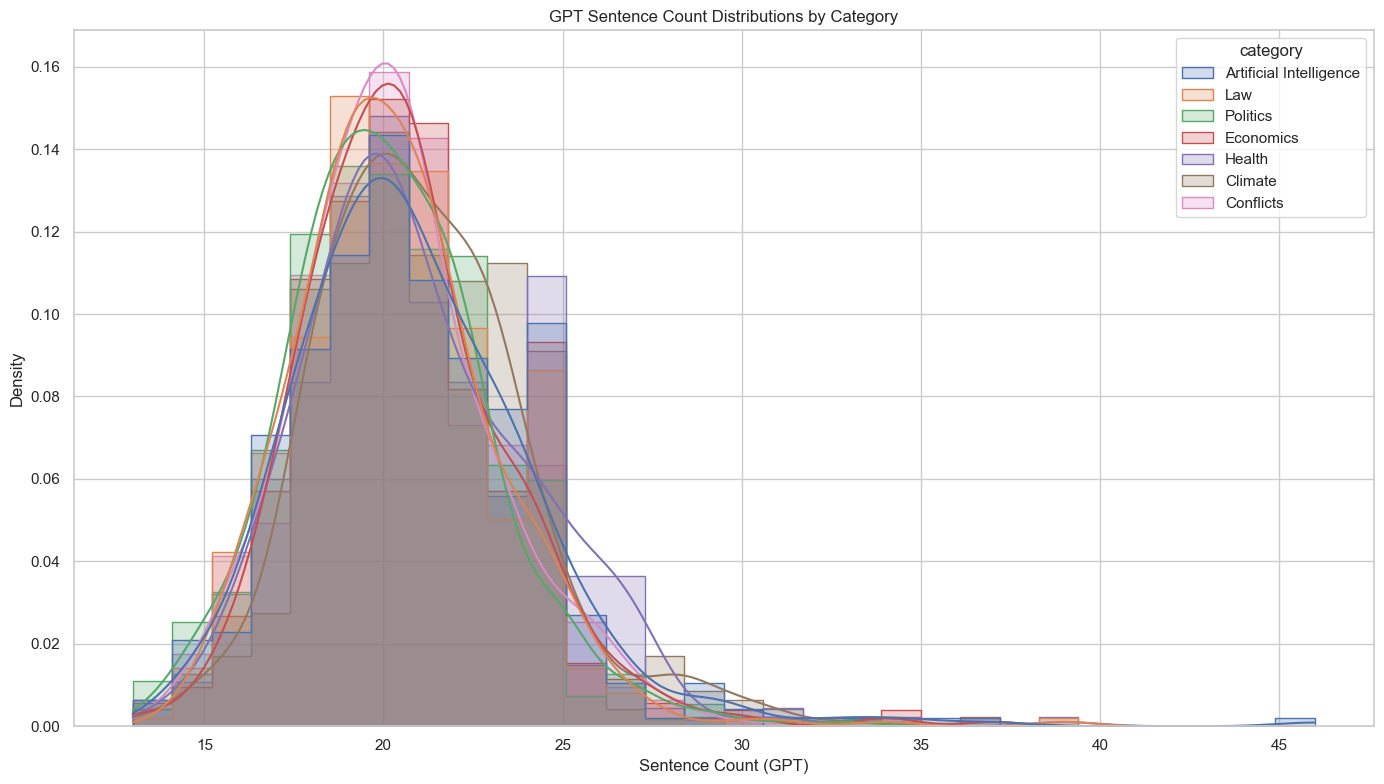

In [103]:
gpt_df = df.copy()

plt.figure(figsize=(14, 8))
sns.histplot(data=gpt_df, x="sent_count_ai", hue="category", bins=30, kde=True, element="step", stat="density", common_norm=False)
plt.title("GPT Sentence Count Distributions by Category")
plt.xlabel("Sentence Count (GPT)")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

Comparing the mean sentence counts by human vs gpt generated content

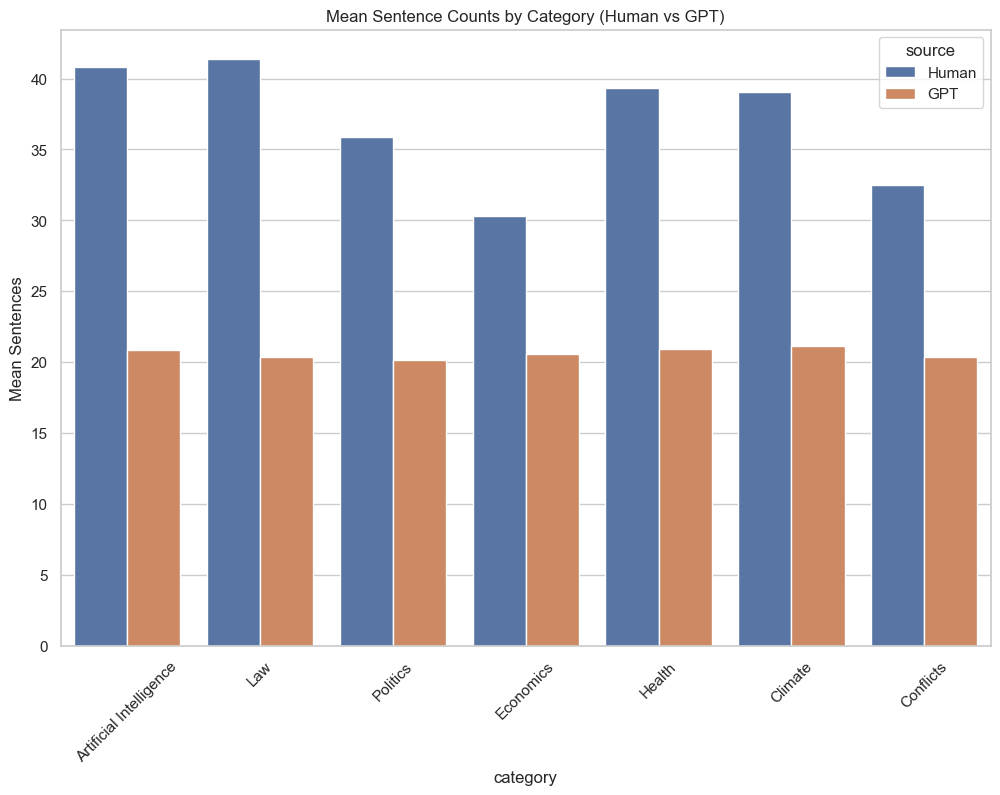

In [290]:
# Melt the relevant columns
sent_data = df.melt(id_vars="category", value_vars=["sent_count", "sent_count_ai"],
                    var_name="source", value_name="sentence_count")
sent_data["source"] = sent_data["source"].map({"sent_count": "Human", "sent_count_ai": "GPT"})

# Clustered bar plot
plt.figure(figsize=(12,8))
sns.barplot(data=sent_data, x="category", y="sentence_count", hue="source", errorbar = ("ci", False))
plt.xticks(rotation=45)
plt.title("Mean Sentence Counts by Category (Human vs GPT)")
plt.ylabel("Mean Sentences")
plt.show()

Seeing if the data is normally distributed to determine statistical testing

In [110]:
from scipy.stats import shapiro
stat, p = shapiro(df["sent_count"] - df["sent_count_ai"])
print(f"Shapiro-Wilk p = {p}")

Shapiro-Wilk p = 5.88638618434605e-72


Calculating the p-values and effect sizes for each category 

In [111]:
for cat in df['category'].unique():
    cat_df = df[df['category'] == cat].copy()

    # Drop pairs where the values are equal 
    diffs = cat_df['sent_count'] - cat_df['sent_count_ai']
    non_zero_diffs = diffs[diffs != 0]

    if len(non_zero_diffs) < 10:
        print(f"{cat}: skipped (not enough non-zero differences)")
        continue

    x = cat_df.loc[non_zero_diffs.index, 'sent_count']
    y = cat_df.loc[non_zero_diffs.index, 'sent_count_ai']

    stat, p_val = wilcoxon(x, y)

    # Calculate Z approximation and effect size r
    n = len(non_zero_diffs)
    mean_rank_sum = n * (n + 1) / 4
    std_rank_sum = np.sqrt(n * (n + 1) * (2 * n + 1) / 24)
    z = (stat - mean_rank_sum) / std_rank_sum
    r = abs(z) / np.sqrt(n)

    print(f"{cat:<15} | p = {p_val} | effect size r = {r:.3f}")


Artificial Intelligence | p = 7.551960621185131e-27 | effect size r = 0.520
Law             | p = 3.9122687495589536e-55 | effect size r = 0.740
Politics        | p = 2.320076107598677e-41 | effect size r = 0.612
Economics       | p = 3.1558922701233844e-32 | effect size r = 0.553
Health          | p = 3.860283840749992e-49 | effect size r = 0.728
Climate         | p = 1.3352708947896998e-40 | effect size r = 0.653
Conflicts       | p = 5.916970519177054e-41 | effect size r = 0.570


Examining the correlations between title length and sentence counts

In [109]:
df[["title_length", "sent_count", "sent_count_ai"]].corr()

title_length  sent_count  sent_count_ai
title_length       1.000000    0.043534       0.042315
sent_count         0.043534    1.000000       0.151577
sent_count_ai      0.042315    0.151577       1.000000

##### Analyzing Tokens Per Sentence

Histograms of human and gpt generared articles of tokens per sentence

<Axes: xlabel='tokens_per_sentence', ylabel='Count'>

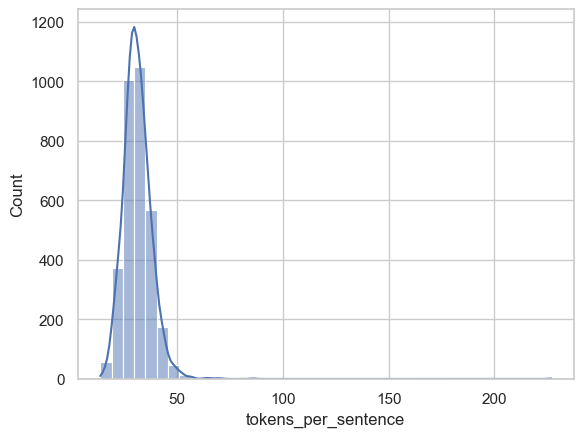

In [118]:
sns.histplot(data=df, x="tokens_per_sentence", bins=40, kde=True)

<Axes: xlabel='tokens_per_sentence_ai', ylabel='Count'>

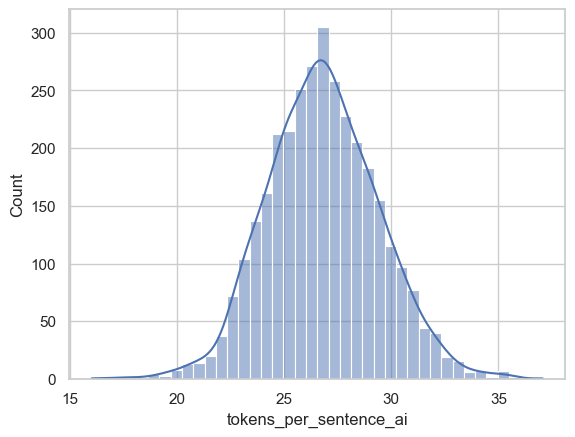

In [119]:
sns.histplot(data=df, x="tokens_per_sentence_ai", bins=40, kde=True)

In [120]:
for cat in df['category'].unique():
    cat_df = df[df['category'] == cat]
    stat, p_val = wilcoxon(cat_df['tokens_per_sentence'], cat_df['tokens_per_sentence_ai'])
    print(f"{cat}: stat={stat:.3f}, p={p_val}")

Artificial Intelligence: stat=15915.500, p=1.2017745285167777e-33
Law: stat=21622.000, p=1.9267252402855635e-26
Politics: stat=23116.000, p=8.576303159905553e-35
Economics: stat=16350.000, p=1.0002075009400514e-41
Health: stat=15248.500, p=3.742012746519375e-32
Climate: stat=12023.000, p=3.513229031436522e-40
Conflicts: stat=23714.500, p=2.731719425132971e-49


Comparing distributions of tokens per sentence for each category for human and gpt generated articles

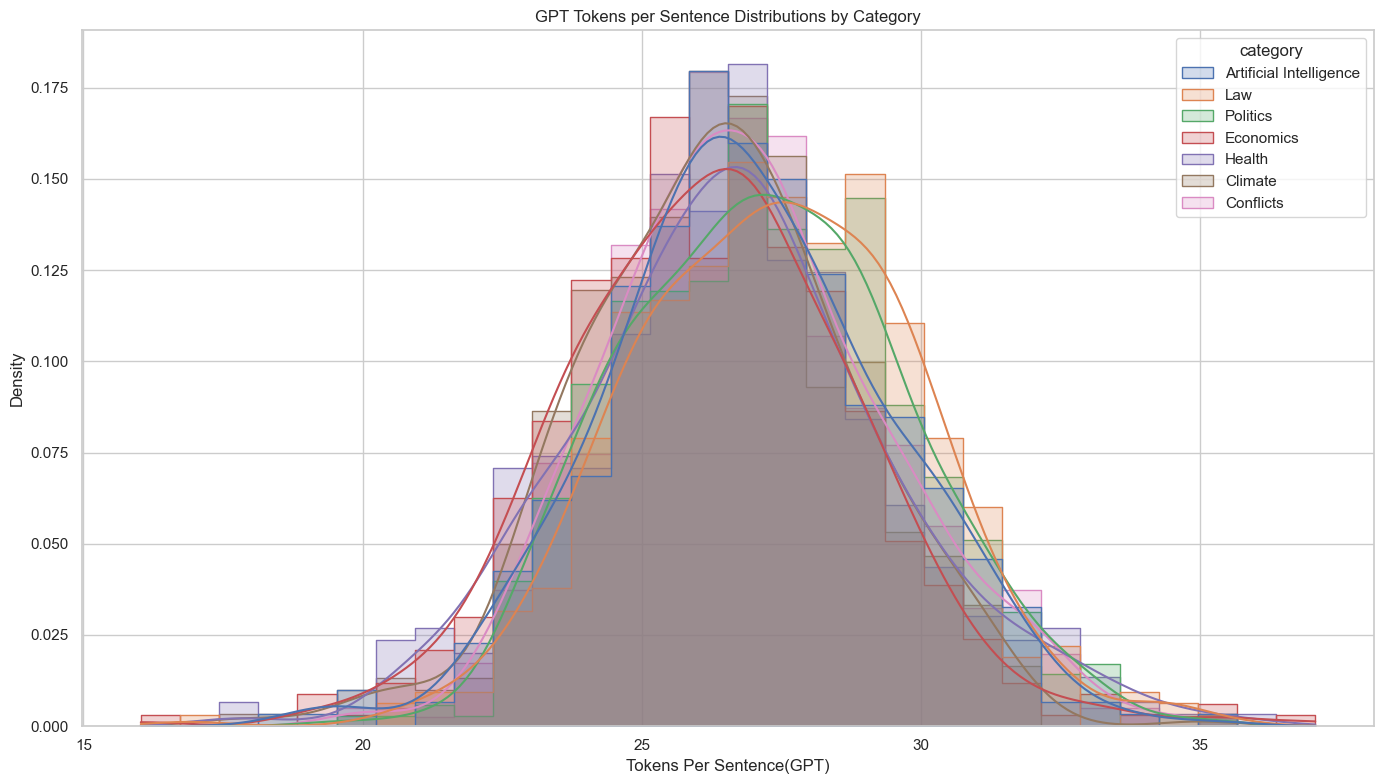

In [121]:
plt.figure(figsize=(14, 8))
sns.histplot(data=gpt_df, x="tokens_per_sentence_ai", hue="category", bins=30, kde=True, element="step", stat="density", common_norm=False)
plt.title("GPT Tokens per Sentence Distributions by Category")
plt.xlabel("Tokens Per Sentence(GPT)")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

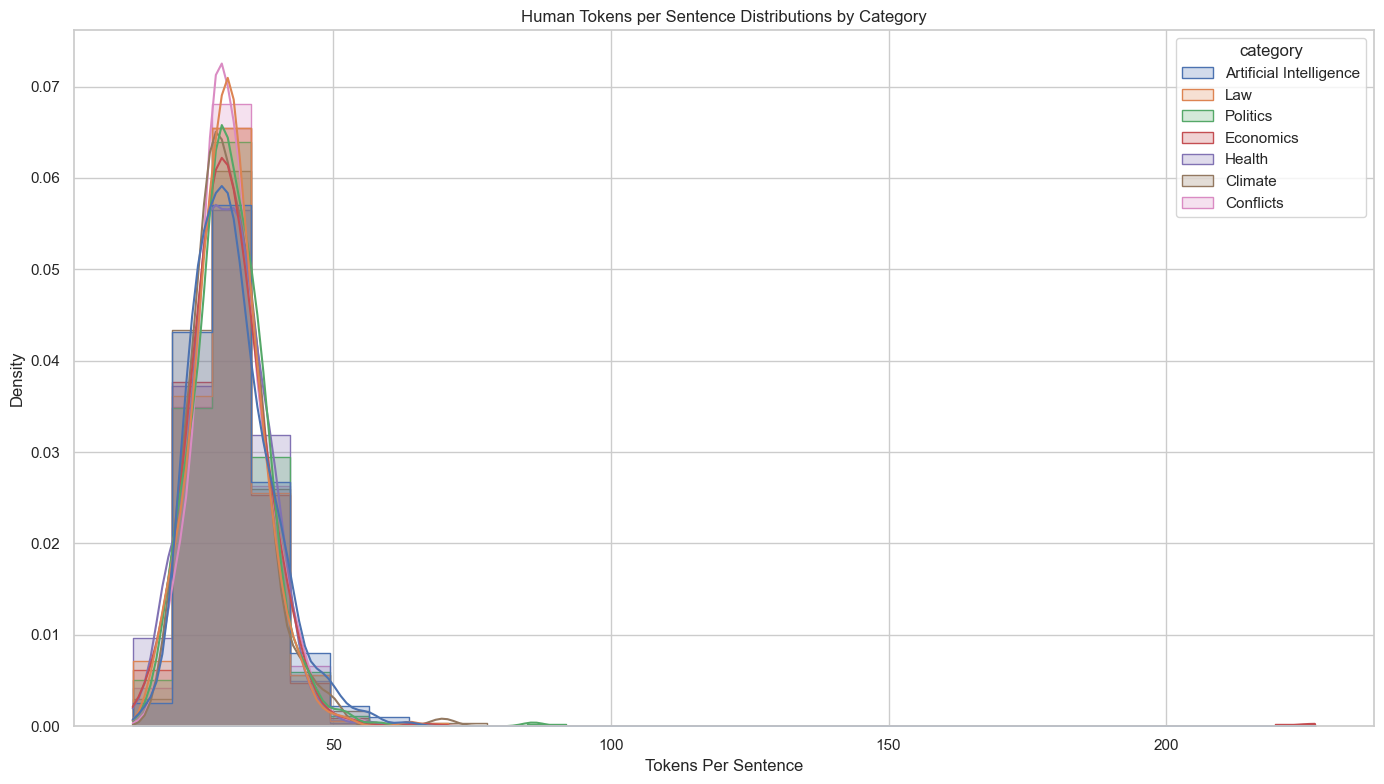

In [132]:
plt.figure(figsize=(14, 8))
sns.histplot(data=gpt_df, x="tokens_per_sentence", hue="category", bins=30, kde=True, element="step", stat="density", common_norm=False)
plt.title("Human Tokens per Sentence Distributions by Category")
plt.xlabel("Tokens Per Sentence")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

Comparing medians of each group

In [131]:
df["tokens_per_sentence"].median()

30.727272727272727

In [129]:
df["tokens_per_sentence_ai"].median()

26.75

Comparing human vs gpt generated mean token per sentence counts

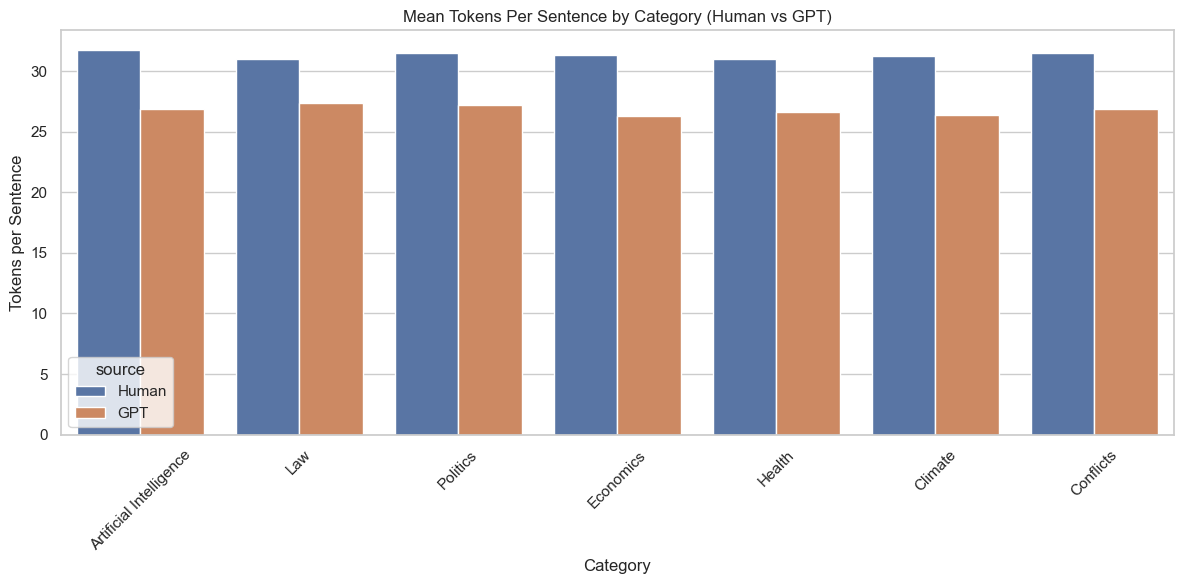

In [138]:
# Melt the DataFrame into long form for analysis
token_melt = df.melt(id_vars="category", 
                     value_vars=["tokens_per_sentence", "tokens_per_sentence_ai"], 
                     var_name="source", 
                     value_name="tokens_per_sentence_count")

# Renames for clarity
token_melt["source"] = token_melt["source"].map({
    "tokens_per_sentence": "Human",
    "tokens_per_sentence_ai": "GPT"
})

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=token_melt, x="category", y="tokens_per_sentence_count", hue="source", errorbar = ("ci", False))
plt.title("Mean Tokens Per Sentence by Category (Human vs GPT)")
plt.ylabel("Tokens per Sentence")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Examining if the data is normally distributed

In [135]:
df["sent_diff"] = df["tokens_per_sentence"] - df["tokens_per_sentence_ai"]
stat, p = shapiro(df["sent_diff"])
print(f"Shapiro-Wilk p = {p}")

Shapiro-Wilk p = 1.8479079061309367e-51


Find the p-values and effect size scores

In [136]:
for cat in df['category'].unique():
    cat_df = df[df['category'] == cat].copy()

    # Drop pairs where the values are equal
    diffs = cat_df['tokens_per_sentence'] - cat_df['tokens_per_sentence_ai']
    non_zero_diffs = diffs[diffs != 0]

    if len(non_zero_diffs) < 10:
        print(f"{cat}: skipped (not enough non-zero differences)")
        continue

    x = cat_df.loc[non_zero_diffs.index, 'tokens_per_sentence']
    y = cat_df.loc[non_zero_diffs.index, 'tokens_per_sentence_ai']

    stat, p_val = wilcoxon(x, y)

    # Calculate Z approximation and effect size r
    n = len(non_zero_diffs)
    mean_rank_sum = n * (n + 1) / 4
    std_rank_sum = np.sqrt(n * (n + 1) * (2 * n + 1) / 24)
    z = (stat - mean_rank_sum) / std_rank_sum
    r = abs(z) / np.sqrt(n)

    print(f"{cat:<15} | p = {p_val} | effect size r = {r:.3f}")

Artificial Intelligence | p = 1.2017745285167777e-33 | effect size r = 0.578
Law             | p = 1.9267252402855635e-26 | effect size r = 0.500
Politics        | p = 8.576303159905553e-35 | effect size r = 0.549
Economics       | p = 1.0002075009400514e-41 | effect size r = 0.619
Health          | p = 3.742012746519375e-32 | effect size r = 0.573
Climate         | p = 3.513229031436522e-40 | effect size r = 0.641
Conflicts       | p = 2.731719425132971e-49 | effect size r = 0.617


Examine correlations between title length and tokens per sentence

In [137]:
df[["title_length", "tokens_per_sentence", "tokens_per_sentence_ai"]].corr()

title_length  tokens_per_sentence  \
title_length                1.000000             0.034241   
tokens_per_sentence         0.034241             1.000000   
tokens_per_sentence_ai      0.027476             0.117677   

                        tokens_per_sentence_ai  
title_length                          0.027476  
tokens_per_sentence                   0.117677  
tokens_per_sentence_ai                1.000000

#### Readability Scores

##### Flesch-Kincaid

Histograms of human and gpt generared articles of fk scores

<Axes: xlabel='fk_grade', ylabel='Count'>

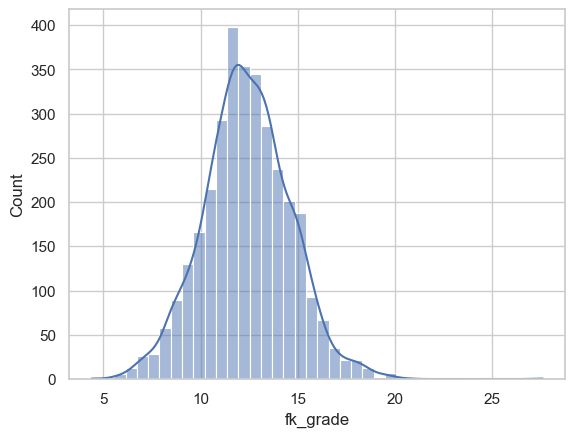

In [154]:
sns.histplot(data=df, x="fk_grade", bins=40, kde=True)

<Axes: xlabel='fk_grade_ai', ylabel='Count'>

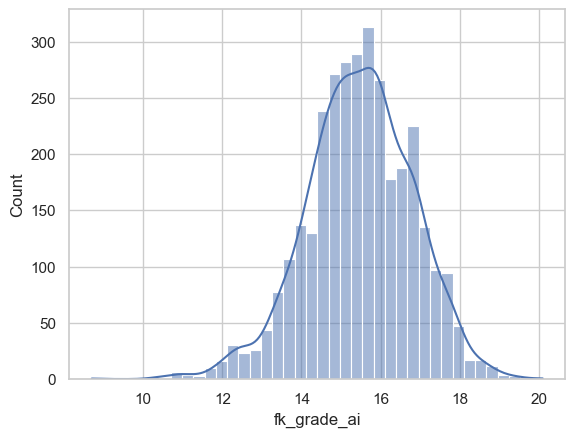

In [155]:
sns.histplot(data=df, x="fk_grade_ai", bins=40, kde=True)

Breakdown of FK scores by category for GPT articles

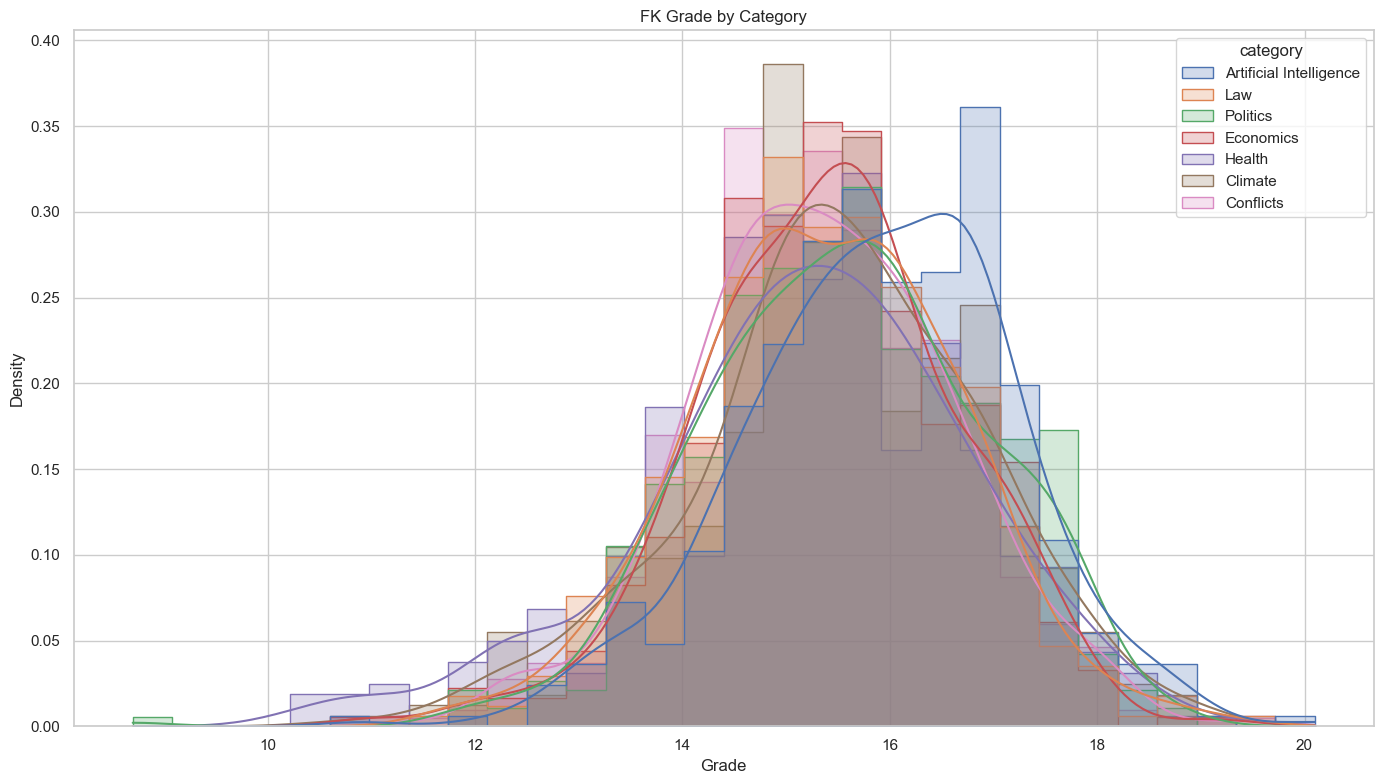

In [139]:
plt.figure(figsize=(14, 8))
sns.histplot(data=gpt_df, x="fk_grade_ai", hue="category", bins=30, kde=True, element="step", stat="density", common_norm=False)
plt.title("FK Grade by Category")
plt.xlabel("Grade")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

Examining differences in average FK scores across categories for human and gpt generated content

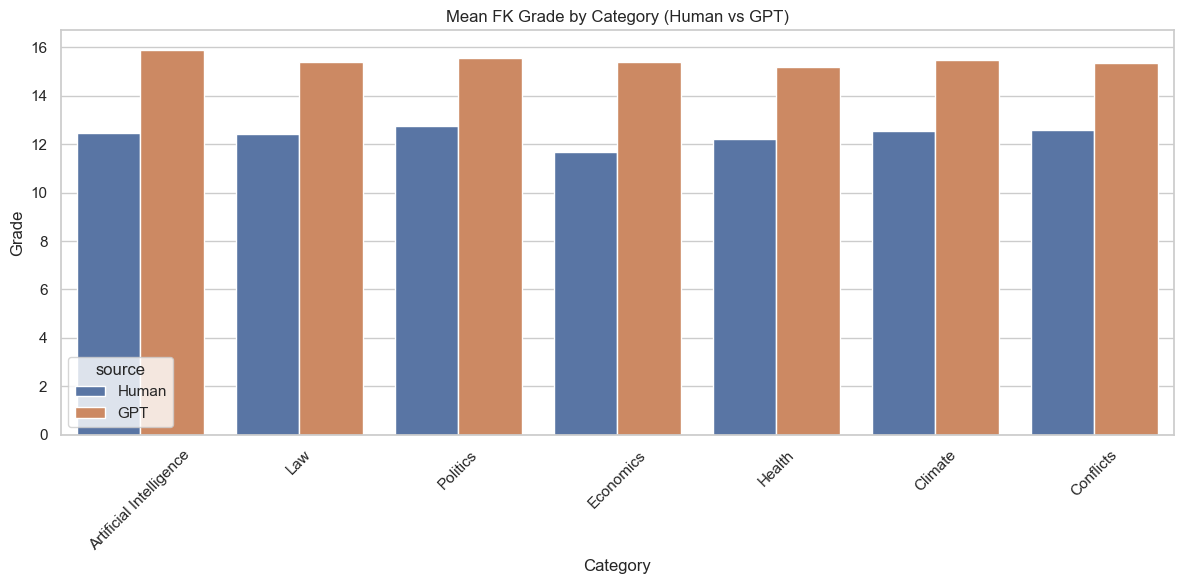

In [291]:
# Melt the DataFrame into long form for analysis
token_melt = df.melt(id_vars="category", 
                     value_vars=["fk_grade", "fk_grade_ai"], 
                     var_name="source", 
                     value_name="fk_grade_count")

# Renamed for clarity
token_melt["source"] = token_melt["source"].map({
    "fk_grade": "Human",
    "fk_grade_ai": "GPT"
})

plt.figure(figsize=(12, 6))
sns.barplot(data=token_melt, x="category", y="fk_grade_count", hue="source", errorbar = ("ci", False))
plt.title("Mean FK Grade by Category (Human vs GPT)")
plt.ylabel("Grade")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Examining data normality

In [142]:
df["sent_diff"] = df["fk_grade"] - df["fk_grade_ai"]
stat, p = shapiro(df["sent_diff"])
print(f"Shapiro-Wilk p = {p}")

Shapiro-Wilk p = 4.6855507928091914e-08


Checking out p-values and effect size scores

In [145]:
for cat in df['category'].unique():
    cat_df = df[df['category'] == cat].copy()

    # Drop pairs where the values are equal
    diffs = cat_df['fk_grade'] - cat_df['fk_grade_ai']
    non_zero_diffs = diffs[diffs != 0]

    if len(non_zero_diffs) < 10:
        print(f"{cat}: skipped (not enough non-zero differences)")
        continue

    x = cat_df.loc[non_zero_diffs.index, 'fk_grade']
    y = cat_df.loc[non_zero_diffs.index, 'fk_grade_ai']

    stat, p_val = wilcoxon(x, y)

    # Calculate Z approximation and effect size r
    n = len(non_zero_diffs)
    mean_rank_sum = n * (n + 1) / 4
    std_rank_sum = np.sqrt(n * (n + 1) * (2 * n + 1) / 24)
    z = (stat - mean_rank_sum) / std_rank_sum
    r = abs(z) / np.sqrt(n)

    print(f"{cat:<15} | p = {p_val} | effect size r = {r:.3f}")

Artificial Intelligence | p = 1.2374411710305117e-64 | effect size r = 0.815
Law             | p = 3.537688746270133e-65 | effect size r = 0.805
Politics        | p = 1.3440612434235795e-68 | effect size r = 0.784
Economics       | p = 2.742043670600313e-76 | effect size r = 0.847
Health          | p = 7.314888450870677e-65 | effect size r = 0.827
Climate         | p = 1.1584491339991776e-63 | effect size r = 0.817
Conflicts       | p = 3.776871840685411e-85 | effect size r = 0.822


Examining how title length correlates to FK scores

In [144]:
df[["title_length", "fk_grade", "fk_grade_ai"]].corr()

title_length  fk_grade  fk_grade_ai
title_length      1.000000 -0.037437    -0.087961
fk_grade         -0.037437  1.000000     0.260678
fk_grade_ai      -0.087961  0.260678     1.000000

##### Gunning Fog

Histograms of human and gpt generared articles of Gunning Fog Scores

<Axes: xlabel='gunning_fog', ylabel='Count'>

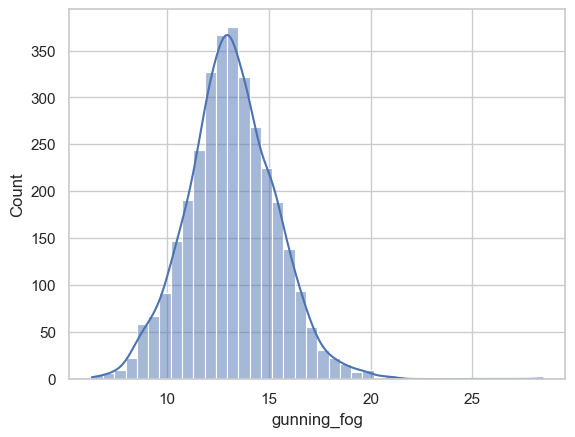

In [146]:
sns.histplot(data=df, x="gunning_fog", bins=40, kde=True)

<Axes: xlabel='gunning_fog_ai', ylabel='Count'>

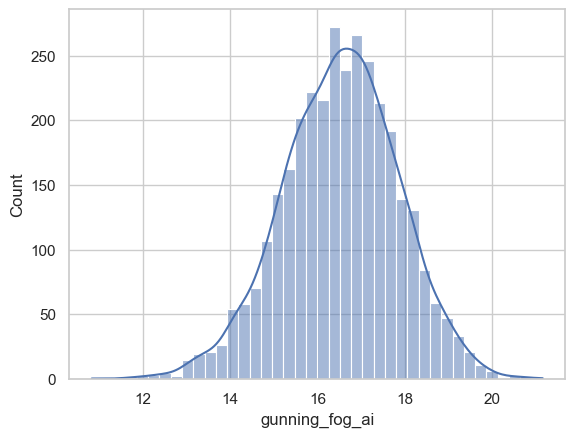

In [147]:
sns.histplot(data=df, x="gunning_fog_ai", bins=40, kde=True)

Comparing distributions of gunning fog scores for each category for gpt generated articles

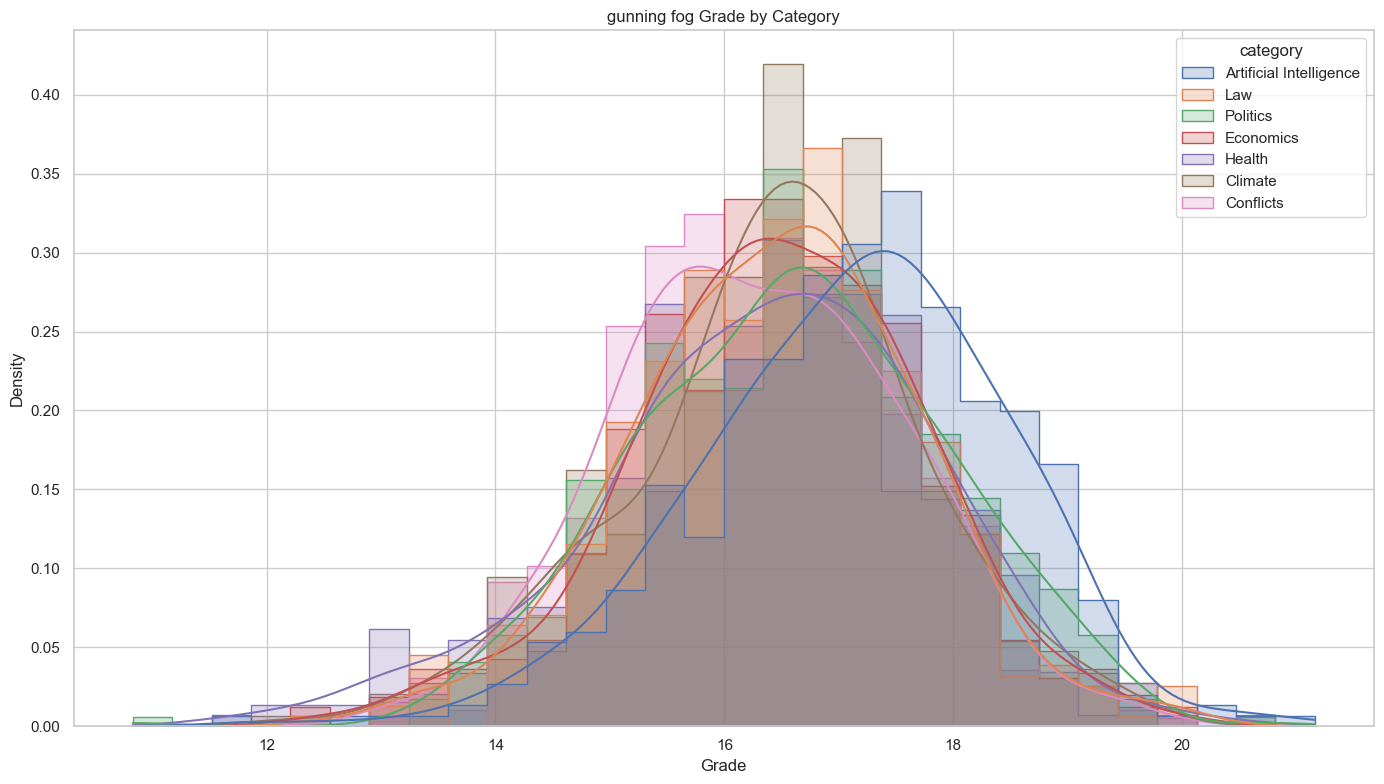

In [148]:
plt.figure(figsize=(14, 8))
sns.histplot(data=gpt_df, x="gunning_fog_ai", hue="category", bins=30, kde=True, element="step", stat="density", common_norm=False)
plt.title("gunning fog Grade by Category")
plt.xlabel("Grade")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

Comparing mean gunning fog scores for human and gpt generated articles by category

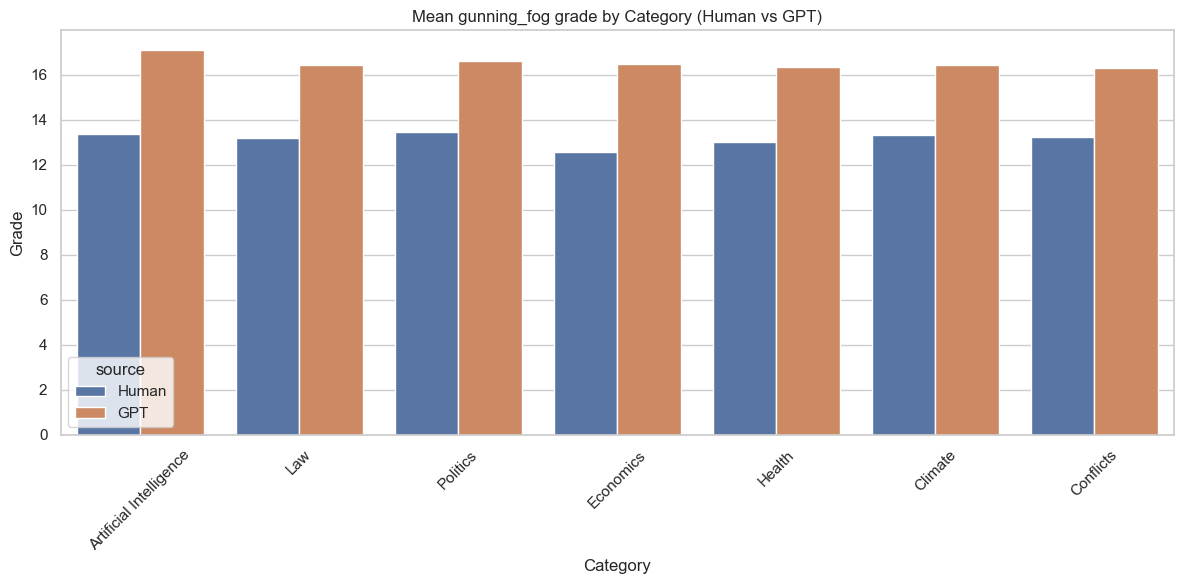

In [292]:
# Melt the DataFrame into long form for analysis
token_melt = df.melt(id_vars="category", 
                     value_vars=["gunning_fog", "gunning_fog_ai"], 
                     var_name="source", 
                     value_name="gunning_fog_count")

# Renaming for clarity
token_melt["source"] = token_melt["source"].map({
    "gunning_fog": "Human",
    "gunning_fog_ai": "GPT"
})

plt.figure(figsize=(12, 6))
sns.barplot(data=token_melt, x="category", y="gunning_fog_count", hue="source", errorbar = ("ci", False))
plt.title("Mean gunning_fog grade by Category (Human vs GPT)")
plt.ylabel("Grade")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Examining normality

In [150]:
df["sent_diff"] = df["gunning_fog"] - df["gunning_fog"]
stat, p = shapiro(df["sent_diff"])
print(f"Shapiro-Wilk p = {p}")

Shapiro-Wilk p = 1.0


c:\Users\Public\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


Find p-values and effect size scores. Since the data is normally distributed, I used a t-test

In [151]:
for cat in df['category'].unique():
    cat_df = df[df['category'] == cat].copy()

    # Compute differences
    diffs = cat_df['fk_grade'] - cat_df['fk_grade_ai']
    non_zero_diffs = diffs[diffs != 0]

    if len(non_zero_diffs) < 10:
        print(f"{cat}: skipped (not enough non-zero differences)")
        continue

    x = cat_df.loc[non_zero_diffs.index, 'fk_grade']
    y = cat_df.loc[non_zero_diffs.index, 'fk_grade_ai']

    # Paired t-test
    stat, p_val = ttest_rel(x, y)

    # Cohen's d for paired samples
    diff_array = x - y
    d = diff_array.mean() / diff_array.std(ddof=1)

    print(f"{cat:<15} | p = {p_val:.4e} | Cohen's d = {abs(d):.3f}")

Artificial Intelligence | p = 5.8209e-107 | Cohen's d = 1.431
Law             | p = 1.5735e-100 | Cohen's d = 1.324
Politics        | p = 2.3632e-92 | Cohen's d = 1.141
Economics       | p = 6.1413e-135 | Cohen's d = 1.619
Health          | p = 4.8070e-99 | Cohen's d = 1.370
Climate         | p = 7.4567e-101 | Cohen's d = 1.386
Conflicts       | p = 1.2100e-132 | Cohen's d = 1.376


Examining correlations between title length and gunning fog

In [153]:
df[["title_length", "gunning_fog", "gunning_fog_ai"]].corr()

title_length  gunning_fog  gunning_fog_ai
title_length        1.000000    -0.015486       -0.075253
gunning_fog        -0.015486     1.000000        0.205885
gunning_fog_ai     -0.075253     0.205885        1.000000

#### Lexical richness TTR

Histograms of human and gpt generared articles of TTR Ratios

<Axes: xlabel='ttr_human', ylabel='Count'>

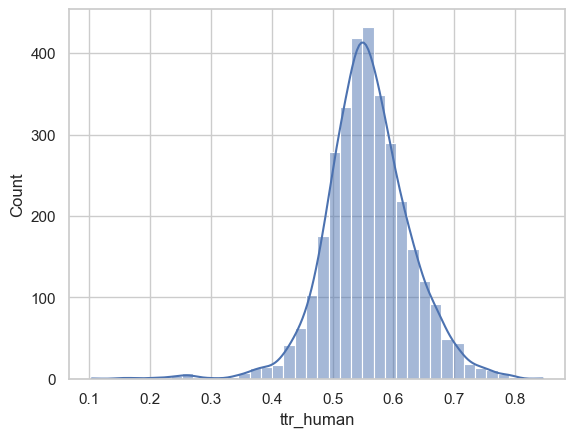

In [156]:
sns.histplot(data=df, x="ttr_human", bins=40, kde=True)

<Axes: xlabel='ttr_gpt', ylabel='Count'>

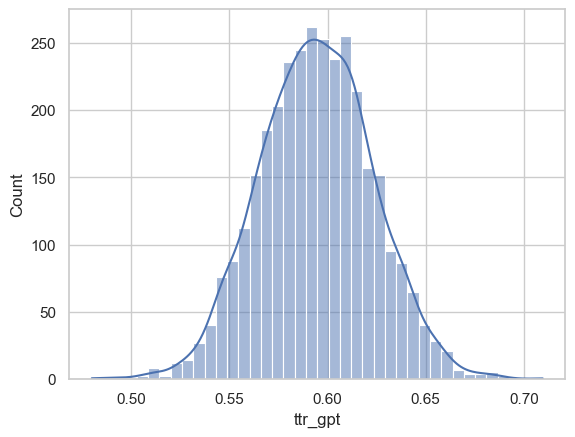

In [157]:
sns.histplot(data=df, x="ttr_gpt", bins=40, kde=True)

Comparing distributions of TTR Ratios for each category for human and gpt generated articles

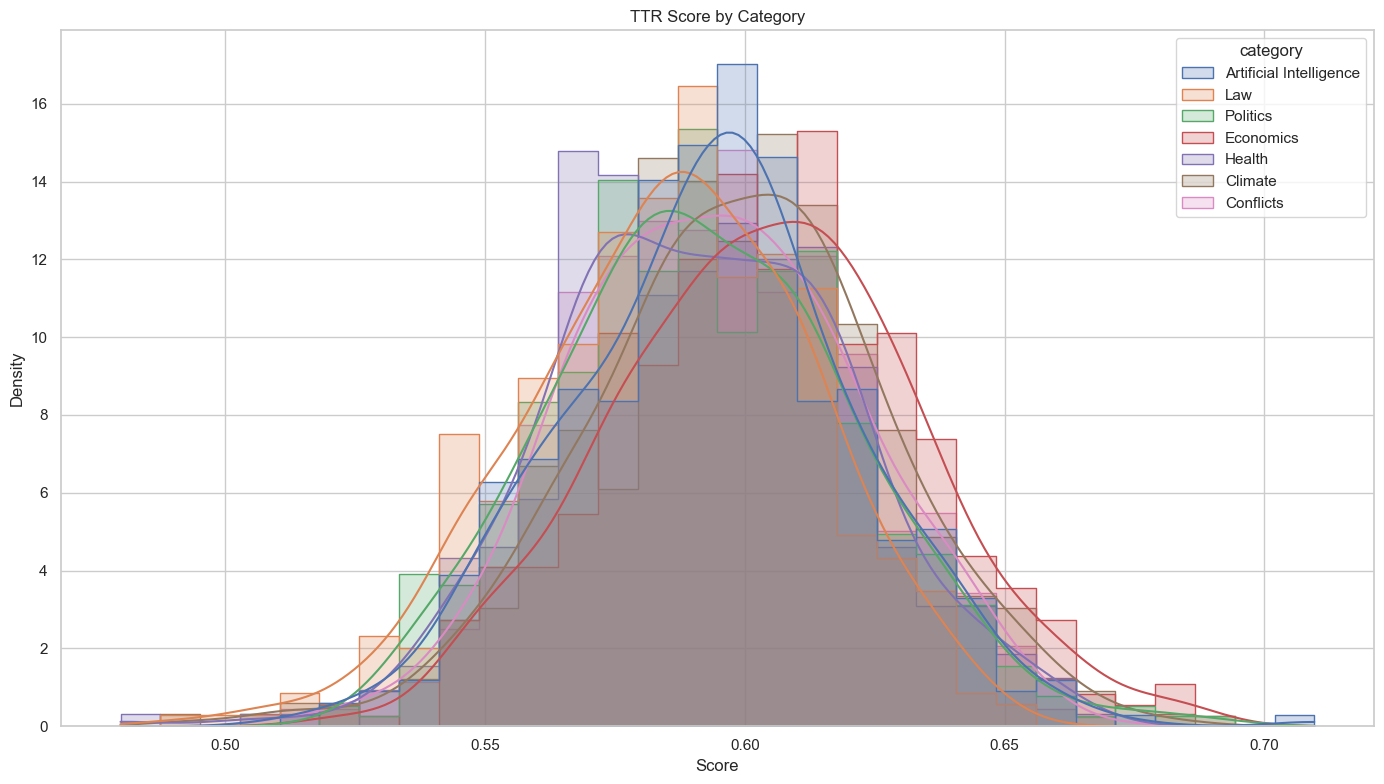

In [158]:
plt.figure(figsize=(14, 8))
sns.histplot(data=gpt_df, x="ttr_gpt", hue="category", bins=30, kde=True, element="step", stat="density", common_norm=False)
plt.title("TTR Score by Category")
plt.xlabel("Score")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

Comparing mean ttr ratios for human and gpt generated articles by category

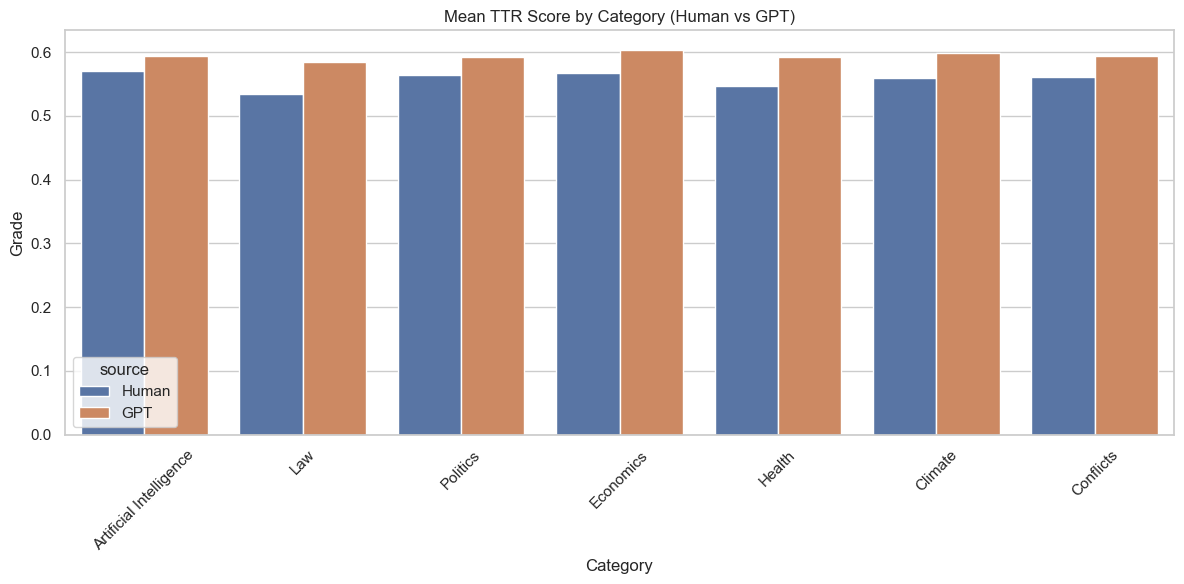

In [293]:
# Melt the DataFrame into long form for analysis
token_melt = df.melt(id_vars="category", 
                     value_vars=["ttr_human", "ttr_gpt"], 
                     var_name="source", 
                     value_name="ttr_score_count")

# Renaming for clarity
token_melt["source"] = token_melt["source"].map({
    "ttr_human": "Human",
    "ttr_gpt": "GPT"
})

plt.figure(figsize=(12, 6))
sns.barplot(data=token_melt, x="category", y="ttr_score_count", hue="source", errorbar=("ci", False))
plt.title("Mean TTR Score by Category (Human vs GPT)")
plt.ylabel("Grade")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Assessing data normality

In [160]:
df["sent_diff"] = df["ttr_human"] - df["ttr_gpt"]
stat, p = shapiro(df["sent_diff"])
print(f"Shapiro-Wilk p = {p}")

Shapiro-Wilk p = 2.4287220881985886e-23


Find p-values and effect size scores.

In [ ]:
for cat in df['category'].unique():
    cat_df = df[df['category'] == cat].copy()

    # Drop pairs where the values are equal
    diffs = cat_df['ttr_human'] - cat_df['ttr_gpt']
    non_zero_diffs = diffs[diffs != 0]

    if len(non_zero_diffs) < 10:
        print(f"{cat}: skipped (not enough non-zero differences)")
        continue

    x = cat_df.loc[non_zero_diffs.index, 'ttr_human']
    y = cat_df.loc[non_zero_diffs.index, 'ttr_gpt']

    stat, p_val = wilcoxon(x, y)

    n = len(non_zero_diffs)
    mean_rank_sum = n * (n + 1) / 4
    std_rank_sum = np.sqrt(n * (n + 1) * (2 * n + 1) / 24)
    z = (stat - mean_rank_sum) / std_rank_sum
    r = abs(z) / np.sqrt(n)

    print(f"{cat:<15} | p = {p_val} | effect size r = {r:.3f}")


Examining correlations between title length and ttr ratios

In [162]:
df[["title_length", "ttr_human", "ttr_gpt"]].corr()

title_length  ttr_human   ttr_gpt
title_length      1.000000  -0.099389 -0.010770
ttr_human        -0.099389   1.000000  0.079015
ttr_gpt          -0.010770   0.079015  1.000000

#### Named entity frequency

#### Organizations

Histograms of human and gpt generared articles of organization usage 

<Axes: xlabel='orgs_gpt', ylabel='Count'>

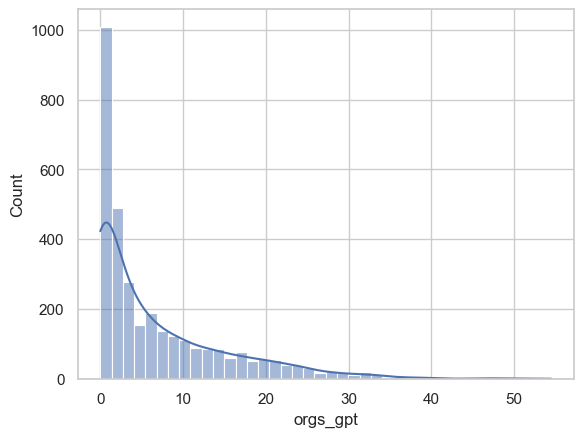

In [163]:
sns.histplot(data=df, x="orgs_gpt", bins=40, kde=True)

<Axes: xlabel='orgs_human', ylabel='Count'>

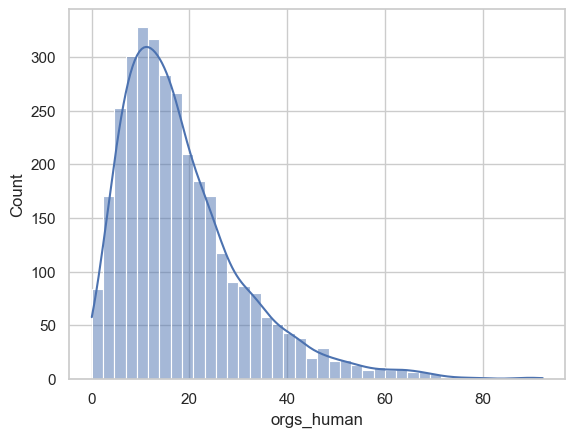

In [164]:
sns.histplot(data=df, x="orgs_human", bins=40, kde=True)

Comparing distributions of organizations being specified for each category for gpt generated articles

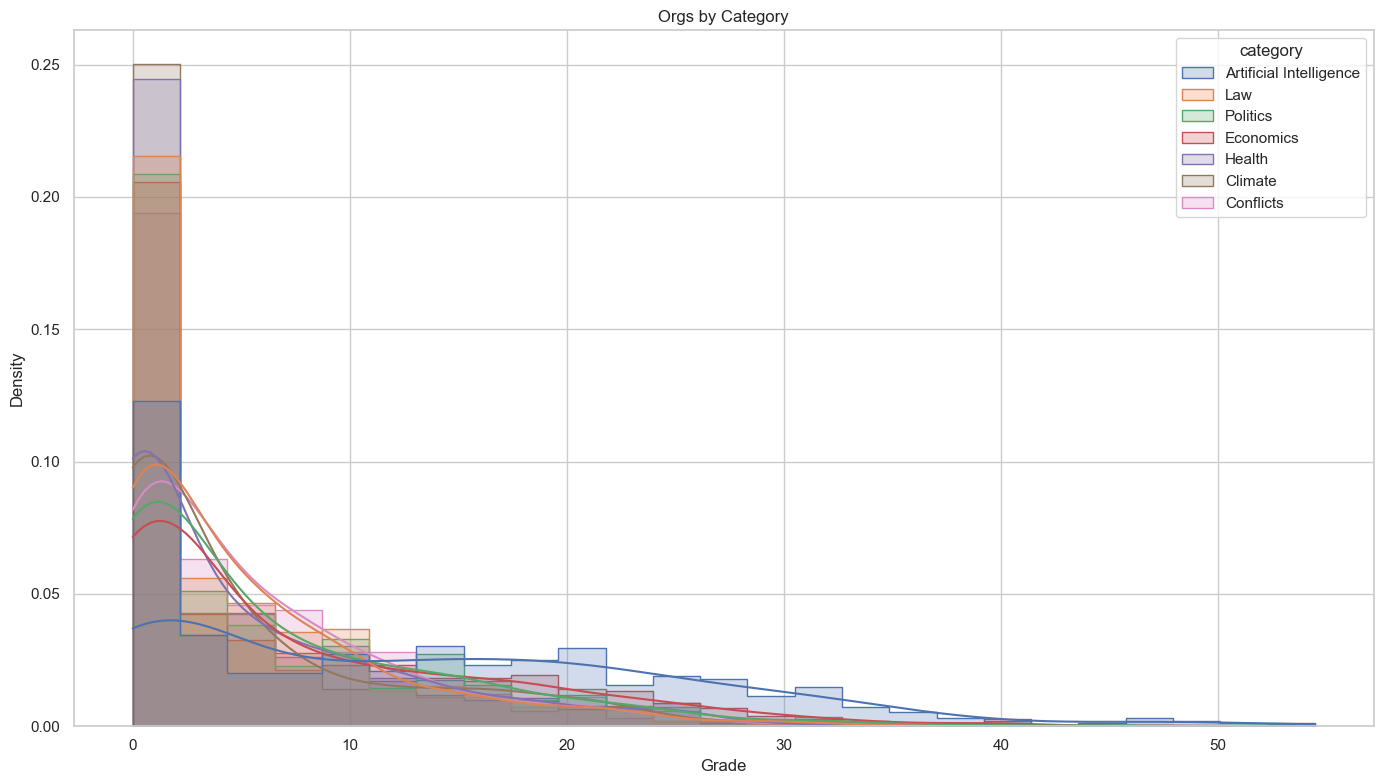

In [166]:
plt.figure(figsize=(14, 8))
sns.histplot(data=gpt_df, x="orgs_gpt", hue="category", bins=25, kde=True, element="step", stat="density", common_norm=False)
plt.title("Orgs by Category")
plt.xlabel("Grade")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

Comparing mean named entity recognition of organizations for human and gpt generated articles by category

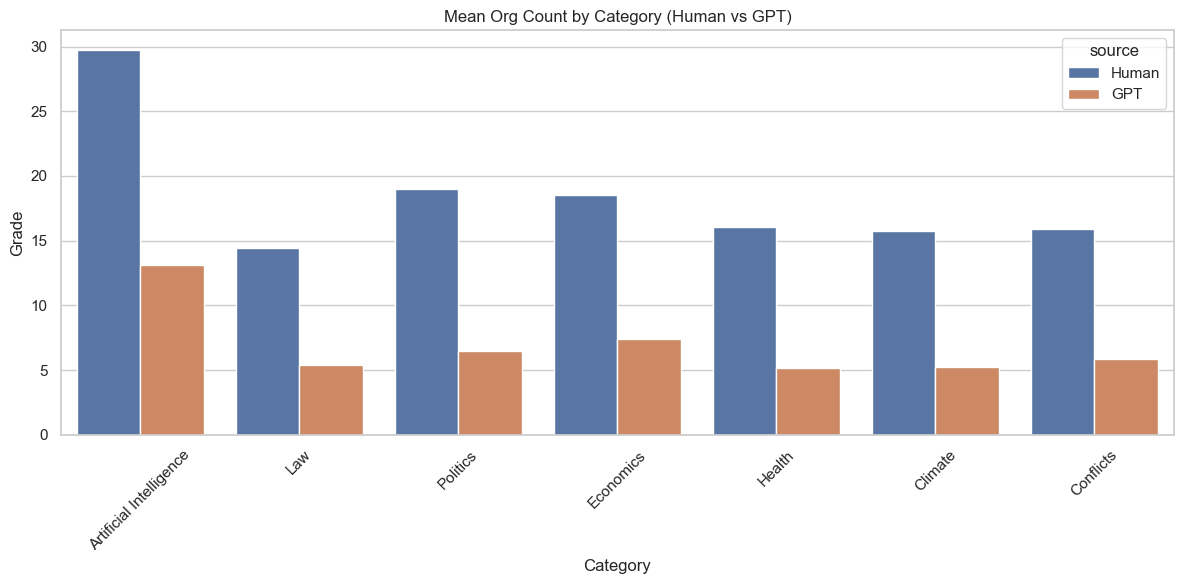

In [294]:
# Melt the DataFrame into long form for analysis
token_melt = df.melt(id_vars="category", 
                     value_vars=["orgs_human", "orgs_gpt"], 
                     var_name="source", 
                     value_name="orgs_count")

# Renaming for clarity
token_melt["source"] = token_melt["source"].map({
    "orgs_human": "Human",
    "orgs_gpt": "GPT"
})

plt.figure(figsize=(12, 6))
sns.barplot(data=token_melt, x="category", y="orgs_count", hue="source", errorbar=("ci", False))
plt.title("Mean Org Count by Category (Human vs GPT)")
plt.ylabel("Grade")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Assess Data Normality

In [168]:
df["sent_diff"] = df["orgs_human"] - df["orgs_gpt"]
stat, p = shapiro(df["sent_diff"])
print(f"Shapiro-Wilk p = {p}")

Shapiro-Wilk p = 8.020126463480379e-35


Find p-values and effect size scores

In [169]:
for cat in df['category'].unique():
    cat_df = df[df['category'] == cat].copy()

    # Drop pairs where the values are equal 
    diffs = cat_df['orgs_human'] - cat_df['orgs_gpt']
    non_zero_diffs = diffs[diffs != 0]

    if len(non_zero_diffs) < 10:
        print(f"{cat}: skipped (not enough non-zero differences)")
        continue

    x = cat_df.loc[non_zero_diffs.index, 'orgs_human']
    y = cat_df.loc[non_zero_diffs.index, 'orgs_gpt']

    stat, p_val = wilcoxon(x, y)

    n = len(non_zero_diffs)
    mean_rank_sum = n * (n + 1) / 4
    std_rank_sum = np.sqrt(n * (n + 1) * (2 * n + 1) / 24)
    z = (stat - mean_rank_sum) / std_rank_sum
    r = abs(z) / np.sqrt(n)

    print(f"{cat:<15} | p = {p_val} | effect size r = {r:.3f}")

Artificial Intelligence | p = 9.587313778388442e-64 | effect size r = 0.808
Law             | p = 1.3949936347189478e-64 | effect size r = 0.798
Politics        | p = 3.9202871297907674e-75 | effect size r = 0.820
Economics       | p = 2.220890285160247e-66 | effect size r = 0.790
Health          | p = 1.510562590123906e-65 | effect size r = 0.833
Climate         | p = 1.2537068249283362e-64 | effect size r = 0.821
Conflicts       | p = 6.078719382685616e-81 | effect size r = 0.797


Examining correlations between title length and organization recognition

In [170]:
df[["title_length", "orgs_human", "orgs_gpt"]].corr()

title_length  orgs_human  orgs_gpt
title_length      1.000000   -0.135200 -0.081134
orgs_human       -0.135200    1.000000  0.594448
orgs_gpt         -0.081134    0.594448  1.000000

##### Locations

Histograms of human and gpt generared articles of location recognition

<Axes: xlabel='locs_gpt', ylabel='Count'>

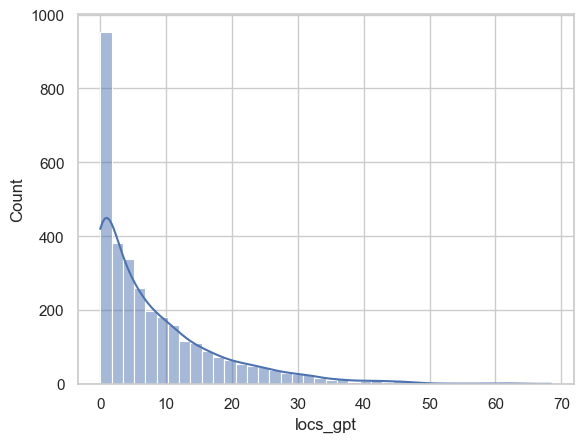

In [171]:
sns.histplot(data=df, x="locs_gpt", bins=40, kde=True)

<Axes: xlabel='locs_human', ylabel='Count'>

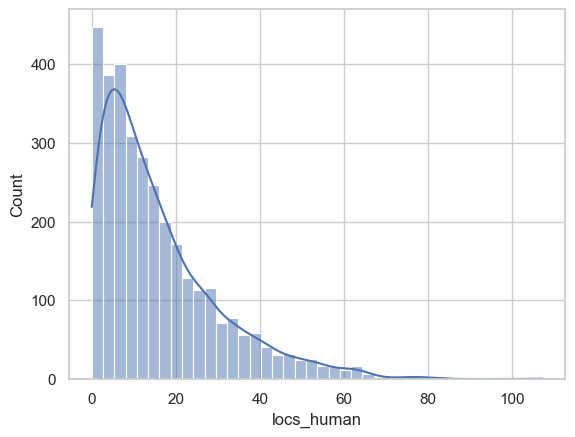

In [172]:
sns.histplot(data=df, x="locs_human", bins=40, kde=True)

Comparing distributions of locations being specified for each category for gpt generated articles

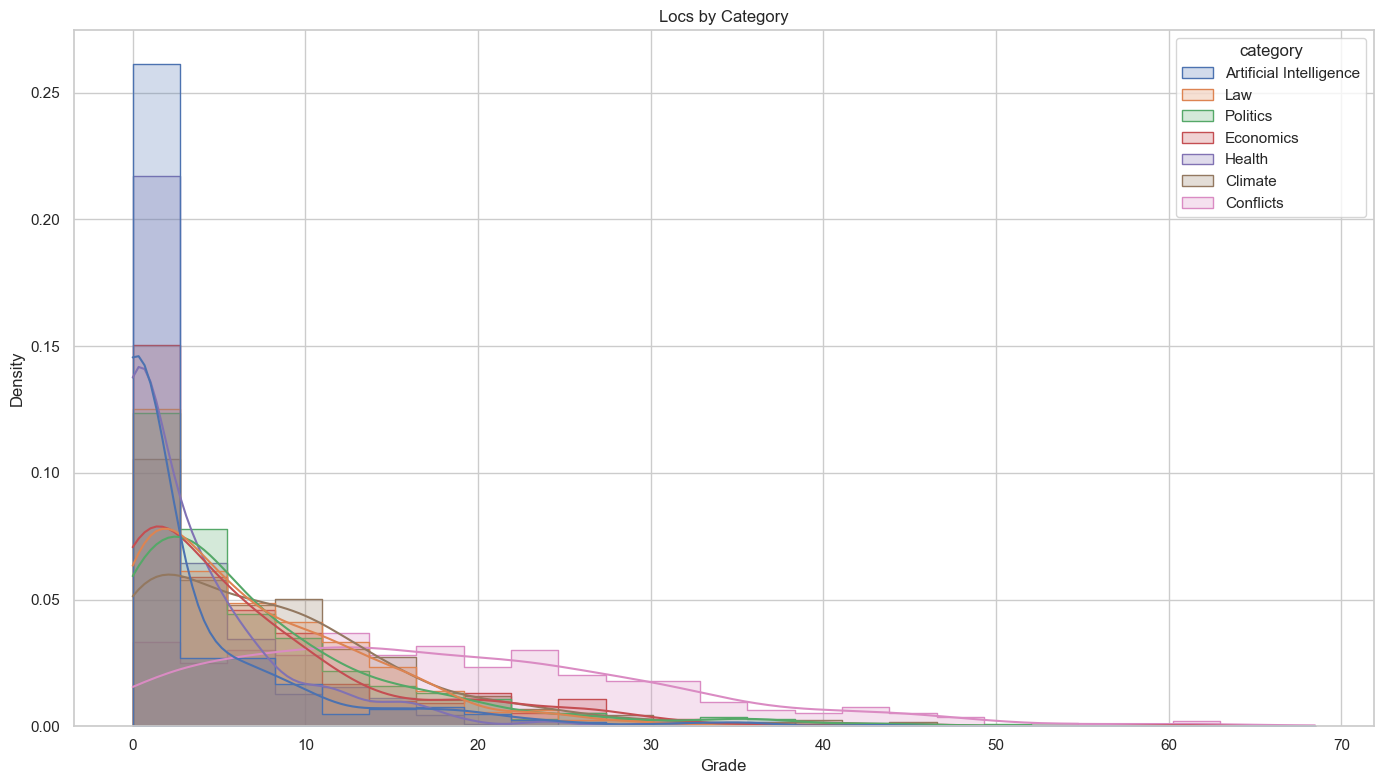

In [173]:
plt.figure(figsize=(14, 8))
sns.histplot(data=gpt_df, x="locs_gpt", hue="category", bins=25, kde=True, element="step", stat="density", common_norm=False)
plt.title("Locs by Category")
plt.xlabel("Grade")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

Comparing mean named entity recognition of locations for human and gpt generated articles by category

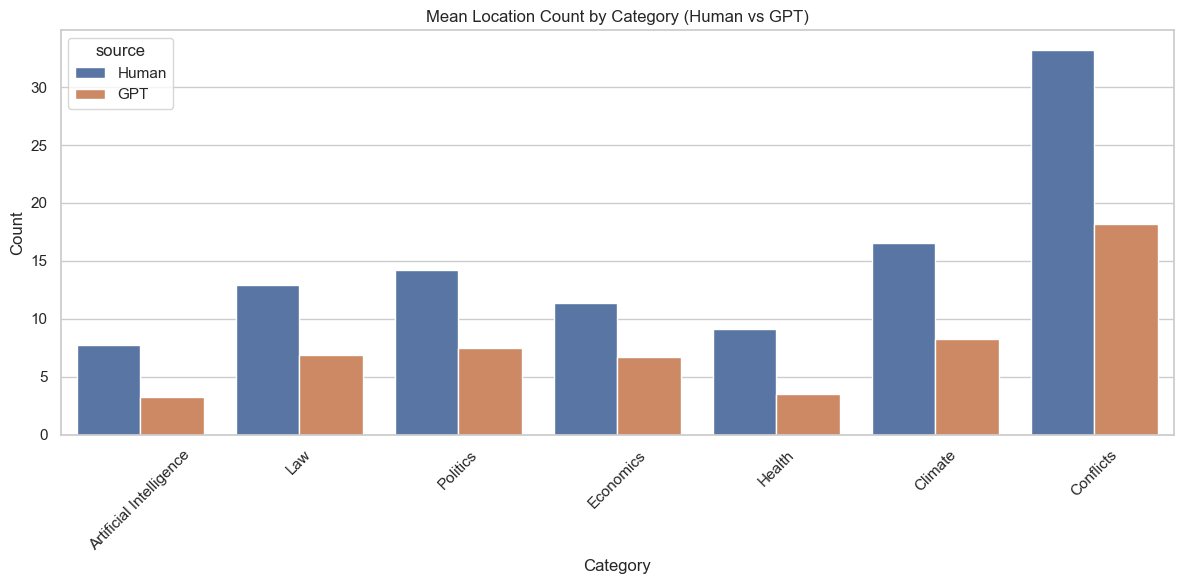

In [295]:
# Melt the DataFrame into long form for analysis
token_melt = df.melt(id_vars="category", 
                     value_vars=["locs_human", "locs_gpt"], 
                     var_name="source", 
                     value_name="locs_count")

# Renaming for clarity
token_melt["source"] = token_melt["source"].map({
    "locs_human": "Human",
    "locs_gpt": "GPT"
})

plt.figure(figsize=(12, 6))
sns.barplot(data=token_melt, x="category", y="locs_count", hue="source", errorbar = ("ci", False))
plt.title("Mean Location Count by Category (Human vs GPT)")
plt.ylabel("Count")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Assessing data normality

In [176]:
df["sent_diff"] = df["locs_human"] - df["locs_gpt"]
stat, p = shapiro(df["sent_diff"])
print(f"Shapiro-Wilk p = {p}")

Shapiro-Wilk p = 3.9803393462568076e-38


Find p-values and effect size scores

In [177]:
for cat in df['category'].unique():
    cat_df = df[df['category'] == cat].copy()

    # Drop pairs where the values are equal
    diffs = cat_df['locs_human'] - cat_df['locs_gpt']
    non_zero_diffs = diffs[diffs != 0]

    if len(non_zero_diffs) < 10:
        print(f"{cat}: skipped (not enough non-zero differences)")
        continue

    x = cat_df.loc[non_zero_diffs.index, 'locs_human']
    y = cat_df.loc[non_zero_diffs.index, 'locs_gpt']

    stat, p_val = wilcoxon(x, y)

    # Calculate Z approximation and effect size r
    n = len(non_zero_diffs)
    mean_rank_sum = n * (n + 1) / 4
    std_rank_sum = np.sqrt(n * (n + 1) * (2 * n + 1) / 24)
    z = (stat - mean_rank_sum) / std_rank_sum
    r = abs(z) / np.sqrt(n)

    print(f"{cat:<15} | p = {p_val} | effect size r = {r:.3f}")

Artificial Intelligence | p = 2.7172870025233248e-42 | effect size r = 0.713
Law             | p = 8.920896254315354e-46 | effect size r = 0.670
Politics        | p = 1.37492701876332e-54 | effect size r = 0.701
Economics       | p = 2.0289436070125936e-28 | effect size r = 0.520
Health          | p = 2.5600154417766548e-48 | effect size r = 0.718
Climate         | p = 4.4840428406100676e-51 | effect size r = 0.736
Conflicts       | p = 5.549603585838076e-76 | effect size r = 0.771


Examining correlations between title length and location recognition

In [178]:
df[["title_length", "locs_human", "locs_gpt"]].corr()

title_length  locs_human  locs_gpt
title_length      1.000000    0.024924  0.062342
locs_human        0.024924    1.000000  0.705376
locs_gpt          0.062342    0.705376  1.000000

##### Persons

Histograms of human and gpt generared articles of person recognition

<Axes: xlabel='persons_gpt', ylabel='Count'>

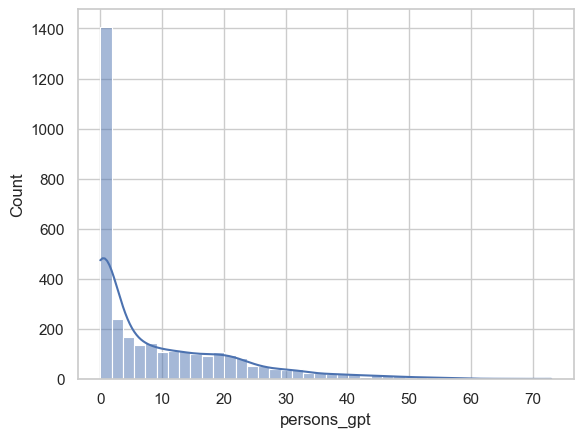

In [179]:
sns.histplot(data=df, x="persons_gpt", bins=40, kde=True)

<Axes: xlabel='persons_human', ylabel='Count'>

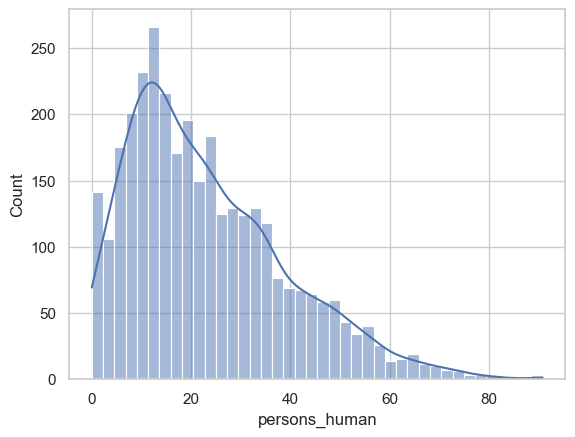

In [180]:
sns.histplot(data=df, x="persons_human", bins=40, kde=True)

Comparing distributions of people being specified for each category for gpt generated articles

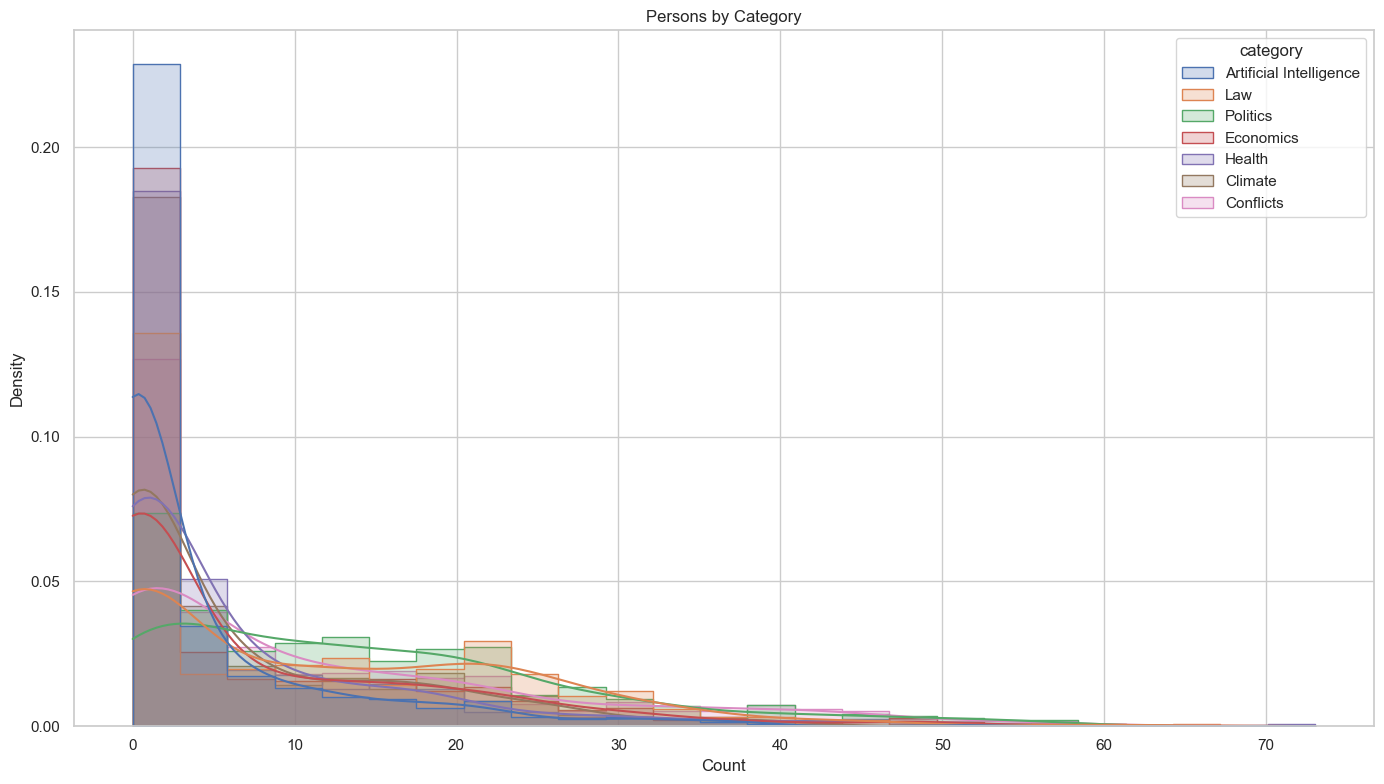

In [181]:
plt.figure(figsize=(14, 8))
sns.histplot(data=gpt_df, x="persons_gpt", hue="category", bins=25, kde=True, element="step", stat="density", common_norm=False)
plt.title("Persons by Category")
plt.xlabel("Count")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

Comparing mean named entity recognition of people for human and gpt generated articles by category

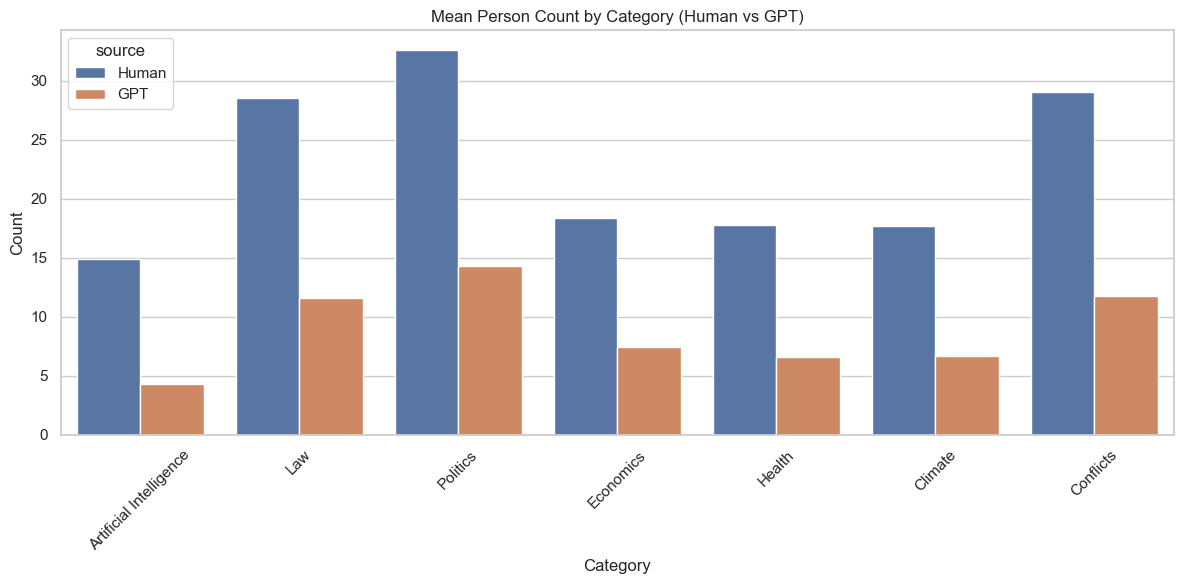

In [296]:
# Melt the DataFrame into long form for analysis
token_melt = df.melt(id_vars="category", 
                     value_vars=["persons_human", "persons_gpt"], 
                     var_name="source", 
                     value_name="persons_count")

token_melt["source"] = token_melt["source"].map({
    "persons_human": "Human",
    "persons_gpt": "GPT"
})

plt.figure(figsize=(12, 6))
sns.barplot(data=token_melt, x="category", y="persons_count", hue="source", errorbar = ("ci", False))
plt.title("Mean Person Count by Category (Human vs GPT)")
plt.ylabel("Count")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Assessing data normality

In [183]:
df["sent_diff"] = df["persons_human"] - df["persons_gpt"]
stat, p = shapiro(df["sent_diff"])
print(f"Shapiro-Wilk p = {p}")

Shapiro-Wilk p = 5.837690327337275e-25


Find p-values and effect size scores

In [184]:
for cat in df['category'].unique():
    cat_df = df[df['category'] == cat].copy()

    # Drop pairs where the values are equal
    diffs = cat_df['persons_human'] - cat_df['persons_gpt']
    non_zero_diffs = diffs[diffs != 0]

    if len(non_zero_diffs) < 10:
        print(f"{cat}: skipped (not enough non-zero differences)")
        continue

    x = cat_df.loc[non_zero_diffs.index, 'persons_human']
    y = cat_df.loc[non_zero_diffs.index, 'persons_gpt']

    stat, p_val = wilcoxon(x, y)

    n = len(non_zero_diffs)
    mean_rank_sum = n * (n + 1) / 4
    std_rank_sum = np.sqrt(n * (n + 1) * (2 * n + 1) / 24)
    z = (stat - mean_rank_sum) / std_rank_sum
    r = abs(z) / np.sqrt(n)

    print(f"{cat:<15} | p = {p_val} | effect size r = {r:.3f}")

Artificial Intelligence | p = 5.9953560545373616e-58 | effect size r = 0.785
Law             | p = 2.3032130666633902e-69 | effect size r = 0.832
Politics        | p = 3.717292360661927e-72 | effect size r = 0.802
Economics       | p = 6.190335250097087e-58 | effect size r = 0.759
Health          | p = 1.5459623329363945e-56 | effect size r = 0.771
Climate         | p = 7.880114825860062e-54 | effect size r = 0.754
Conflicts       | p = 2.2753133257355957e-80 | effect size r = 0.797


Examining correlations between title length and person recognition

In [185]:
df[["title_length", "persons_human", "persons_gpt"]].corr()

title_length  persons_human  persons_gpt
title_length       1.000000       0.023828     0.074922
persons_human      0.023828       1.000000     0.594750
persons_gpt        0.074922       0.594750     1.000000

#### Part of Speech Distribution

##### Contractions

Histograms of human and gpt generared articles of contractions

<Axes: xlabel='contractions_human', ylabel='Count'>

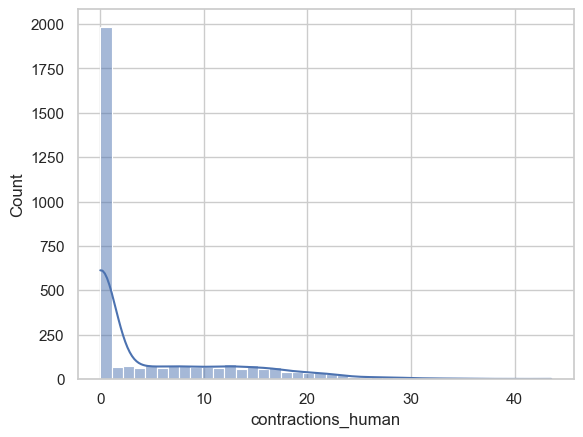

In [186]:
sns.histplot(data=df, x="contractions_human", bins=40, kde=True)

<Axes: xlabel='contractions_gpt', ylabel='Count'>

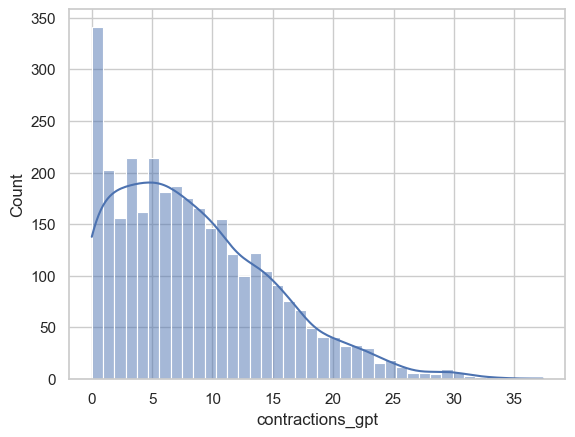

In [187]:
sns.histplot(data=df, x="contractions_gpt", bins=40, kde=True)

Comparing distributions of contraction usage for each category for gpt generated articles

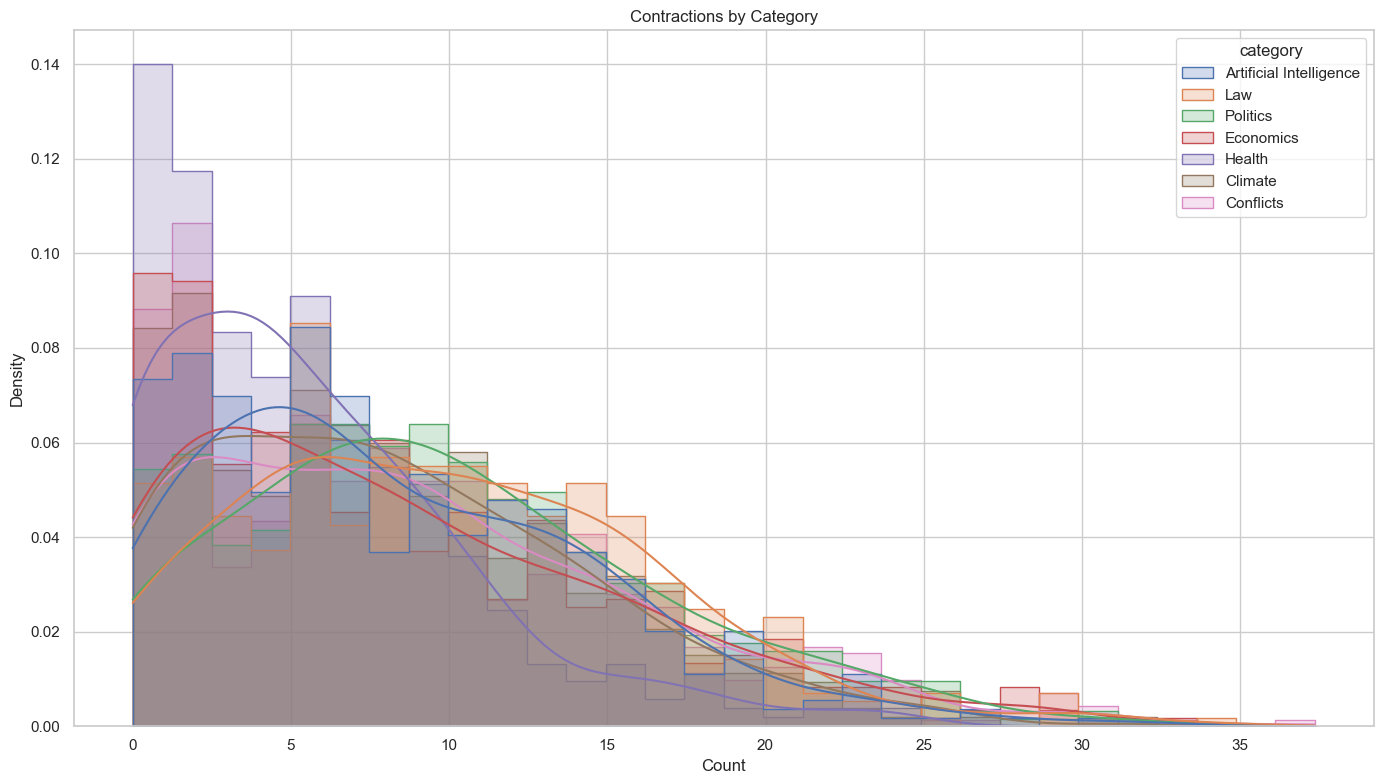

In [188]:
plt.figure(figsize=(14, 8))
sns.histplot(data=gpt_df, x="contractions_gpt", hue="category", bins=30, kde=True, element="step", stat="density", common_norm=False)
plt.title("Contractions by Category")
plt.xlabel("Count")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

Comparing mean contraction usage for human and gpt generated articles by category

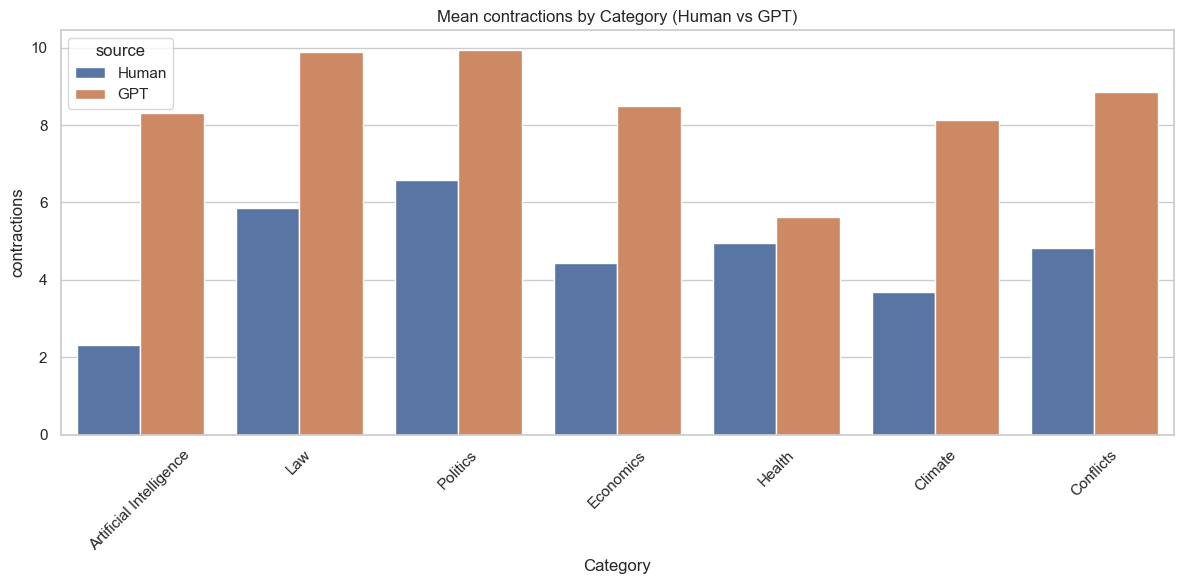

In [297]:
# Melt the DataFrame into long form for analysis
token_melt = df.melt(id_vars="category", 
                     value_vars=["contractions_human", "contractions_gpt"], 
                     var_name="source", 
                     value_name="contractions_count")

# Renaming for clarity
token_melt["source"] = token_melt["source"].map({
    "contractions_human": "Human",
    "contractions_gpt": "GPT"
})

plt.figure(figsize=(12, 6))
sns.barplot(data=token_melt, x="category", y="contractions_count", hue="source", errorbar = ("ci", False))
plt.title("Mean contractions by Category (Human vs GPT)")
plt.ylabel("contractions")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Examining data normality

In [191]:
df["sent_diff"] = df["contractions_human"] - df["contractions_gpt"]
stat, p = shapiro(df["sent_diff"])
print(f"Shapiro-Wilk p = {p}")

Shapiro-Wilk p = 6.605146718608532e-13


Find p-values and effect size scores

In [192]:
for cat in df['category'].unique():
    cat_df = df[df['category'] == cat].copy()

    # Drop pairs where the values are equal
    diffs = cat_df['contractions_human'] - cat_df['contractions_gpt']
    non_zero_diffs = diffs[diffs != 0]

    if len(non_zero_diffs) < 10:
        print(f"{cat}: skipped (not enough non-zero differences)")
        continue

    x = cat_df.loc[non_zero_diffs.index, 'contractions_human']
    y = cat_df.loc[non_zero_diffs.index, 'contractions_gpt']

    stat, p_val = wilcoxon(x, y)

    # Calculate Z approximation and effect size r
    n = len(non_zero_diffs)
    mean_rank_sum = n * (n + 1) / 4
    std_rank_sum = np.sqrt(n * (n + 1) * (2 * n + 1) / 24)
    z = (stat - mean_rank_sum) / std_rank_sum
    r = abs(z) / np.sqrt(n)

    print(f"{cat:<15} | p = {p_val} | effect size r = {r:.3f}")

Artificial Intelligence | p = 3.907293763679265e-36 | effect size r = 0.623
Law             | p = 2.4438761538334735e-16 | effect size r = 0.391
Politics        | p = 1.0367145563565783e-13 | effect size r = 0.336
Economics       | p = 9.454315879133252e-18 | effect size r = 0.409
Health          | p = 0.0026670769081248874 | effect size r = 0.153
Climate         | p = 7.957949404438717e-23 | effect size r = 0.492
Conflicts       | p = 1.6118269492691482e-18 | effect size r = 0.378


Examining correlations between title length and contraction usage

In [ ]:
df[["title_length", "contractions_human", "contractions_gpt"]].corr()

##### First Person Pronouns

Histograms of human and gpt generared articles of first person pronoun usage

<Axes: xlabel='first_pronouns_human', ylabel='Count'>

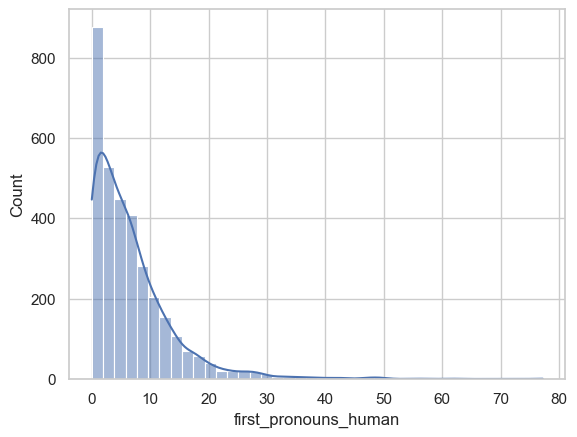

In [193]:
sns.histplot(data=df, x="first_pronouns_human", bins=40, kde=True)

<Axes: xlabel='first_pronouns_gpt', ylabel='Count'>

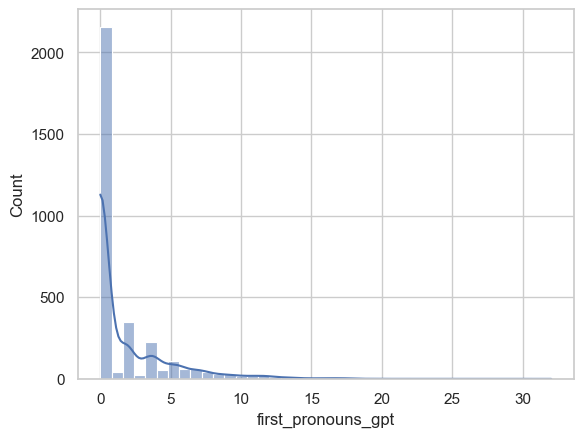

In [194]:
sns.histplot(data=df, x="first_pronouns_gpt", bins=40, kde=True)

Comparing distributions of first person pronoun usage for each category for gpt generated articles

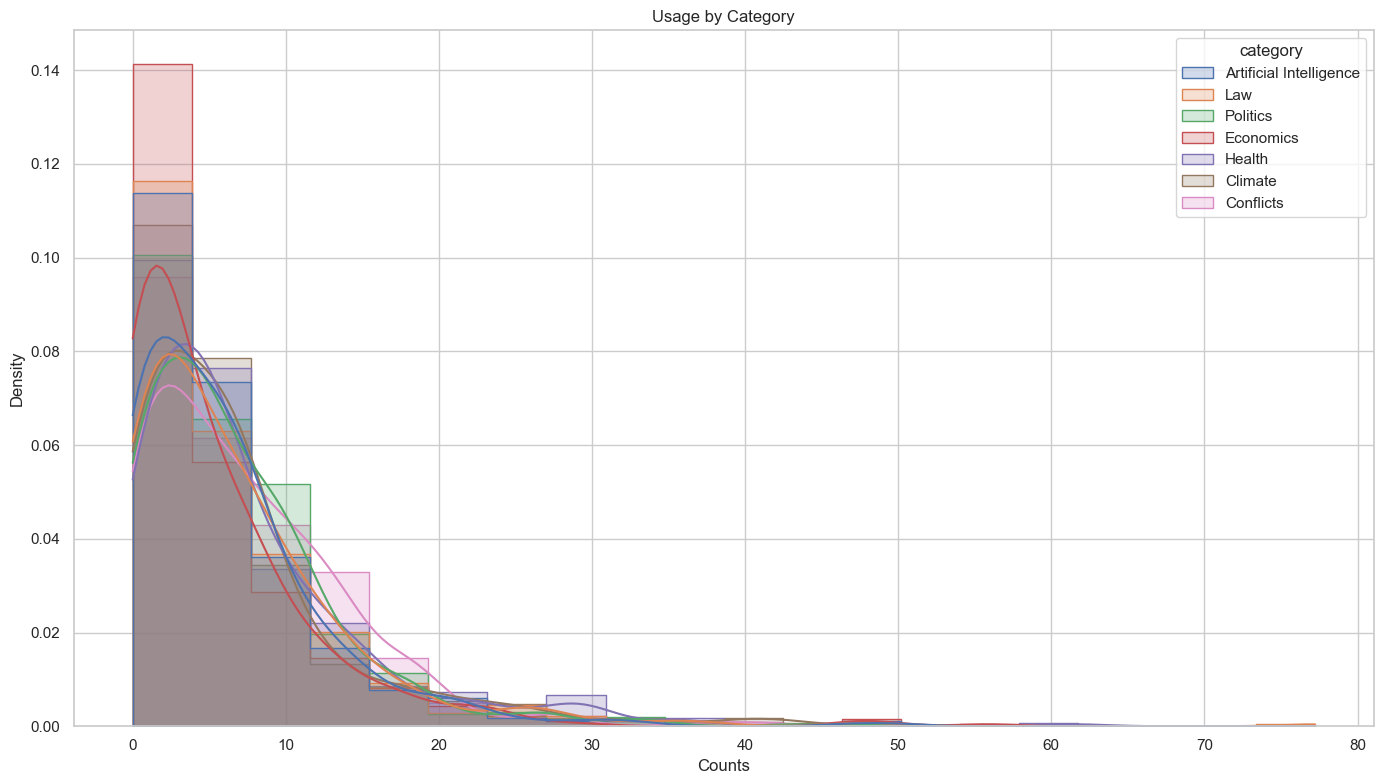

In [196]:
plt.figure(figsize=(14, 8))
sns.histplot(data=gpt_df, x="first_pronouns_human", hue="category", bins=20, kde=True, element="step", stat="density", common_norm=False)
plt.title("Usage by Category")
plt.xlabel("Counts")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

Comparing mean first person pronoun usage for human and gpt generated articles by category

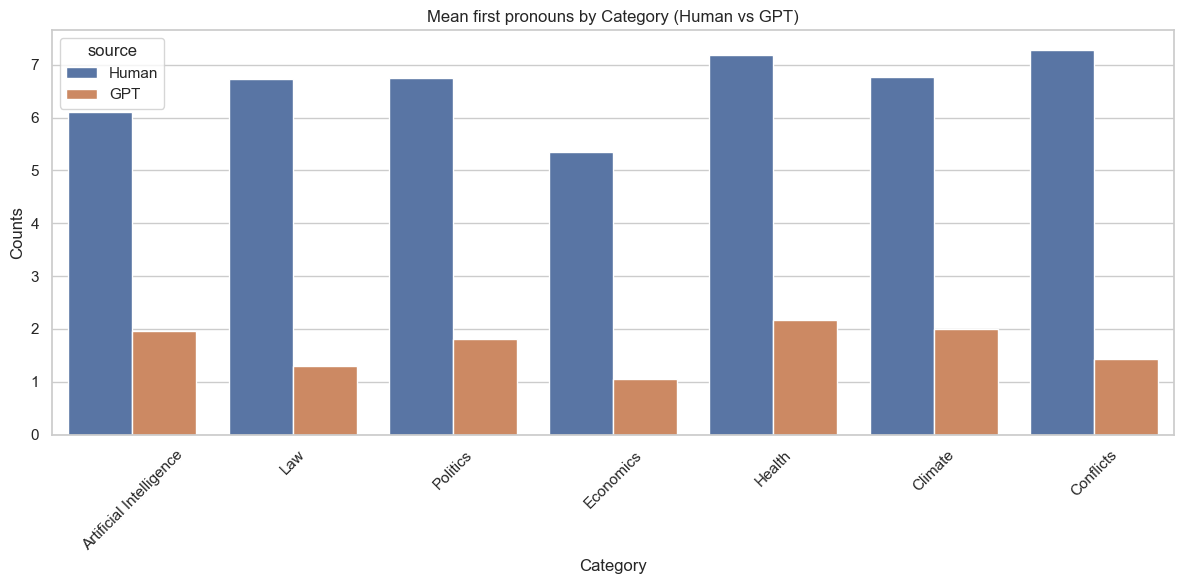

In [299]:
# Melt the DataFrame into long form for analysis
token_melt = df.melt(id_vars="category", 
                     value_vars=["first_pronouns_human", "first_pronouns_gpt"], 
                     var_name="source", 
                     value_name="first_pronouns_count")

# Renaming for clarity
token_melt["source"] = token_melt["source"].map({
    "first_pronouns_human": "Human",
    "first_pronouns_gpt": "GPT"
})

plt.figure(figsize=(12, 6))
sns.barplot(data=token_melt, x="category", y="first_pronouns_count", hue="source", errorbar=("ci", False))
plt.title("Mean first pronouns by Category (Human vs GPT)")
plt.ylabel("Counts")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Examining data normality

In [198]:
df["sent_diff"] = df["first_pronouns_human"] - df["first_pronouns_gpt"]
stat, p = shapiro(df["sent_diff"])
print(f"Shapiro-Wilk p = {p}")

Shapiro-Wilk p = 6.600031910459792e-48


Find p-values and effect size scores

In [199]:
for cat in df['category'].unique():
    cat_df = df[df['category'] == cat].copy()

    # Drop pairs where the values are equal
    diffs = cat_df['first_pronouns_human'] - cat_df['first_pronouns_gpt']
    non_zero_diffs = diffs[diffs != 0]

    if len(non_zero_diffs) < 10:
        print(f"{cat}: skipped (not enough non-zero differences)")
        continue

    x = cat_df.loc[non_zero_diffs.index, 'first_pronouns_human']
    y = cat_df.loc[non_zero_diffs.index, 'first_pronouns_gpt']

    stat, p_val = wilcoxon(x, y)

    n = len(non_zero_diffs)
    mean_rank_sum = n * (n + 1) / 4
    std_rank_sum = np.sqrt(n * (n + 1) * (2 * n + 1) / 24)
    z = (stat - mean_rank_sum) / std_rank_sum
    r = abs(z) / np.sqrt(n)

    print(f"{cat:<15} | p = {p_val} | effect size r = {r:.3f}")

Artificial Intelligence | p = 2.1688966790781586e-36 | effect size r = 0.642
Law             | p = 1.1754913558104316e-53 | effect size r = 0.773
Politics        | p = 2.345490088695425e-50 | effect size r = 0.700
Economics       | p = 1.1481926092587112e-47 | effect size r = 0.738
Health          | p = 2.2681526749597422e-42 | effect size r = 0.680
Climate         | p = 2.200353293701986e-37 | effect size r = 0.644
Conflicts       | p = 2.2705387950724698e-67 | effect size r = 0.760


Examining correlations between title length and first person pronoun usage

In [200]:
df[["title_length", "first_pronouns_human", "first_pronouns_gpt"]].corr()

title_length  first_pronouns_human  first_pronouns_gpt
title_length              1.000000              0.060433            -0.00129
first_pronouns_human      0.060433              1.000000             0.17992
first_pronouns_gpt       -0.001290              0.179920             1.00000

##### Third Person Pronouns

Histograms of human and gpt generared articles of third person pronoun usage

<Axes: xlabel='third_pronouns_human', ylabel='Count'>

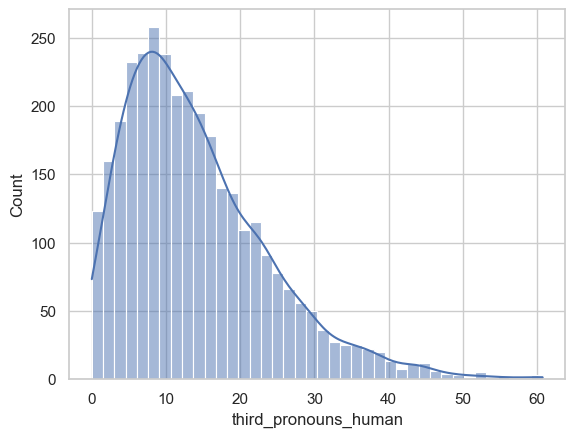

In [201]:
sns.histplot(data=df, x="third_pronouns_human", bins=40, kde=True)

<Axes: xlabel='third_pronouns_gpt', ylabel='Count'>

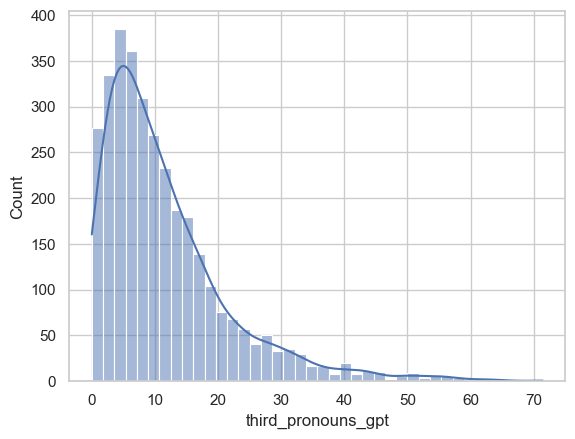

In [202]:
sns.histplot(data=df, x="third_pronouns_gpt", bins=40, kde=True)

Comparing distributions of third person pronoun usage for each category for gpt generated articles

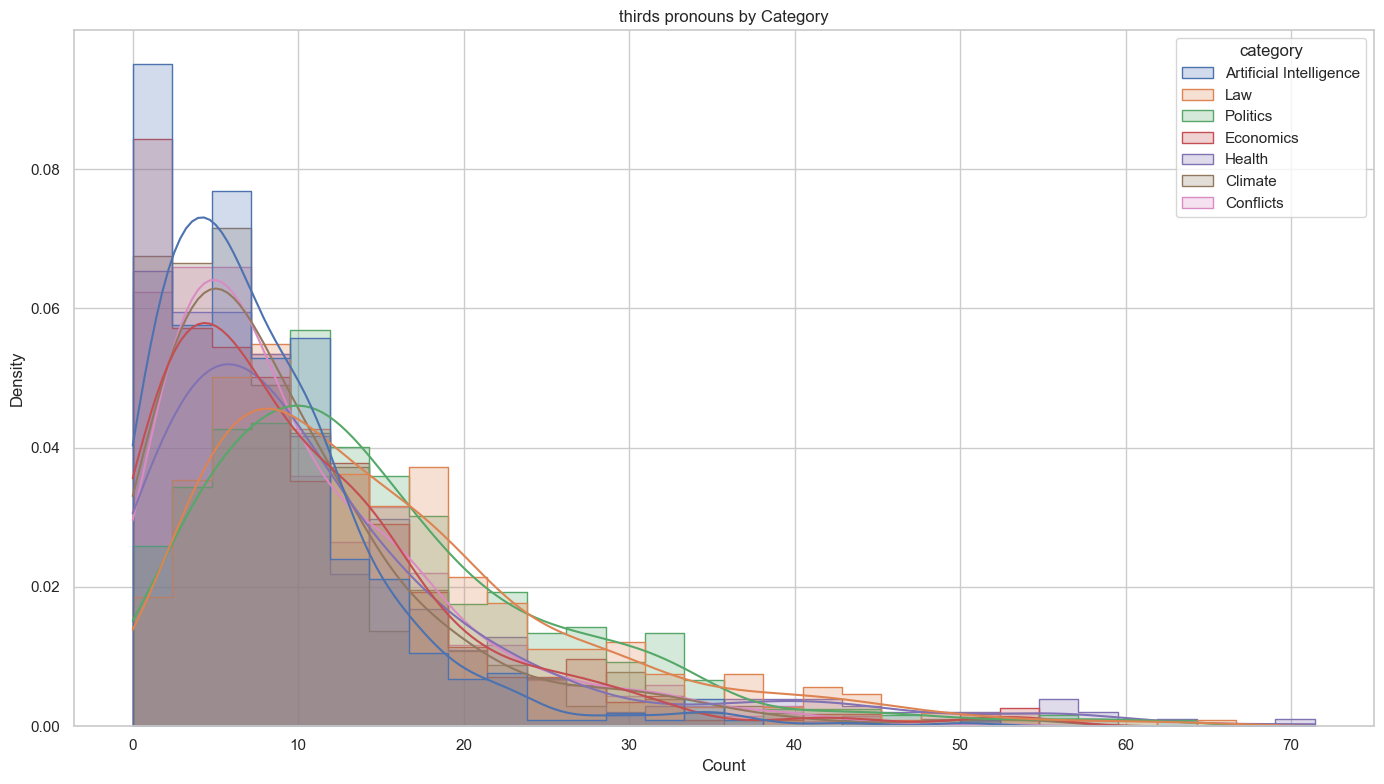

In [203]:
plt.figure(figsize=(14, 8))
sns.histplot(data=gpt_df, x="third_pronouns_gpt", hue="category", bins=30, kde=True, element="step", stat="density", common_norm=False)
plt.title("thirds pronouns by Category")
plt.xlabel("Count")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

Comparing mean third person pronoun usage for human and gpt generated articles by category

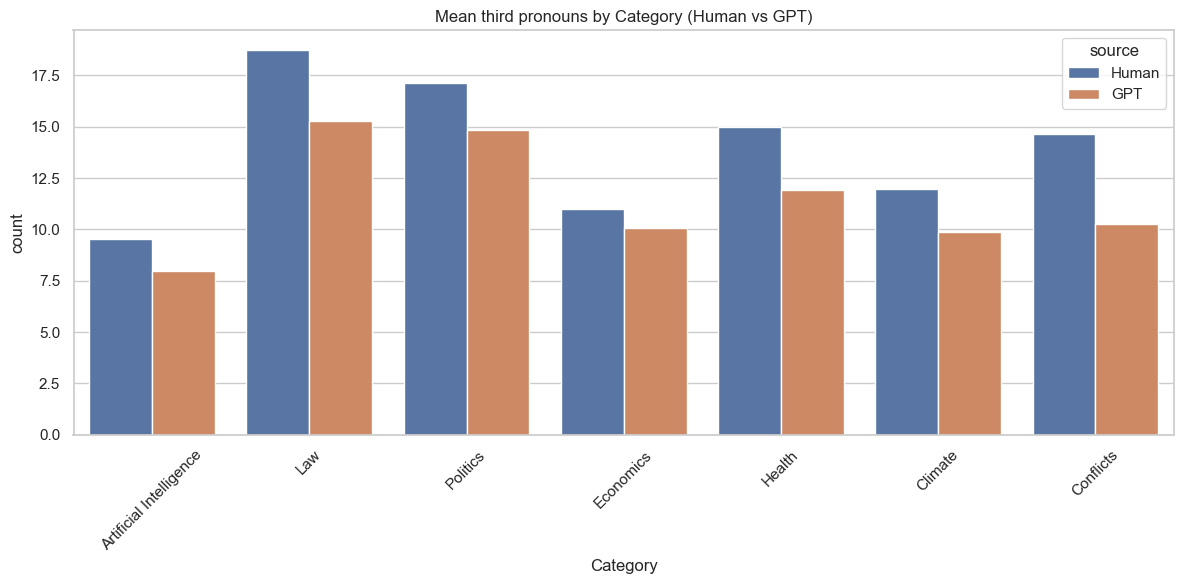

In [300]:
# Melt the DataFrame into long form for analysis
token_melt = df.melt(id_vars="category", 
                     value_vars=["third_pronouns_human", "third_pronouns_gpt"], 
                     var_name="source", 
                     value_name="third_pronouns_count")

# Renaming for clarity
token_melt["source"] = token_melt["source"].map({
    "third_pronouns_human": "Human",
    "third_pronouns_gpt": "GPT"
})

plt.figure(figsize=(12, 6))
sns.barplot(data=token_melt, x="category", y="third_pronouns_count", hue="source", errorbar=("ci", False))
plt.title("Mean third pronouns by Category (Human vs GPT)")
plt.ylabel("count")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Assessing data normality

In [205]:
df["sent_diff"] = df["third_pronouns_human"] - df["third_pronouns_gpt"]
stat, p = shapiro(df["sent_diff"])
print(f"Shapiro-Wilk p = {p}")

Shapiro-Wilk p = 4.379664858048804e-23


Find p-values and effect size scores

In [ ]:
for cat in df['category'].unique():
    cat_df = df[df['category'] == cat].copy()

    # Drop pairs where the values are equal
    diffs = cat_df['third_pronouns_human'] - cat_df['third_pronouns_gpt']
    non_zero_diffs = diffs[diffs != 0]

    if len(non_zero_diffs) < 10:
        print(f"{cat}: skipped (not enough non-zero differences)")
        continue

    x = cat_df.loc[non_zero_diffs.index, 'third_pronouns_human']
    y = cat_df.loc[non_zero_diffs.index, 'third_pronouns_gpt']

    stat, p_val = wilcoxon(x, y)

    n = len(non_zero_diffs)
    mean_rank_sum = n * (n + 1) / 4
    std_rank_sum = np.sqrt(n * (n + 1) * (2 * n + 1) / 24)
    z = (stat - mean_rank_sum) / std_rank_sum
    r = abs(z) / np.sqrt(n)

    print(f"{cat:<15} | p = {p_val} | effect size r = {r:.3f}")

Examining correlations between title length and third person pronoun usage

In [206]:
df[["title_length", "third_pronouns_human", "third_pronouns_gpt"]].corr()

title_length  third_pronouns_human  third_pronouns_gpt
title_length              1.000000              0.048783            0.046276
third_pronouns_human      0.048783              1.000000            0.535500
third_pronouns_gpt        0.046276              0.535500            1.000000

##### Passive Language

Histograms of human and gpt generared articles of passive language usage

<Axes: xlabel='passive_human', ylabel='Count'>

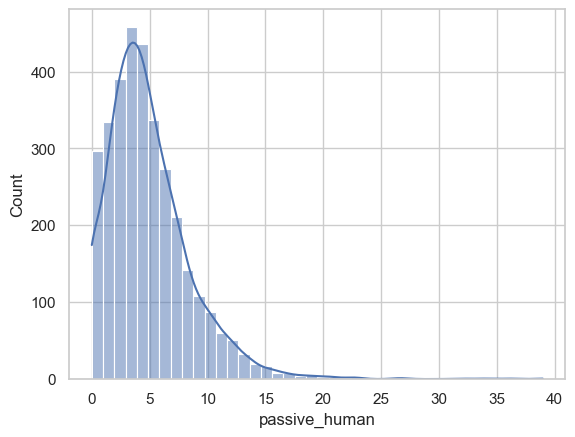

In [207]:
sns.histplot(data=df, x="passive_human", bins=40, kde=True)

<Axes: xlabel='passive_gpt', ylabel='Count'>

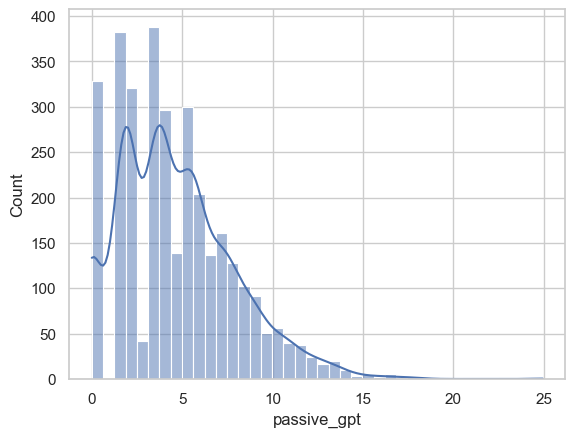

In [208]:
sns.histplot(data=df, x="passive_gpt", bins=40, kde=True)

Comparing distributions of passive language usage for each category for gpt generated articles

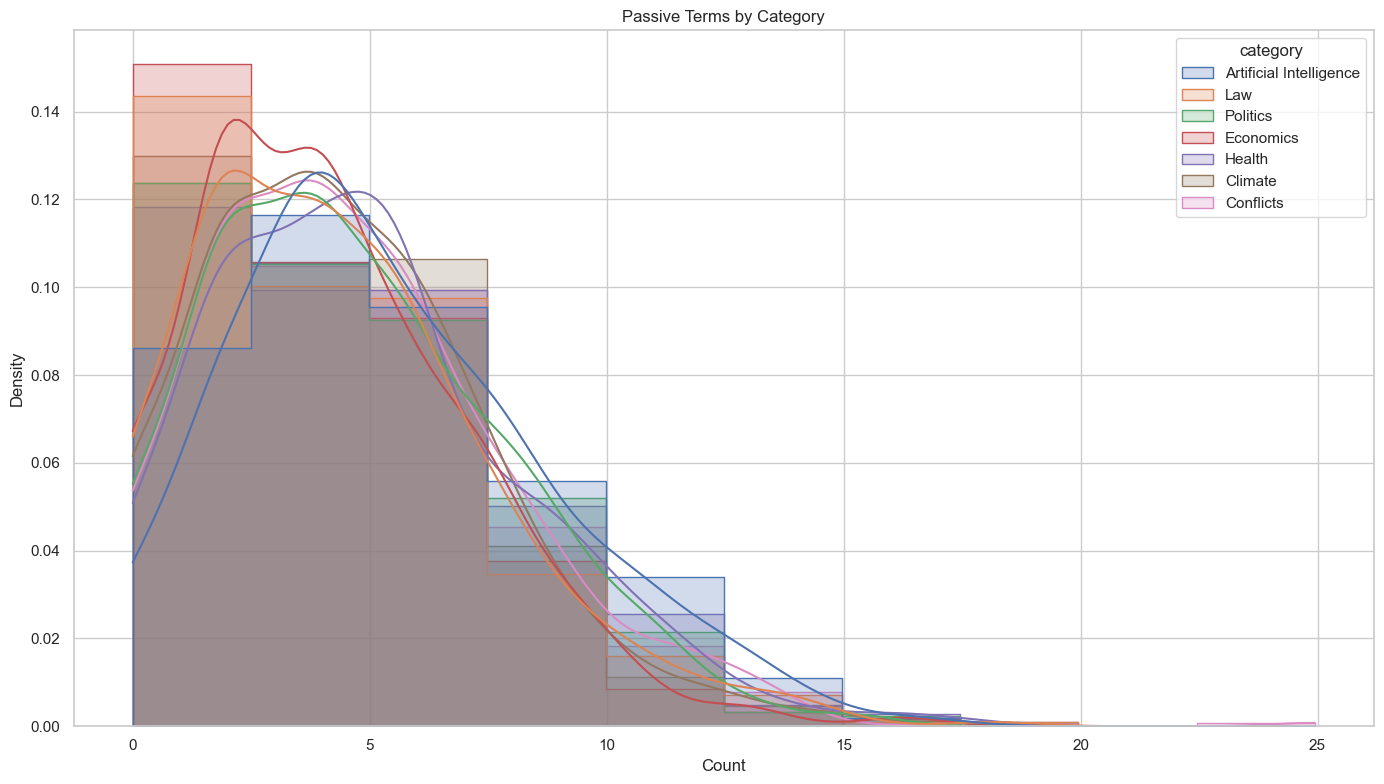

In [211]:
plt.figure(figsize=(14, 8))
sns.histplot(data=gpt_df, x="passive_gpt", hue="category", bins=10, kde=True, element="step", stat="density", common_norm=False)
plt.title("Passive Terms by Category")
plt.xlabel("Count")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

Comparing mean passive language usage for human and gpt generated articles by category

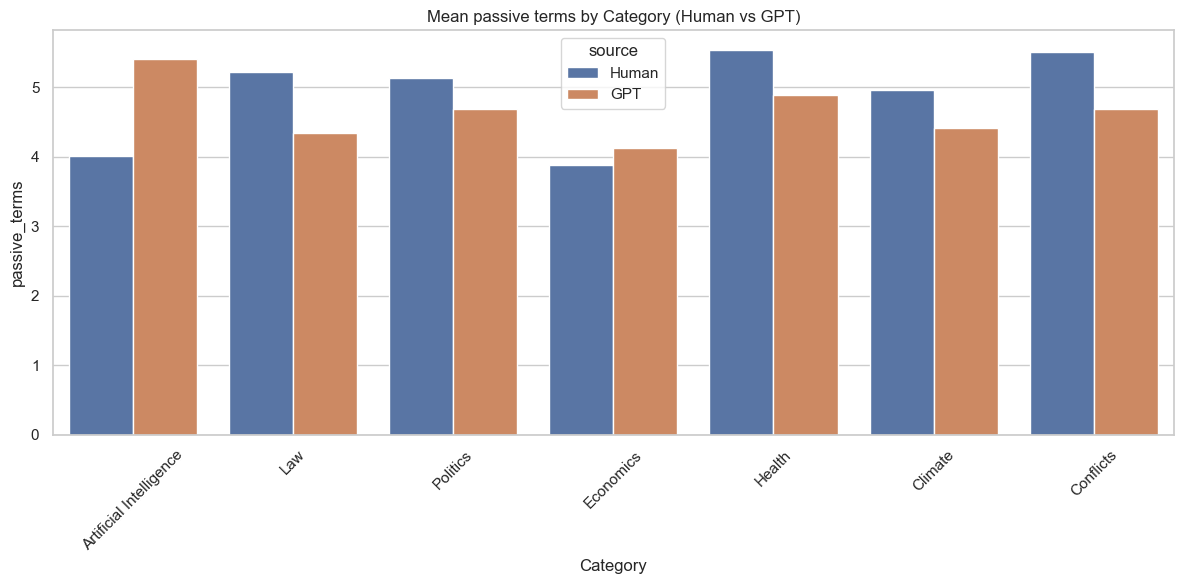

In [301]:
# Melt the DataFrame into long form for analysis
token_melt = df.melt(id_vars="category", 
                     value_vars=["passive_human", "passive_gpt"], 
                     var_name="source", 
                     value_name="passive_count")

# Renaming for clarity
token_melt["source"] = token_melt["source"].map({
    "passive_human": "Human",
    "passive_gpt": "GPT"
})

plt.figure(figsize=(12, 6))
sns.barplot(data=token_melt, x="category", y="passive_count", hue="source", errorbar=("ci", False))
plt.title("Mean passive terms by Category (Human vs GPT)")
plt.ylabel("passive_terms")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Assessing data normality

In [212]:
df["sent_diff"] = df["passive_human"] - df["passive_gpt"]
stat, p = shapiro(df["sent_diff"])
print(f"Shapiro-Wilk p = {p}")

Shapiro-Wilk p = 4.925495693761814e-19


Finding p-values and effect size scores

In [214]:
for cat in df['category'].unique():
    cat_df = df[df['category'] == cat].copy()

    # Drop pairs where the values are equal
    diffs = cat_df['passive_human'] - cat_df['passive_gpt']
    non_zero_diffs = diffs[diffs != 0]

    if len(non_zero_diffs) < 10:
        print(f"{cat}: skipped (not enough non-zero differences)")
        continue

    x = cat_df.loc[non_zero_diffs.index, 'passive_human']
    y = cat_df.loc[non_zero_diffs.index, 'passive_gpt']

    stat, p_val = wilcoxon(x, y)

    # Calculate Z approximation and effect size r
    n = len(non_zero_diffs)
    mean_rank_sum = n * (n + 1) / 4
    std_rank_sum = np.sqrt(n * (n + 1) * (2 * n + 1) / 24)
    z = (stat - mean_rank_sum) / std_rank_sum
    r = abs(z) / np.sqrt(n)

    print(f"{cat:<15} | p = {p_val} | effect size r = {r:.3f}")

Artificial Intelligence | p = 1.1770354259476474e-10 | effect size r = 0.309
Law             | p = 7.598498469002132e-06 | effect size r = 0.211
Politics        | p = 0.02747437350300524 | effect size r = 0.099
Economics       | p = 0.08967178262851985 | effect size r = 0.078
Health          | p = 0.0015460629323472753 | effect size r = 0.154
Climate         | p = 0.04108712996738077 | effect size r = 0.099
Conflicts       | p = 0.005487515140033901 | effect size r = 0.117


Examining correlations between title length and passive language usage

In [215]:
df[["title_length", "passive_human", "passive_gpt"]].corr()

title_length  passive_human  passive_gpt
title_length       1.000000      -0.005531    -0.048033
passive_human     -0.005531       1.000000     0.181876
passive_gpt       -0.048033       0.181876     1.000000

##### Noun percentage

Histograms of human and gpt generared articles of percentage of nouns used

<Axes: xlabel='noun_pct_human', ylabel='Count'>

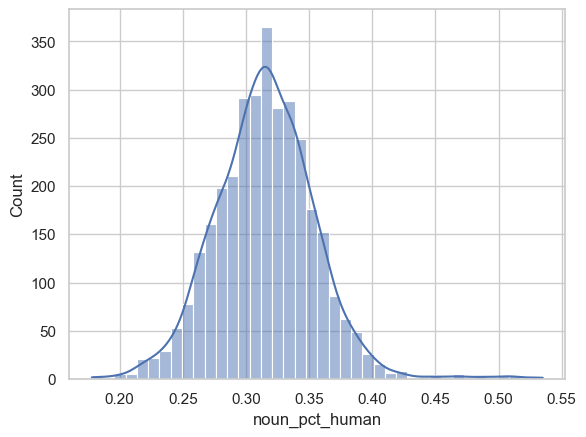

In [218]:
sns.histplot(data=df, x="noun_pct_human", bins=40, kde=True)

<Axes: xlabel='noun_pct_gpt', ylabel='Count'>

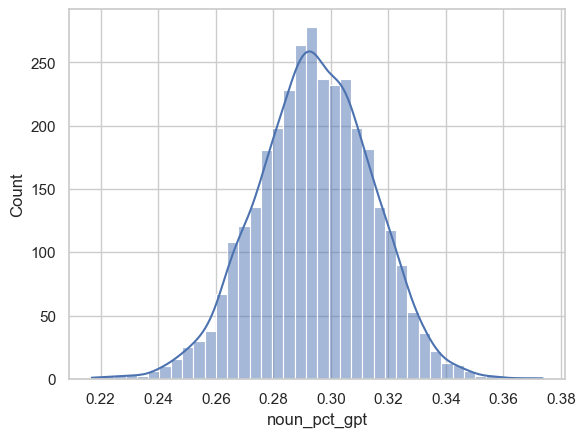

In [219]:
sns.histplot(data=df, x="noun_pct_gpt", bins=40, kde=True)

Comparing distributions of noun usage for each category for gpt generated articles

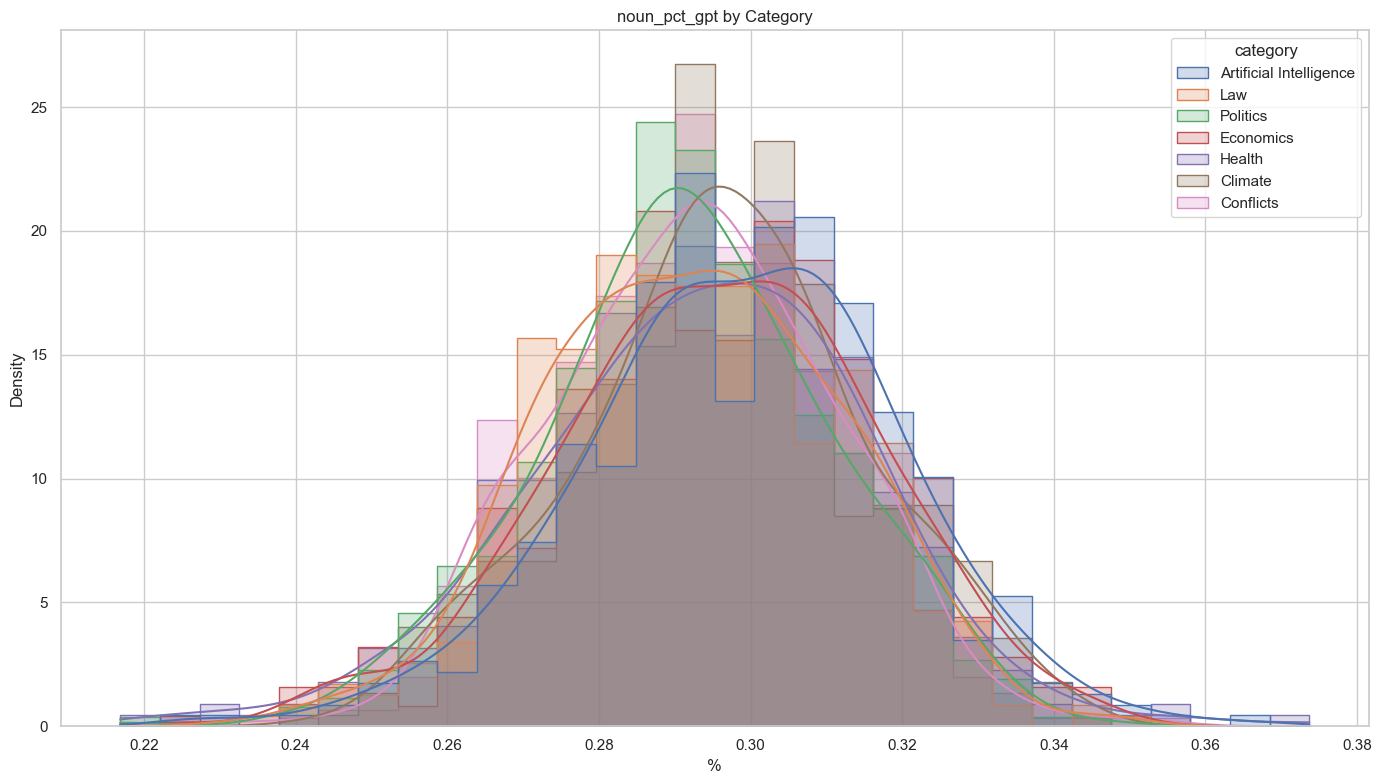

In [220]:
plt.figure(figsize=(14, 8))
sns.histplot(data=gpt_df, x="noun_pct_gpt", hue="category", bins=30, kde=True, element="step", stat="density", common_norm=False)
plt.title("noun_pct_gpt by Category")
plt.xlabel("%")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

Comparing distributions of noun usage for each category for gpt generated articles

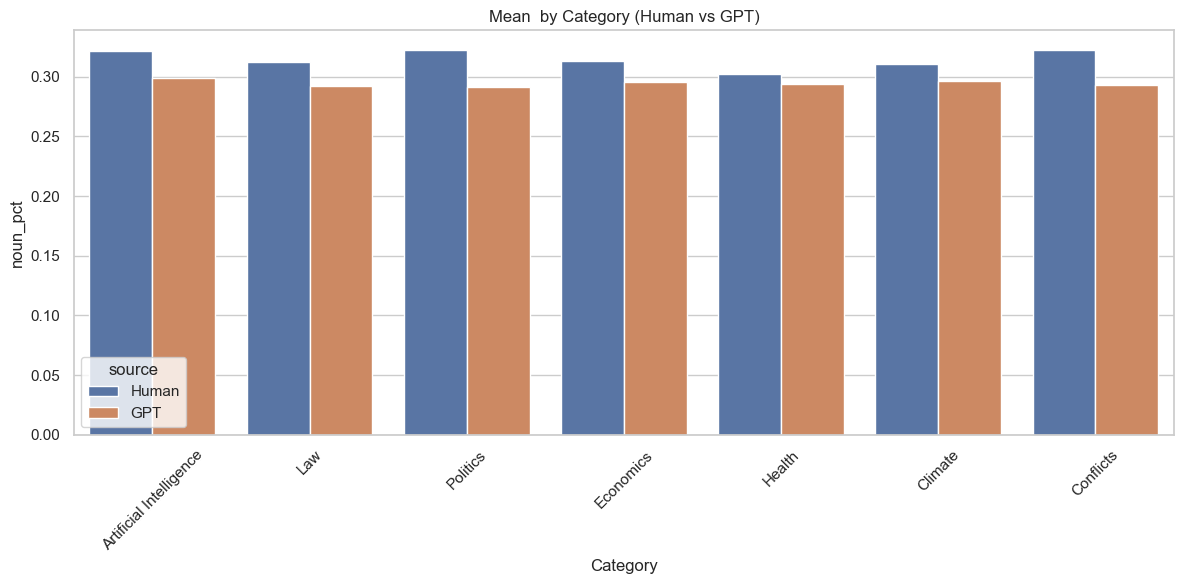

In [302]:
# Melt the DataFrame into long form for analysis
token_melt = df.melt(id_vars="category", 
                     value_vars=["noun_pct_human", "noun_pct_gpt"], 
                     var_name="source", 
                     value_name="noun_pct_count")

# Renaming for clarity
token_melt["source"] = token_melt["source"].map({
    "noun_pct_human": "Human",
    "noun_pct_gpt": "GPT"
})

plt.figure(figsize=(12, 6))
sns.barplot(data=token_melt, x="category", y="noun_pct_count", hue="source", errorbar=("ci", False))
plt.title("Mean  by Category (Human vs GPT)")
plt.ylabel("noun_pct")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Assessing data normality

In [222]:
df["sent_diff"] = df["noun_pct_human"] - df["noun_pct_gpt"]
stat, p = shapiro(df["sent_diff"])
print(f"Shapiro-Wilk p = {p}")

Shapiro-Wilk p = 2.4805256941312685e-18


Find p-values and effect size scores

In [223]:
for cat in df['category'].unique():
    cat_df = df[df['category'] == cat].copy()

    # Drop pairs where the values are equal
    diffs = cat_df['noun_pct_human'] - cat_df['noun_pct_gpt']
    non_zero_diffs = diffs[diffs != 0]

    if len(non_zero_diffs) < 10:
        print(f"{cat}: skipped (not enough non-zero differences)")
        continue

    x = cat_df.loc[non_zero_diffs.index, 'noun_pct_human']
    y = cat_df.loc[non_zero_diffs.index, 'noun_pct_gpt']

    stat, p_val = wilcoxon(x, y)

    # Calculate Z approximation and effect size r
    n = len(non_zero_diffs)
    mean_rank_sum = n * (n + 1) / 4
    std_rank_sum = np.sqrt(n * (n + 1) * (2 * n + 1) / 24)
    z = (stat - mean_rank_sum) / std_rank_sum
    r = abs(z) / np.sqrt(n)

    print(f"{cat:<15} | p = {p_val} | effect size r = {r:.3f}")

Artificial Intelligence | p = 1.8565634924599078e-19 | effect size r = 0.432
Law             | p = 8.190072607964434e-26 | effect size r = 0.494
Politics        | p = 1.8786356976039218e-45 | effect size r = 0.632
Economics       | p = 1.6552328990445993e-21 | effect size r = 0.436
Health          | p = 3.688409624795468e-06 | effect size r = 0.225
Climate         | p = 3.227265942462794e-15 | effect size r = 0.381
Conflicts       | p = 3.8150879425861675e-55 | effect size r = 0.653


Examining correlations between title length and noun percent usage

In [224]:
df[["title_length", "noun_pct_human", "noun_pct_gpt"]].corr()

title_length  noun_pct_human  noun_pct_gpt
title_length        1.000000       -0.082999     -0.086570
noun_pct_human     -0.082999        1.000000      0.267177
noun_pct_gpt       -0.086570        0.267177      1.000000

#### Verb percent

Histograms of human and gpt generared articles of percentage of verbs used

<Axes: xlabel='verb_pct_human', ylabel='Count'>

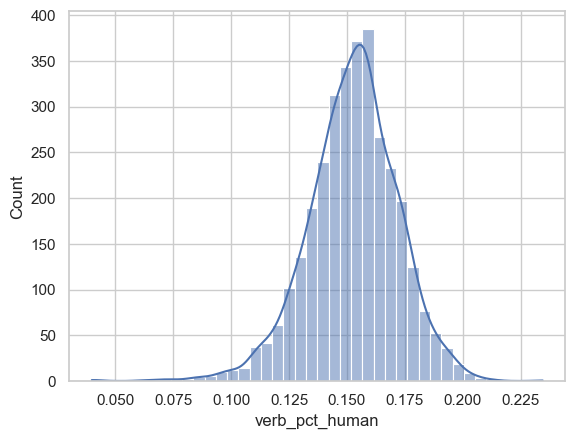

In [226]:
sns.histplot(data=df, x="verb_pct_human", bins=40, kde=True)

<Axes: xlabel='verb_pct_gpt', ylabel='Count'>

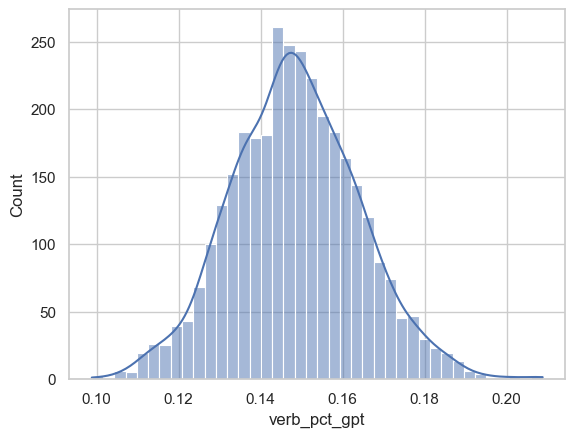

In [227]:
sns.histplot(data=df, x="verb_pct_gpt", bins=40, kde=True)

Comparing distributions of verb usage for each category for gpt generated articles

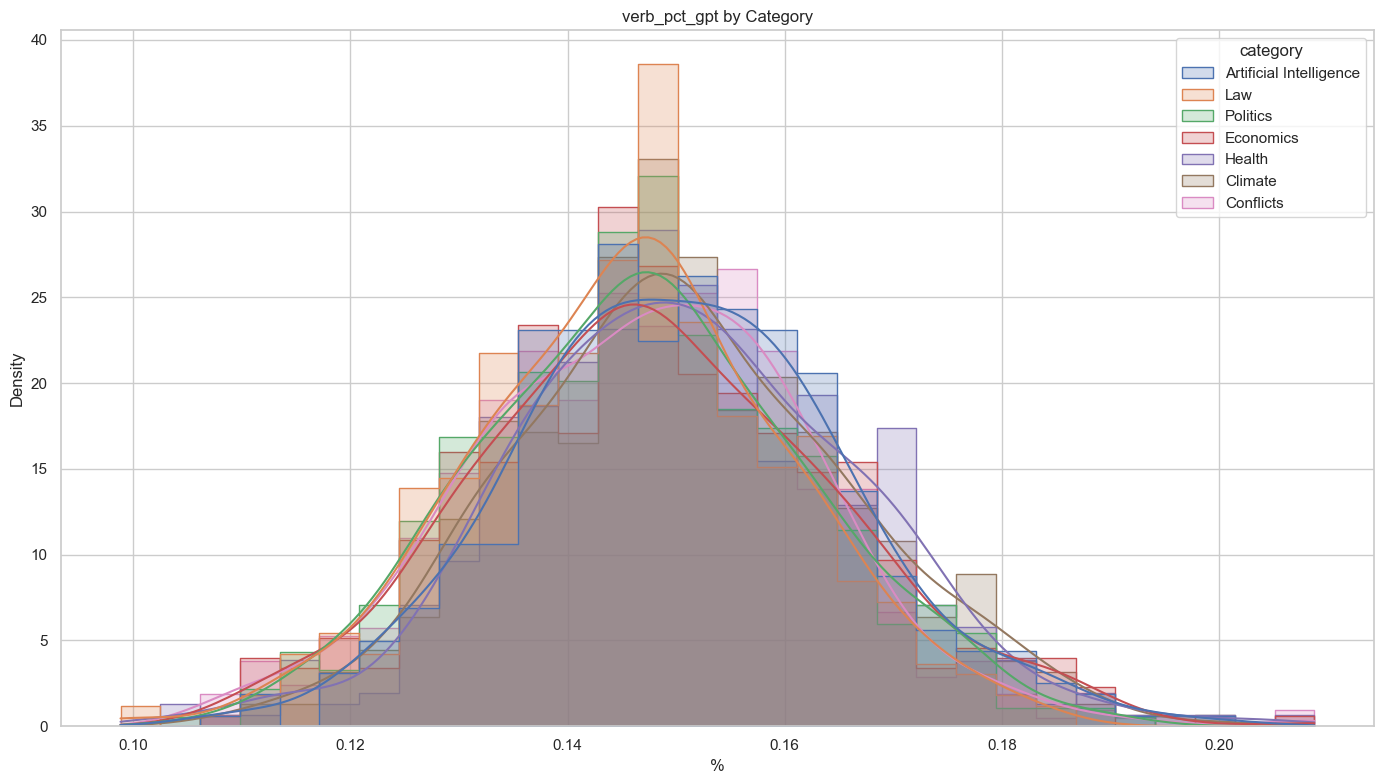

In [280]:
plt.figure(figsize=(14, 8))
sns.histplot(data=gpt_df, x="verb_pct_gpt", hue="category", bins=30, kde=True, element="step", stat="density", common_norm=False)
plt.title("verb_pct_gpt by Category")
plt.xlabel("%")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

Comparing distributions of verb usage for each category for gpt generated articles

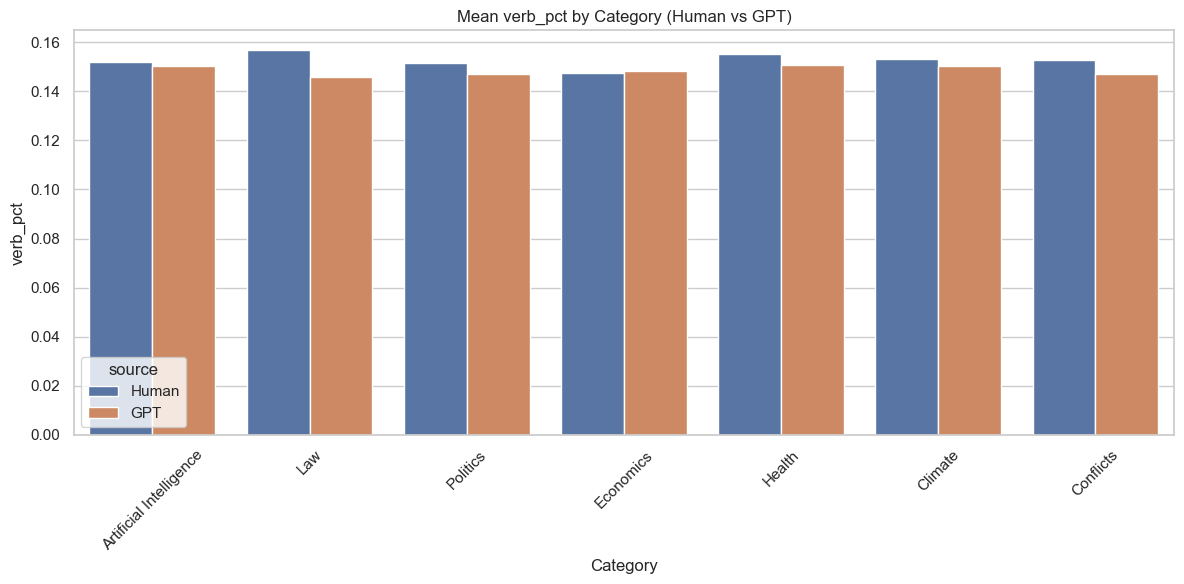

In [303]:
# Melt the DataFrame into long form for analysis
token_melt = df.melt(id_vars="category", 
                     value_vars=["verb_pct_human", "verb_pct_gpt"], 
                     var_name="source", 
                     value_name="verb_pct_count")

# Renaming for clarity
token_melt["source"] = token_melt["source"].map({
    "verb_pct_human": "Human",
    "verb_pct_gpt": "GPT"
})

plt.figure(figsize=(12, 6))
sns.barplot(data=token_melt, x="category", y="verb_pct_count", hue="source", errorbar=("ci", False))
plt.title("Mean verb_pct by Category (Human vs GPT)")
plt.ylabel("verb_pct")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Assessing data normality

In [230]:
df["sent_diff"] = df["verb_pct_human"] - df["verb_pct_gpt"]
stat, p = shapiro(df["sent_diff"])
print(f"Shapiro-Wilk p = {p}")

Shapiro-Wilk p = 2.9041443643854156e-08


Find p-values and effect size scores

In [231]:
for cat in df['category'].unique():
    cat_df = df[df['category'] == cat].copy()

    # Drop pairs where the values are equal
    diffs = cat_df['verb_pct_human'] - cat_df['verb_pct_gpt']
    non_zero_diffs = diffs[diffs != 0]

    if len(non_zero_diffs) < 10:
        print(f"{cat}: skipped (not enough non-zero differences)")
        continue

    x = cat_df.loc[non_zero_diffs.index, 'verb_pct_human']
    y = cat_df.loc[non_zero_diffs.index, 'verb_pct_gpt']

    stat, p_val = wilcoxon(x, y)

    # Calculate Z approximation and effect size r
    n = len(non_zero_diffs)
    mean_rank_sum = n * (n + 1) / 4
    std_rank_sum = np.sqrt(n * (n + 1) * (2 * n + 1) / 24)
    z = (stat - mean_rank_sum) / std_rank_sum
    r = abs(z) / np.sqrt(n)

    print(f"{cat:<15} | p = {p_val} | effect size r = {r:.3f}")

Artificial Intelligence | p = 0.037984259646829846 | effect size r = 0.099
Law             | p = 2.2745857143654945e-26 | effect size r = 0.500
Politics        | p = 1.332631171579582e-06 | effect size r = 0.216
Economics       | p = 0.8565473525725551 | effect size r = 0.008
Health          | p = 3.452960458821165e-05 | effect size r = 0.201
Climate         | p = 0.01729405911038344 | effect size r = 0.115
Conflicts       | p = 8.153983661182429e-11 | effect size r = 0.271


Examining correlations between title length and verb percent usage

In [232]:
df[["title_length", "verb_pct_human", "verb_pct_gpt"]].corr()

title_length  verb_pct_human  verb_pct_gpt
title_length        1.000000        0.048814     -0.037071
verb_pct_human      0.048814        1.000000      0.167833
verb_pct_gpt       -0.037071        0.167833      1.000000

##### Adjective percent

Histograms of human and gpt generared articles of percentage of adjectives used

<Axes: xlabel='adj_pct_human', ylabel='Count'>

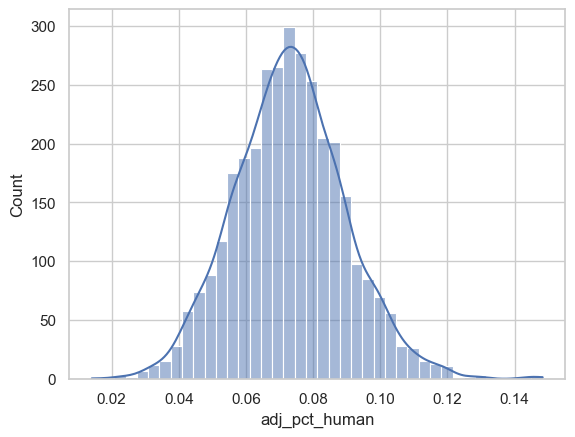

In [233]:
sns.histplot(data=df, x="adj_pct_human", bins=40, kde=True)

<Axes: xlabel='adj_pct_gpt', ylabel='Count'>

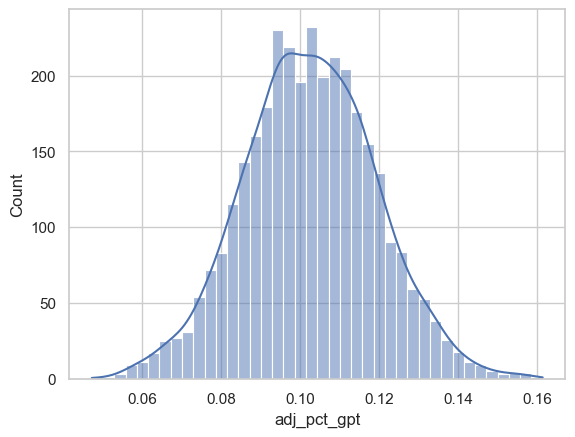

In [234]:
sns.histplot(data=df, x="adj_pct_gpt", bins=40, kde=True)

Comparing distributions of adjective usage for each category for gpt generated articles

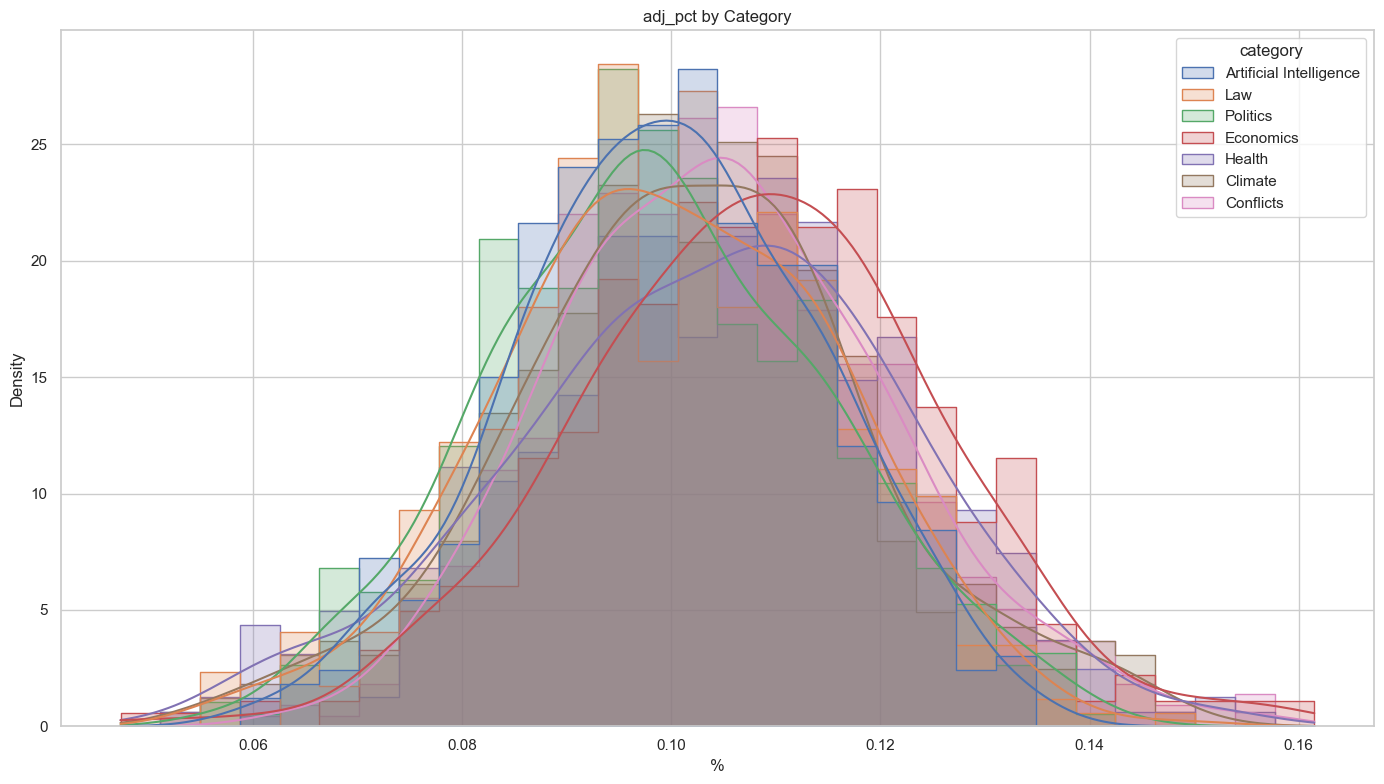

In [235]:
plt.figure(figsize=(14, 8))
sns.histplot(data=gpt_df, x="adj_pct_gpt", hue="category", bins=30, kde=True, element="step", stat="density", common_norm=False)
plt.title("adj_pct by Category")
plt.xlabel("%")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

Comparing distributions of adjective usage for each category for gpt generated articles

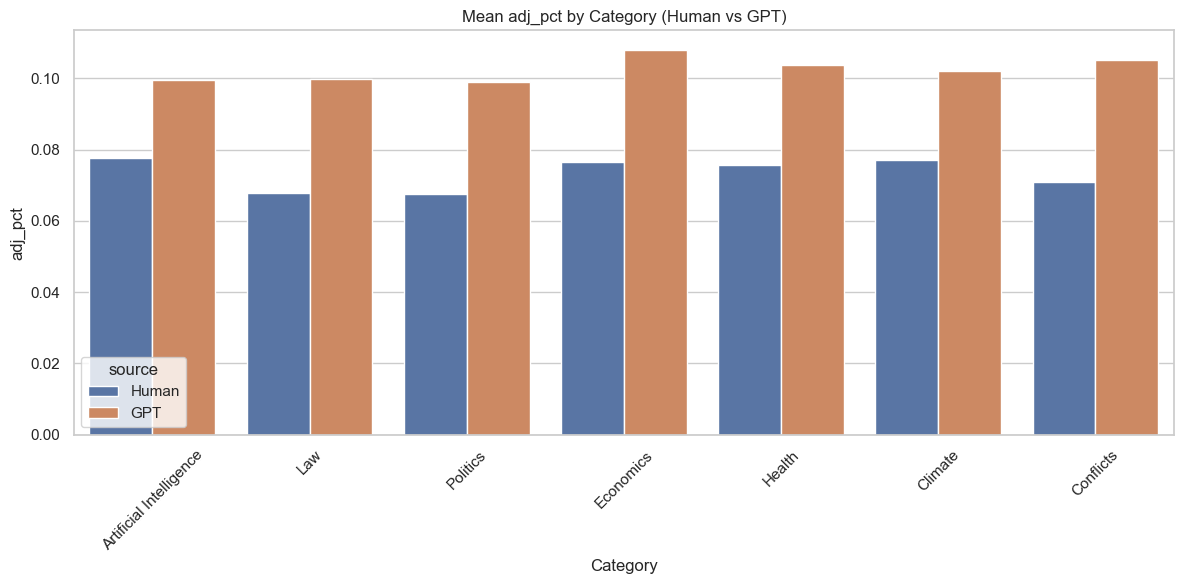

In [304]:
# Melt the DataFrame into long form for analysis
token_melt = df.melt(id_vars="category", 
                     value_vars=["adj_pct_human", "adj_pct_gpt"], 
                     var_name="source", 
                     value_name="adj_pct_count")

# Renaming for clarity
token_melt["source"] = token_melt["source"].map({
    "adj_pct_human": "Human",
    "adj_pct_gpt": "GPT"
})

plt.figure(figsize=(12, 6))
sns.barplot(data=token_melt, x="category", y="adj_pct_count", hue="source", errorbar=("ci", False))
plt.title("Mean adj_pct by Category (Human vs GPT)")
plt.ylabel("adj_pct")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Assessing data normality

In [237]:
df["sent_diff"] = df["adj_pct_human"] - df["adj_pct_gpt"]
stat, p = shapiro(df["sent_diff"])
print(f"Shapiro-Wilk p = {p}")

Shapiro-Wilk p = 0.015436749177056876


Find p-values and effect size scores

In [238]:
for cat in df['category'].unique():
    cat_df = df[df['category'] == cat].copy()

    # Drop pairs where the values are equal
    diffs = cat_df['adj_pct_human'] - cat_df['adj_pct_gpt']
    non_zero_diffs = diffs[diffs != 0]

    if len(non_zero_diffs) < 10:
        print(f"{cat}: skipped (not enough non-zero differences)")
        continue

    x = cat_df.loc[non_zero_diffs.index, 'adj_pct_human']
    y = cat_df.loc[non_zero_diffs.index, 'adj_pct_gpt']

    stat, p_val = wilcoxon(x, y)

    # Calculate Z approximation and effect size r
    n = len(non_zero_diffs)
    mean_rank_sum = n * (n + 1) / 4
    std_rank_sum = np.sqrt(n * (n + 1) * (2 * n + 1) / 24)
    z = (stat - mean_rank_sum) / std_rank_sum
    r = abs(z) / np.sqrt(n)

    print(f"{cat:<15} | p = {p_val} | effect size r = {r:.3f}")

Artificial Intelligence | p = 3.282681105811818e-59 | effect size r = 0.776
Law             | p = 2.6180895314354858e-73 | effect size r = 0.852
Politics        | p = 9.410511878675016e-80 | effect size r = 0.844
Economics       | p = 4.321362566230946e-75 | effect size r = 0.839
Health          | p = 1.4989219992434328e-66 | effect size r = 0.837
Climate         | p = 3.077996628406554e-61 | effect size r = 0.797
Conflicts       | p = 3.570547272899022e-93 | effect size r = 0.855


Examining correlations between title length and adjective percent usage

In [239]:
df[["title_length", "adj_pct_human", "adj_pct_gpt"]].corr()

title_length  adj_pct_human  adj_pct_gpt
title_length       1.000000       0.086937     0.027152
adj_pct_human      0.086937       1.000000     0.297567
adj_pct_gpt        0.027152       0.297567     1.000000

In [240]:
df.describe()

token_count_ai   token_count   sent_count  sent_count_ai  \
count     3295.000000   3295.000000  3295.000000    3295.000000   
mean       546.997876   1089.027011    36.741123      20.602731   
std         55.532278    998.855347    38.506137       3.025342   
min        363.000000    130.000000     3.000000      13.000000   
25%        511.500000    642.000000    20.000000      19.000000   
50%        545.000000    904.000000    29.000000      20.000000   
75%        581.000000   1258.000000    43.000000      22.000000   
max        863.000000  18511.000000   794.000000      46.000000   

       tokens_per_sentence  tokens_per_sentence_ai     fk_grade  gunning_fog  \
count          3295.000000             3295.000000  3295.000000  3295.000000   
mean             31.331927               26.810055    12.388649    13.164085   
std               7.309145                2.588362     2.236850     2.161948   
min              13.823529               16.027027     4.400000     6.300000   
25%              27.030048               25.052632    10.900000    11.810000   
50%              30.727273               26.750000    12.300000    13.090000   
75%              35.020833               28.500000    13.800000    14.540000   
max             226.810811               37.062500    27.600000    28.450000   

       fk_grade_ai  gunning_fog_ai  ...  title_length  sentiment_human  \
count  3295.000000     3295.000000  ...   3295.000000      3295.000000   
mean     15.469226       16.523873  ...     13.525645         0.077956   
std       1.350486        1.327168  ...      3.604692         0.060622   
min       8.700000       10.830000  ...      5.000000        -0.180556   
25%      14.600000       15.640000  ...     11.000000         0.038982   
50%      15.500000       16.560000  ...     13.000000         0.078433   
75%      16.400000       17.415000  ...     16.000000         0.115802   
max      20.100000       21.160000  ...     32.000000         0.416927   

       subjectivity_human  sentiment_gpt  subjectivity_gpt  bias_terms_human  \
count         3295.000000    3295.000000       3295.000000       3295.000000   
mean             0.407238       0.093461          0.431350          1.846682   
std              0.069145       0.050760          0.071963          2.129711   
min              0.140000      -0.120595          0.166667          0.000000   
25%              0.363575       0.060308          0.382172          0.000000   
50%              0.409629       0.091909          0.426282          1.301236   
75%              0.451558       0.124022          0.479033          2.747253   
max              0.713542       0.361508          0.717619         18.248175   

       bias_terms_gpt  token_deficit    token_diff    sent_diff  
count     3295.000000    3295.000000   3295.000000  3295.000000  
mean         1.857303     453.002124    542.029135    -0.029401  
std          2.588135      55.532278    993.679803     0.019771  
min          0.000000     137.000000   -492.000000    -0.094055  
25%          0.000000     419.000000     98.000000    -0.042786  
50%          1.628664     455.000000    356.000000    -0.029432  
75%          2.249722     488.500000    700.000000    -0.016278  
max         25.896414     637.000000  17970.000000     0.059033  

[8 rows x 44 columns]

##### Adverb percent

Histograms of human and gpt generared articles of percentage of adverbs used

<Axes: xlabel='adv_pct_human', ylabel='Count'>

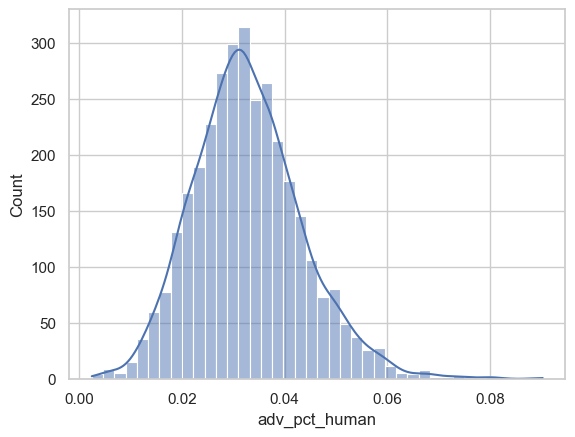

In [241]:
sns.histplot(data=df, x="adv_pct_human", bins=40, kde=True)

<Axes: xlabel='adv_pct_gpt', ylabel='Count'>

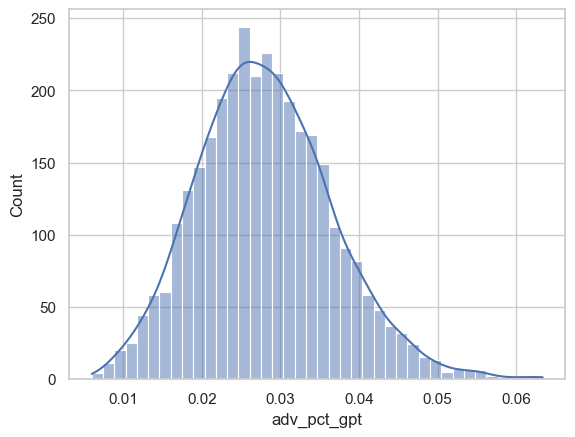

In [242]:
sns.histplot(data=df, x="adv_pct_gpt", bins=40, kde=True)

Comparing distributions of adverb usage for each category for gpt generated articles

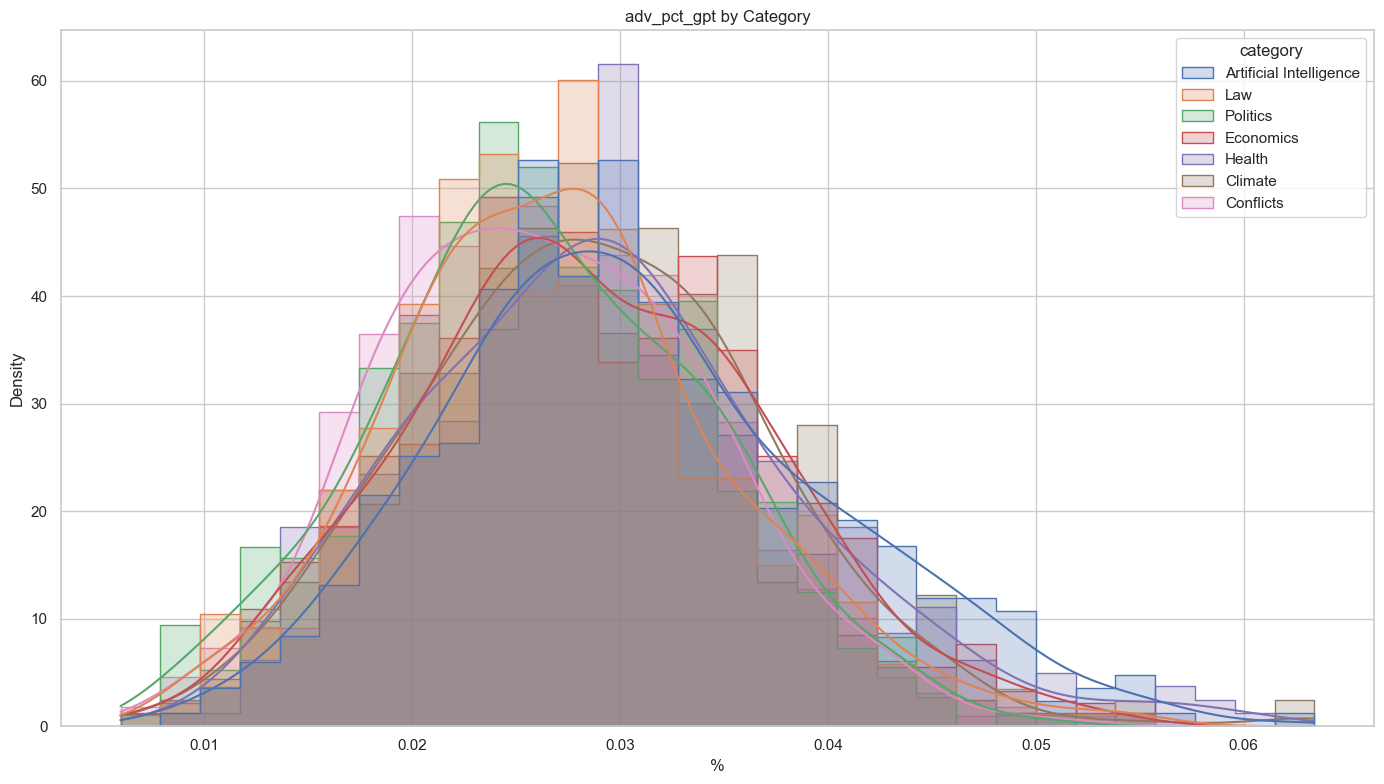

In [243]:
plt.figure(figsize=(14, 8))
sns.histplot(data=gpt_df, x="adv_pct_gpt", hue="category", bins=30, kde=True, element="step", stat="density", common_norm=False)
plt.title("adv_pct_gpt by Category")
plt.xlabel("%")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

Comparing distributions of adverb usage for each category for gpt generated articles

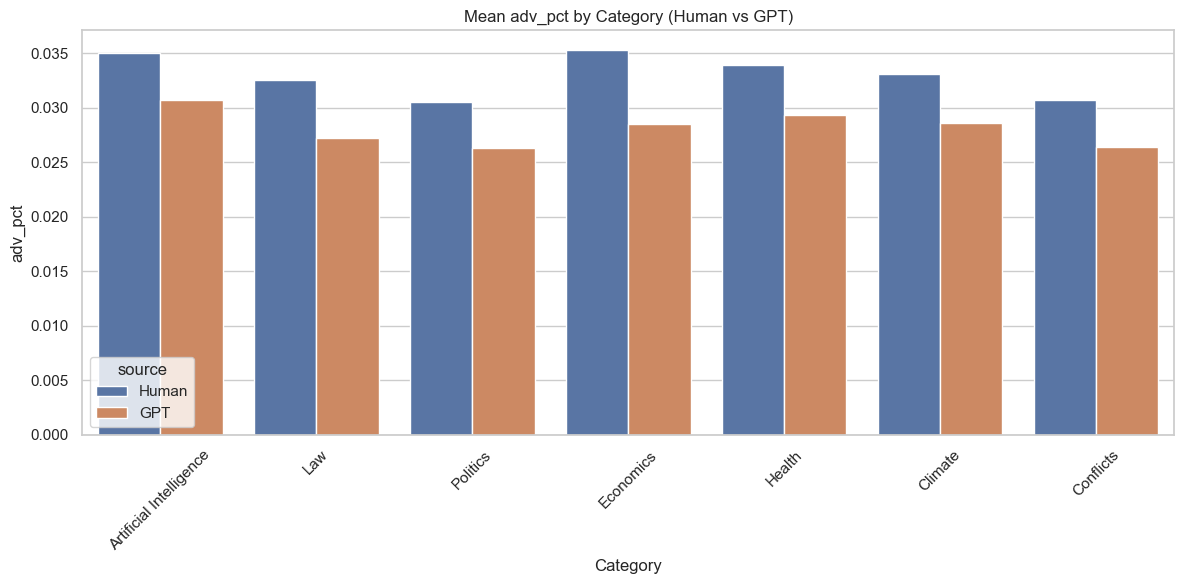

In [305]:
# Melt the DataFrame into long form for analysis
token_melt = df.melt(id_vars="category", 
                     value_vars=["adv_pct_human", "adv_pct_gpt"], 
                     var_name="source", 
                     value_name="adv_pct_count")

# Renaming for clarity
token_melt["source"] = token_melt["source"].map({
    "adv_pct_human": "Human",
    "adv_pct_gpt": "GPT"
})

plt.figure(figsize=(12, 6))
sns.barplot(data=token_melt, x="category", y="adv_pct_count", hue="source", errorbar=("ci", False))
plt.title("Mean adv_pct by Category (Human vs GPT)")
plt.ylabel("adv_pct")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Assessing data normality

In [245]:
df["sent_diff"] = df["adv_pct_human"] - df["adv_pct_gpt"]
stat, p = shapiro(df["sent_diff"])
print(f"Shapiro-Wilk p = {p}")

Shapiro-Wilk p = 5.082272386132235e-07


Find p-values and effect size scores

In [246]:
for cat in df['category'].unique():
    cat_df = df[df['category'] == cat].copy()

    # Drop pairs where the values are equal (Wilcoxon can't handle these)
    diffs = cat_df['adv_pct_human'] - cat_df['adv_pct_gpt']
    non_zero_diffs = diffs[diffs != 0]

    if len(non_zero_diffs) < 10:
        print(f"{cat}: skipped (not enough non-zero differences)")
        continue

    x = cat_df.loc[non_zero_diffs.index, 'adv_pct_human']
    y = cat_df.loc[non_zero_diffs.index, 'adv_pct_gpt']

    stat, p_val = wilcoxon(x, y)

    # Calculate Z approximation and effect size r
    n = len(non_zero_diffs)
    mean_rank_sum = n * (n + 1) / 4
    std_rank_sum = np.sqrt(n * (n + 1) * (2 * n + 1) / 24)
    z = (stat - mean_rank_sum) / std_rank_sum
    r = abs(z) / np.sqrt(n)

    print(f"{cat:<15} | p = {p_val} | effect size r = {r:.3f}")

Artificial Intelligence | p = 1.357799193388045e-09 | effect size r = 0.290
Law             | p = 4.451642273217764e-19 | effect size r = 0.420
Politics        | p = 1.722863613381833e-13 | effect size r = 0.329
Economics       | p = 3.07112448286112e-22 | effect size r = 0.444
Health          | p = 9.87278450433772e-14 | effect size r = 0.361
Climate         | p = 3.478358552299983e-11 | effect size r = 0.320
Conflicts       | p = 9.969531559247142e-16 | effect size r = 0.335


Examining correlations between title length and adverb percent usage

In [247]:
df[["title_length", "adv_pct_human", "adv_pct_gpt"]].corr()

title_length  adv_pct_human  adv_pct_gpt
title_length       1.000000       0.056486     0.062178
adv_pct_human      0.056486       1.000000     0.183230
adv_pct_gpt        0.062178       0.183230     1.000000

#### Sentiment

Histograms of human and gpt generared articles of sentiment scores

<Axes: xlabel='sentiment_human', ylabel='Count'>

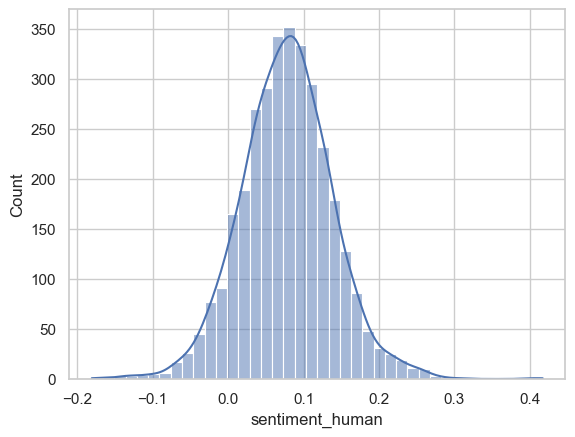

In [250]:
sns.histplot(data=df, x="sentiment_human", bins=40, kde=True)

<Axes: xlabel='sentiment_gpt', ylabel='Count'>

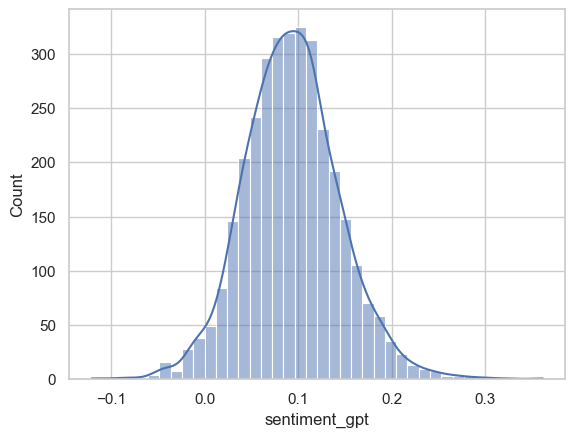

In [251]:
sns.histplot(data=df, x="sentiment_gpt", bins=40, kde=True)

Comparing distributions of sentiment scores for each category for human generated articles

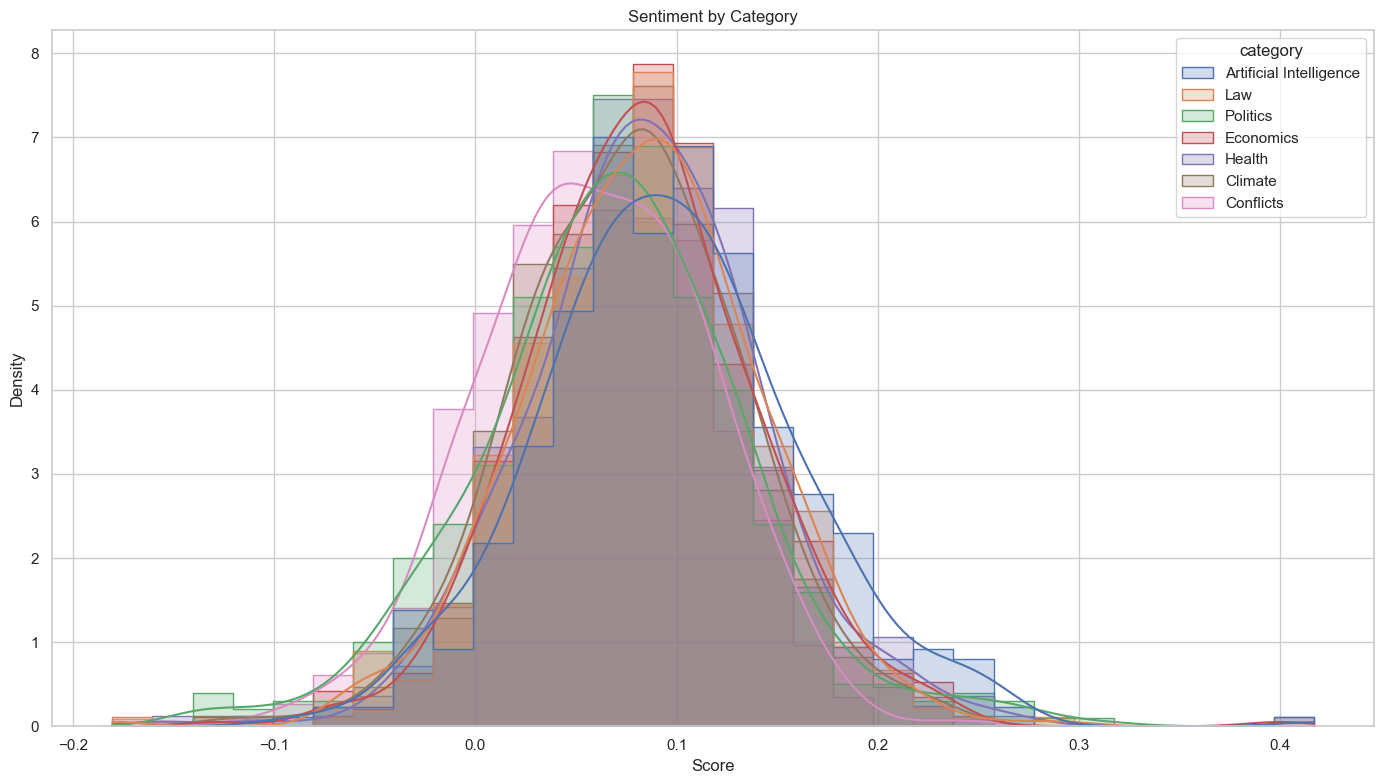

In [286]:
plt.figure(figsize=(14, 8))
sns.histplot(data=gpt_df, x="sentiment_human", hue="category", bins=30, kde=True, element="step", stat="density", common_norm=False)
plt.title("Sentiment by Category")
plt.xlabel("Score")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

Comparing distributions of sentiment scores for each category for gpt generated articles

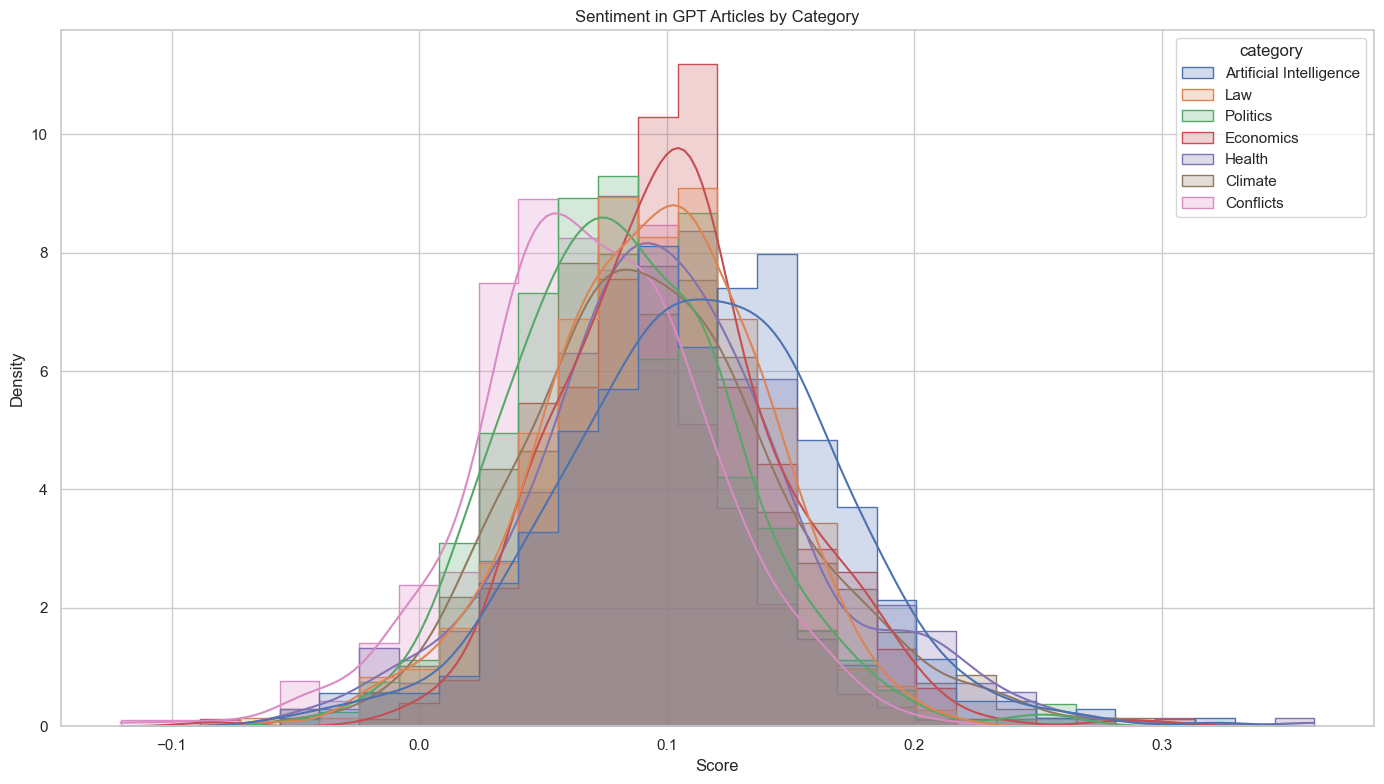

In [253]:
plt.figure(figsize=(14, 8))
sns.histplot(data=gpt_df, x="sentiment_gpt", hue="category", bins=30, kde=True, element="step", stat="density", common_norm=False)
plt.title("Sentiment in GPT Articles by Category")
plt.xlabel("Score")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

Comparing distributions of sentiment scores for each category for gpt generated articles

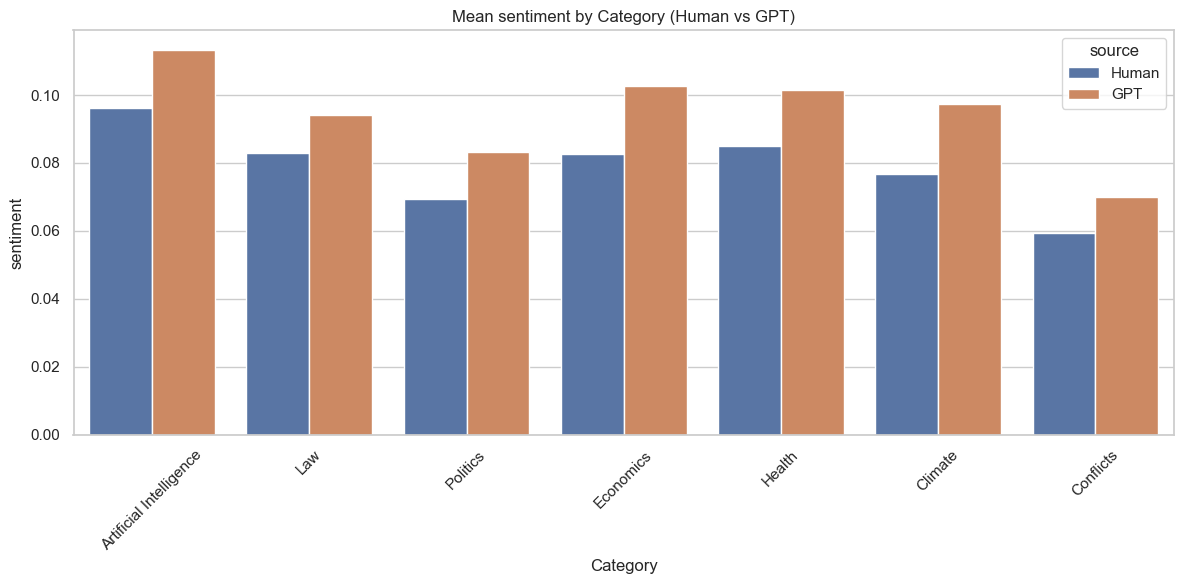

In [306]:
# Melt the DataFrame into long form for analysis
token_melt = df.melt(id_vars="category", 
                     value_vars=["sentiment_human", "sentiment_gpt"], 
                     var_name="source", 
                     value_name="sentiment_count")

# Renaming for clarity
token_melt["source"] = token_melt["source"].map({
    "sentiment_human": "Human",
    "sentiment_gpt": "GPT"
})

plt.figure(figsize=(12, 6))
sns.barplot(data=token_melt, x="category", y="sentiment_count", hue="source", errorbar=("ci", False))
plt.title("Mean sentiment by Category (Human vs GPT)")
plt.ylabel("sentiment")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Assessing data normality

In [255]:
df["sent_diff"] = df["sentiment_human"] - df["sentiment_gpt"]
stat, p = shapiro(df["sent_diff"])
print(f"Shapiro-Wilk p = {p}")

Shapiro-Wilk p = 1.8552477705179045e-08


Finding p-values and effect size scores

In [256]:
for cat in df['category'].unique():
    cat_df = df[df['category'] == cat].copy()

    # Drop pairs where the values are equal
    diffs = cat_df['sentiment_human'] - cat_df['sentiment_gpt']
    non_zero_diffs = diffs[diffs != 0]

    if len(non_zero_diffs) < 10:
        print(f"{cat}: skipped (not enough non-zero differences)")
        continue

    x = cat_df.loc[non_zero_diffs.index, 'sentiment_human']
    y = cat_df.loc[non_zero_diffs.index, 'sentiment_gpt']

    stat, p_val = wilcoxon(x, y)

    # Calculate Z approximation and effect size r
    n = len(non_zero_diffs)
    mean_rank_sum = n * (n + 1) / 4
    std_rank_sum = np.sqrt(n * (n + 1) * (2 * n + 1) / 24)
    z = (stat - mean_rank_sum) / std_rank_sum
    r = abs(z) / np.sqrt(n)

    print(f"{cat:<15} | p = {p_val} | effect size r = {r:.3f}")

Artificial Intelligence | p = 2.345016257169636e-07 | effect size r = 0.247
Law             | p = 0.0002265788980371503 | effect size r = 0.173
Politics        | p = 4.020694537384464e-05 | effect size r = 0.183
Economics       | p = 2.896881892010441e-12 | effect size r = 0.319
Health          | p = 4.901801350910322e-07 | effect size r = 0.244
Climate         | p = 1.296425969334264e-09 | effect size r = 0.293
Conflicts       | p = 0.0002965276185409346 | effect size r = 0.151


Examine if there's a correlation with title length

In [257]:
df[["title_length", "sentiment_human", "sentiment_gpt"]].corr()

title_length  sentiment_human  sentiment_gpt
title_length         1.000000        -0.020308      -0.029046
sentiment_human     -0.020308         1.000000       0.316554
sentiment_gpt       -0.029046         0.316554       1.000000

##### Subjectivity (how opinionated the writing is)

Histograms of human and gpt generared articles of subjectivity scores

<Axes: xlabel='subjectivity_human', ylabel='Count'>

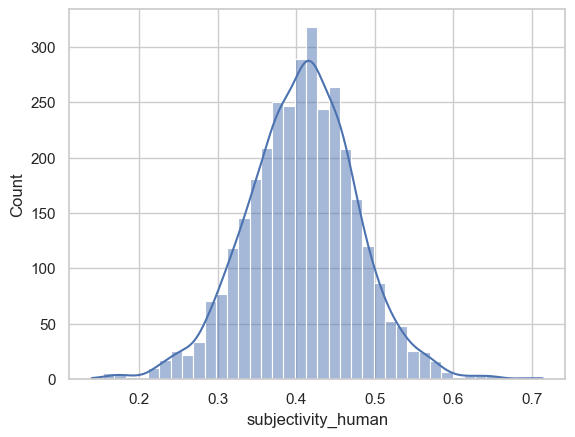

In [259]:
sns.histplot(data=df, x="subjectivity_human", bins=40, kde=True)

<Axes: xlabel='subjectivity_gpt', ylabel='Count'>

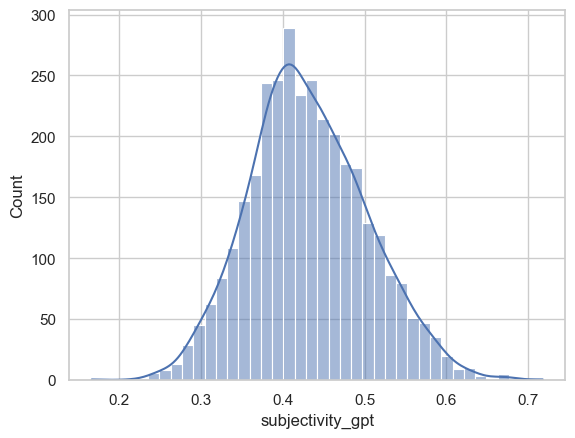

In [260]:
sns.histplot(data=df, x="subjectivity_gpt", bins=40, kde=True)

Comparing distributions of subjectivity scores for each category for human generated articles

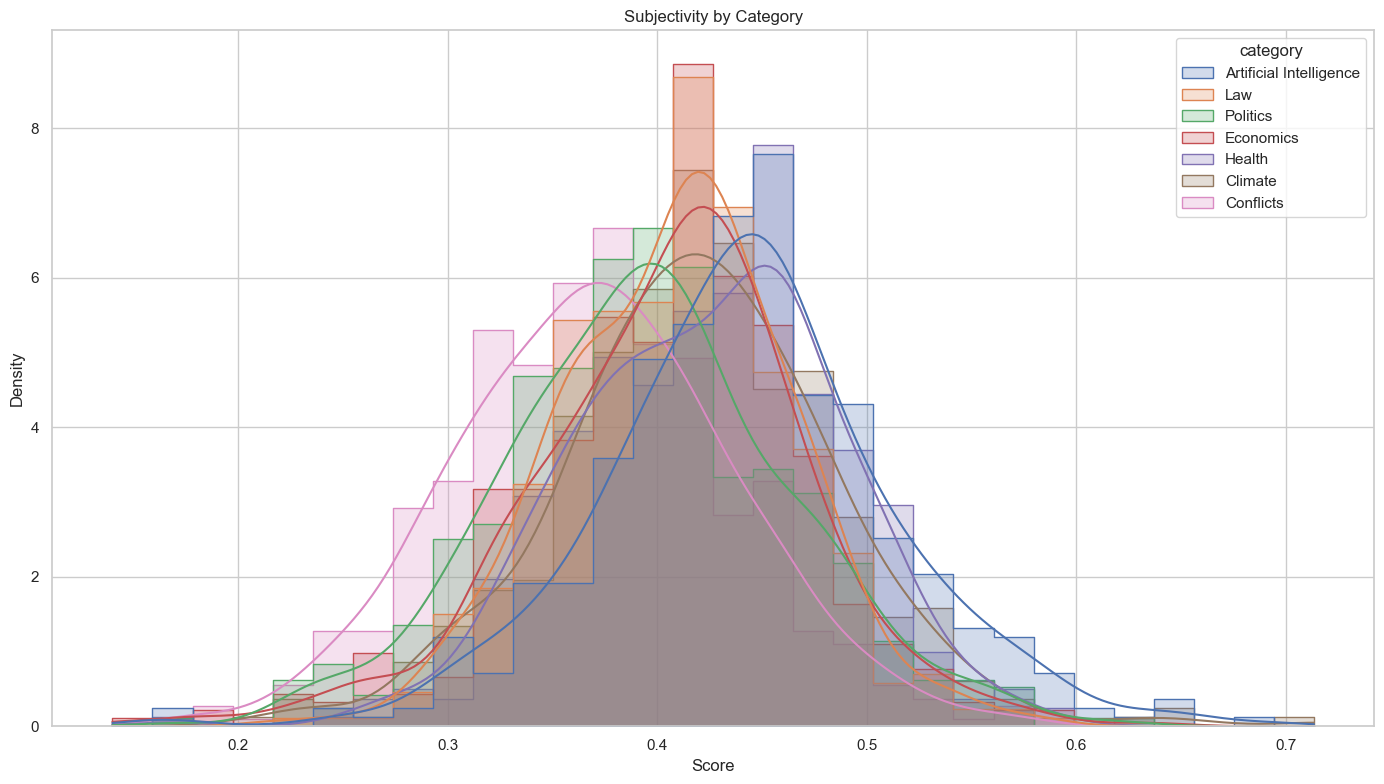

In [261]:
plt.figure(figsize=(14, 8))
sns.histplot(data=gpt_df, x="subjectivity_human", hue="category", bins=30, kde=True, element="step", stat="density", common_norm=False)
plt.title("Subjectivity by Category")
plt.xlabel("Score")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

Comparing distributions of subjectivity scores for each category for gpt generated articles

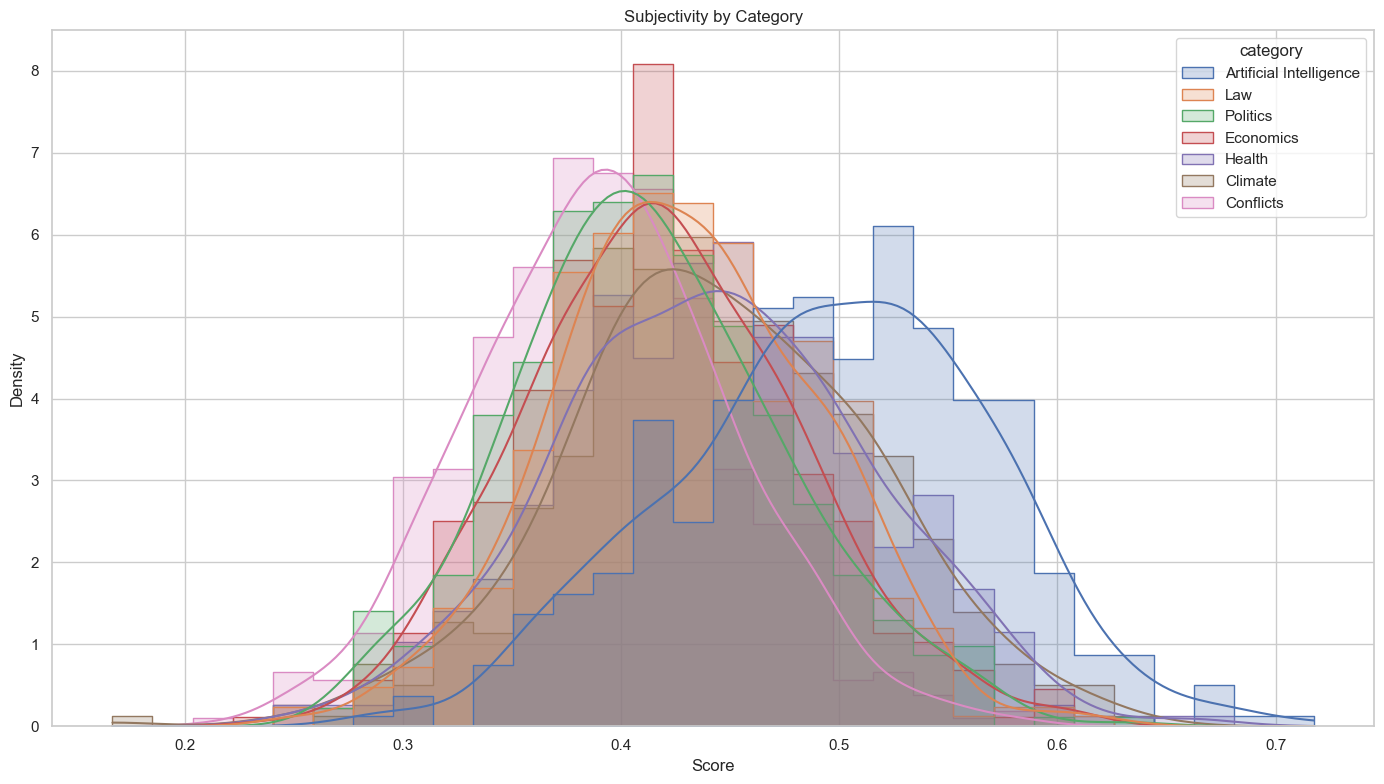

In [262]:
plt.figure(figsize=(14, 8))
sns.histplot(data=gpt_df, x="subjectivity_gpt", hue="category", bins=30, kde=True, element="step", stat="density", common_norm=False)
plt.title("Subjectivity by Category")
plt.xlabel("Score")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

Comparing distributions of subjectivity scores for each category for gpt generated articles

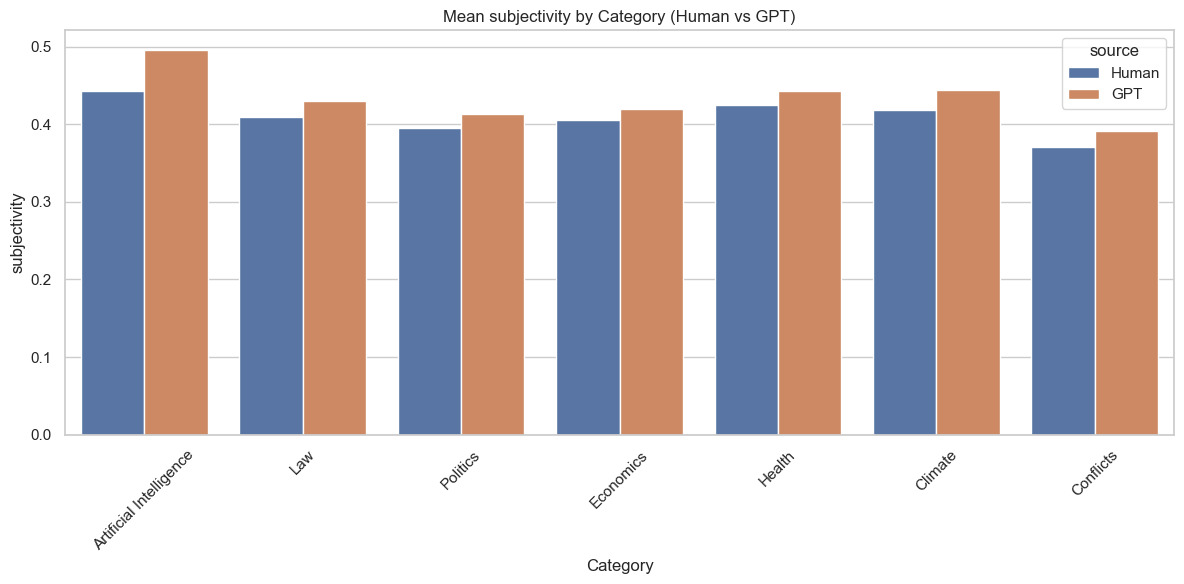

In [307]:
# Melt the DataFrame into long form for analysis
token_melt = df.melt(id_vars="category", 
                     value_vars=["subjectivity_human", "subjectivity_gpt"], 
                     var_name="source", 
                     value_name="subjectivity_count")

# Renaming for clarity
token_melt["source"] = token_melt["source"].map({
    "subjectivity_human": "Human",
    "subjectivity_gpt": "GPT"
})

plt.figure(figsize=(12, 6))
sns.barplot(data=token_melt, x="category", y="subjectivity_count", hue="source", errorbar=("ci", False))
plt.title("Mean subjectivity by Category (Human vs GPT)")
plt.ylabel("subjectivity")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Assessing data normality

In [264]:
df["sent_diff"] = df["subjectivity_human"] - df["subjectivity_gpt"]
stat, p = shapiro(df["sent_diff"])
print(f"Shapiro-Wilk p = {p}")

Shapiro-Wilk p = 0.00028576256379913174


Finding p-values and effect size scores

In [265]:
for cat in df['category'].unique():
    cat_df = df[df['category'] == cat].copy()

    # Drop pairs where the values are equal
    diffs = cat_df['subjectivity_human'] - cat_df['subjectivity_gpt']
    non_zero_diffs = diffs[diffs != 0]

    if len(non_zero_diffs) < 10:
        print(f"{cat}: skipped (not enough non-zero differences)")
        continue

    x = cat_df.loc[non_zero_diffs.index, 'subjectivity_human']
    y = cat_df.loc[non_zero_diffs.index, 'subjectivity_gpt']

    stat, p_val = wilcoxon(x, y)

    # Calculate Z approximation and effect size r
    n = len(non_zero_diffs)
    mean_rank_sum = n * (n + 1) / 4
    std_rank_sum = np.sqrt(n * (n + 1) * (2 * n + 1) / 24)
    z = (stat - mean_rank_sum) / std_rank_sum
    r = abs(z) / np.sqrt(n)

    print(f"{cat:<15} | p = {p_val} | effect size r = {r:.3f}")

Artificial Intelligence | p = 1.4131792230285078e-29 | effect size r = 0.540
Law             | p = 5.06098956420873e-07 | effect size r = 0.236
Politics        | p = 2.1490763803178336e-06 | effect size r = 0.212
Economics       | p = 0.0001159860383705707 | effect size r = 0.176
Health          | p = 2.9233824527992513e-05 | effect size r = 0.203
Climate         | p = 2.4403158697553633e-08 | effect size r = 0.269
Conflicts       | p = 3.737401824910908e-09 | effect size r = 0.246


Examine if there's a correlation with title length

In [266]:
df[["title_length", "subjectivity_human", "subjectivity_gpt"]].corr()

title_length  subjectivity_human  subjectivity_gpt
title_length            1.000000            0.001987         -0.064459
subjectivity_human      0.001987            1.000000          0.297211
subjectivity_gpt       -0.064459            0.297211          1.000000

##### Bias Terms

Histograms of human and gpt generared articles of bias term usage

<Axes: xlabel='bias_terms_human', ylabel='Count'>

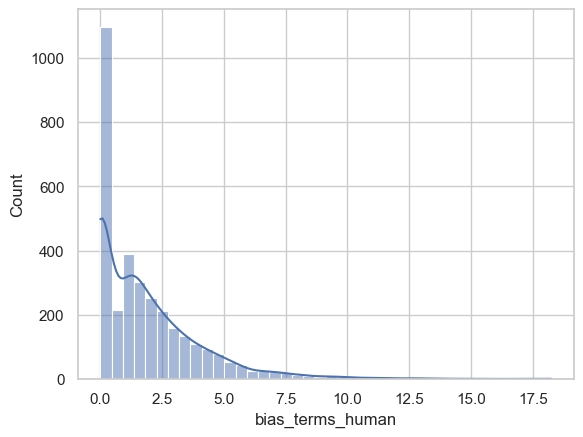

In [268]:
sns.histplot(data=df, x="bias_terms_human", bins=40, kde=True)

<Axes: xlabel='bias_terms_gpt', ylabel='Count'>

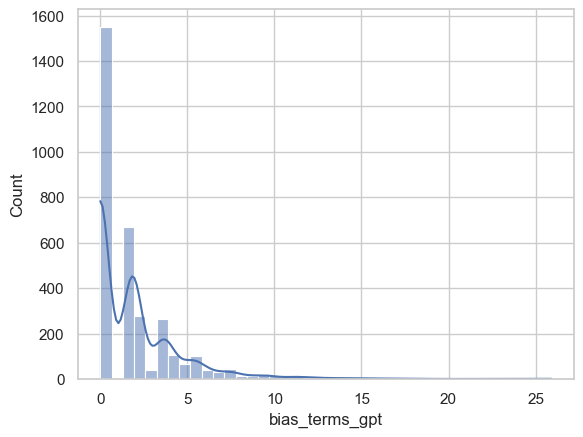

In [269]:
sns.histplot(data=df, x="bias_terms_gpt", bins=40, kde=True)

Comparing distributions of bias term usages for each category for human generated articles

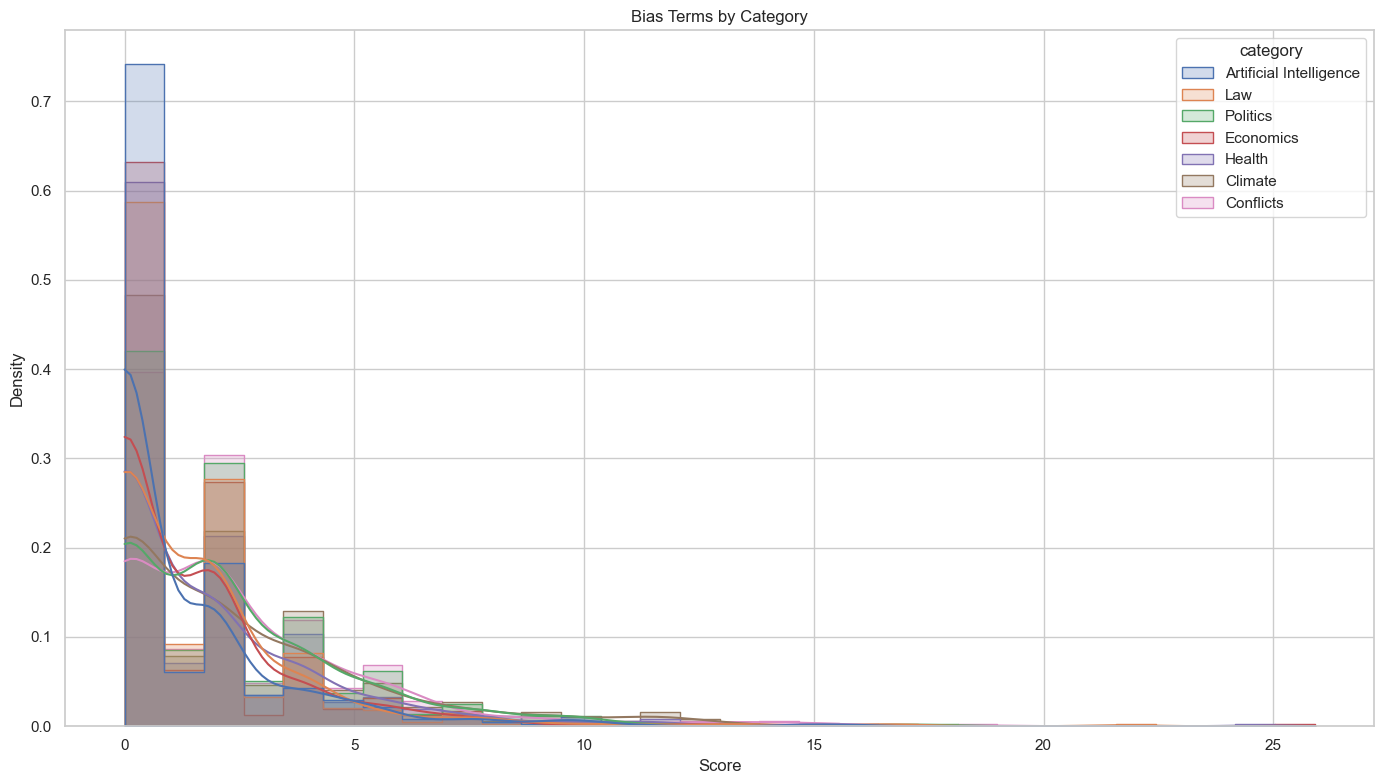

In [308]:
plt.figure(figsize=(14, 8))
sns.histplot(data=gpt_df, x="bias_terms_gpt", hue="category", bins=30, kde=True, element="step", stat="density", common_norm=False)
plt.title("Bias Terms by Category")
plt.xlabel("Score")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

Comparing distributions of bias term usages for each category for gpt generated articles

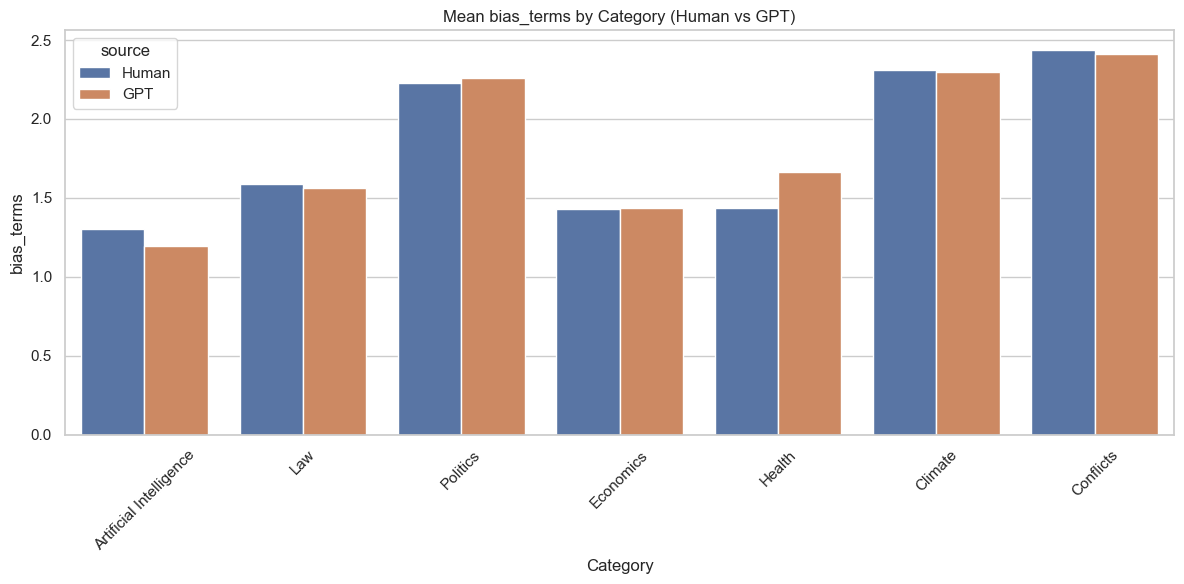

In [309]:
# Melt the DataFrame into long form for analysis
token_melt = df.melt(id_vars="category", 
                     value_vars=["bias_terms_human", "bias_terms_gpt"], 
                     var_name="source", 
                     value_name="bias_terms_count")

# Renaming for clarity
token_melt["source"] = token_melt["source"].map({
    "bias_terms_human": "Human",
    "bias_terms_gpt": "GPT"
})

plt.figure(figsize=(12, 6))
sns.barplot(data=token_melt, x="category", y="bias_terms_count", hue="source", errorbar=("ci", False))
plt.title("Mean bias_terms by Category (Human vs GPT)")
plt.ylabel("bias_terms")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Assessing data normality

In [272]:
df["sent_diff"] = df["bias_terms_human"] - df["bias_terms_gpt"]
stat, p = shapiro(df["sent_diff"])
print(f"Shapiro-Wilk p = {p}")

Shapiro-Wilk p = 2.7259028241053043e-33


Finding p-values and effect size scores

In [ ]:
for cat in df['category'].unique():
    cat_df = df[df['category'] == cat].copy()

    # Drop pairs where the values are equal
    diffs = cat_df['bias_terms_human'] - cat_df['bias_terms_gpt']
    non_zero_diffs = diffs[diffs != 0]

    if len(non_zero_diffs) < 10:
        print(f"{cat}: skipped (not enough non-zero differences)")
        continue

    x = cat_df.loc[non_zero_diffs.index, 'bias_terms_human']
    y = cat_df.loc[non_zero_diffs.index, 'bias_terms_gpt']

    stat, p_val = wilcoxon(x, y)

    # Calculate Z approximation and effect size r
    n = len(non_zero_diffs)
    mean_rank_sum = n * (n + 1) / 4
    std_rank_sum = np.sqrt(n * (n + 1) * (2 * n + 1) / 24)
    z = (stat - mean_rank_sum) / std_rank_sum
    r = abs(z) / np.sqrt(n)

    print(f"{cat:<15} | p = {p_val} | effect size r = {r:.3f}")

Artificial Intelligence | p = 0.0785817006153374 | effect size r = 0.104
Law             | p = 0.2886691156160345 | effect size r = 0.056
Politics        | p = 0.8206113772362755 | effect size r = 0.011
Economics       | p = 0.9873549600536868 | effect size r = 0.001
Health          | p = 0.2626994840572833 | effect size r = 0.062
Climate         | p = 0.3167489873599527 | effect size r = 0.052
Conflicts       | p = 0.2641383920562199 | effect size r = 0.049


Examine if there's a correlation with title length

In [310]:
df[["title_length", "bias_terms_human", "bias_terms_gpt"]].corr()

title_length  bias_terms_human  bias_terms_gpt
title_length          1.000000          0.066565        0.007143
bias_terms_human      0.066565          1.000000        0.368745
bias_terms_gpt        0.007143          0.368745        1.000000

Removing columns

In [313]:
df = df.drop(columns = ["token_deficit","sent_diff", "token_diff"])

Saving final df to a csv that will be used next section

In [ ]:
df.to_csv("phase_3_df.csv")

In [ ]:
df.describe()